### This is the multiclass classification using gradient descent algorithm in Logistic Regression. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("../dataset/IRIS.csv")
raw_data.head()
raw_data.shape

(150, 5)

### data preprocessind stage below

In [3]:
#applying data preprocessing on the data 
pure_raw_data = raw_data.iloc[:,0:4]
#M = int(pure_raw_data.shape[0])*0.75
training_data = pure_raw_data.iloc[0:int(pure_raw_data.shape[0]*0.75)]
training_data = np.array(training_data)
training_data = training_data/np.max(training_data,axis=0)

testing_data = pure_raw_data.iloc[int(pure_raw_data.shape[0]*0.75):]
testing_data = np.array(testing_data)
testing_data = testing_data/np.max(testing_data,axis=0)
print("training_data : {}\ntesting_data : {}".format(training_data.shape,testing_data.shape))

training_data : (112, 4)
testing_data : (38, 4)


In [4]:
class_labels = raw_data.iloc[:,4:5]
np.unique(class_labels)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
#training_data['diagnosis'].replace(to_replace='B',value=0,inplace=True)
class_labels['species'].replace(to_replace="Iris-setosa",value=0,inplace=True)
class_labels['species'].replace(to_replace="Iris-versicolor",value=1,inplace=True)
class_labels['species'].replace(to_replace="Iris-virginica",value=2,inplace=True)
class_labels = np.array(class_labels) 

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [6]:
#converting data into one hot encoding
n_values = np.max(class_labels) + 1
one_hot_c = np.eye(n_values)[class_labels]       #the identity matrix converting data into one hot encoding
one_hot_c  = one_hot_c.reshape(one_hot_c.shape[0],n_values) # changing the shape of the one hot encoded matrix
one_hot_c.shape

(150, 3)

In [7]:
n = int(pure_raw_data.shape[0]*0.75)
one_hot_ctraining, one_hot_ctest = one_hot_c[:n,:], one_hot_c[n:,:]
print("class_training_data : {}\nclass_testing_data : {}".format(one_hot_ctraining.shape,one_hot_ctest.shape))

class_training_data : (112, 3)
class_testing_data : (38, 3)


In [8]:
#setting hyperparameteres for gradient descent
i=0
loss = []
iterations = []

theta0_inital = np.random.randn(1,n_values)
theta1_inital = np.random.randn(training_data.shape[1],n_values)

epsilon = 0.0000001 # error tolerance
alpha = 0.1 #learning rate
print("theta0_inital:{}\ntheta1_inital:{}".format(theta0_inital,theta1_inital))

theta0_inital:[[1.41082774 0.11712779 0.38883777]]
theta1_inital:[[-1.01596204  1.04436996  0.19659406]
 [ 0.1181232  -0.01664826 -0.63660415]
 [-0.76999722  0.20958369 -0.55724922]
 [-1.06954138 -0.26669102 -0.31284323]]


In [9]:
#now let's run the gradient descent code for multiple logistic regression
N = training_data.shape[0]
while (True):
    power_inital = np.exp(theta0_inital + np.matmul(training_data,theta1_inital))#this is the softmax function actually
    pf_initial = np.sum(power_inital,axis=1)
    pf_initial = pf_initial.reshape(pf_initial.shape[0],1) #only for reshaping
    softmax_initial = power_inital/pf_initial
    
    del_theta0 = (np.sum((softmax_initial-one_hot_ctraining),axis=0))/N    #this is the j(Q) for theta0_initial
    del_theta0_initial = del_theta0.reshape(1,del_theta0.shape[0])
    
    del_theta_initial = (np.matmul(training_data.T,(softmax_initial-one_hot_ctraining)))/N #this is the j(Q) for theta1_initial
    
    #now lets the gradients to minimize the loss
    theta0_final = theta0_inital -(alpha*del_theta0_initial) #upgrading the value of parameters
    theta_final = theta1_inital - (alpha*del_theta_initial)  ##upgrading the value of parameters
    
    function_old = (-np.sum(np.log(softmax_initial)*one_hot_ctraining))/N
    
    #performing and setting values for function_new cost
    power_final = np.exp(theta0_final + np.matmul(training_data,theta_final))
    pf_final = np.sum(power_final,axis=1)
    pf_final = pf_final.reshape(pf_final.shape[0],1)# only for reshaping
    softmax_final = power_final/pf_final
    
    function_new = (-np.sum(np.log(softmax_final)*one_hot_ctraining))/N
    
    if abs(function_old-function_new) < epsilon:
        break
    
    i+=1
    theta0_inital = theta0_final
    theta1_inital = theta_final
    print("the value of loss in iteration #{} is {}".format(i,function_old))
    iterations.append(i)
    loss.append(function_old)

the value of loss in iteration #1 is 0.857923937837123
the value of loss in iteration #2 is 0.8458888704506128
the value of loss in iteration #3 is 0.8352242495986755
the value of loss in iteration #4 is 0.8257591945197523
the value of loss in iteration #5 is 0.8173394831438469
the value of loss in iteration #6 is 0.8098272143103709
the value of loss in iteration #7 is 0.8031000933627226
the value of loss in iteration #8 is 0.7970504542218414
the value of loss in iteration #9 is 0.7915841163342768
the value of loss in iteration #10 is 0.7866191576229988
the value of loss in iteration #11 is 0.7820846670091642
the value of loss in iteration #12 is 0.7779195237394804
the value of loss in iteration #13 is 0.7740712365121674
the value of loss in iteration #14 is 0.7704948636058715
the value of loss in iteration #15 is 0.7671520258924508
the value of loss in iteration #16 is 0.7640100175547515
the value of loss in iteration #17 is 0.7610410142233776
the value of loss in iteration #18 is 0.7

the value of loss in iteration #367 is 0.4575700320535346
the value of loss in iteration #368 is 0.4571994105006797
the value of loss in iteration #369 is 0.45682989018858916
the value of loss in iteration #370 is 0.4564614654779459
the value of loss in iteration #371 is 0.45609413076798405
the value of loss in iteration #372 is 0.4557278804961652
the value of loss in iteration #373 is 0.4553627091378581
the value of loss in iteration #374 is 0.454998611206021
the value of loss in iteration #375 is 0.45463558125088754
the value of loss in iteration #376 is 0.45427361385965553
the value of loss in iteration #377 is 0.45391270365617853
the value of loss in iteration #378 is 0.45355284530066137
the value of loss in iteration #379 is 0.4531940334893577
the value of loss in iteration #380 is 0.45283626295427065
the value of loss in iteration #381 is 0.452479528462857
the value of loss in iteration #382 is 0.45212382481773383
the value of loss in iteration #383 is 0.4517691468563877
the valu

the value of loss in iteration #821 is 0.3533837531963046
the value of loss in iteration #822 is 0.3532348689986867
the value of loss in iteration #823 is 0.3530861886580525
the value of loss in iteration #824 is 0.3529377116250747
the value of loss in iteration #825 is 0.3527894373525608
the value of loss in iteration #826 is 0.35264136529544304
the value of loss in iteration #827 is 0.3524934949107676
the value of loss in iteration #828 is 0.3523458256576846
the value of loss in iteration #829 is 0.35219835699743746
the value of loss in iteration #830 is 0.3520510883933535
the value of loss in iteration #831 is 0.3519040193108326
the value of loss in iteration #832 is 0.3517571492173382
the value of loss in iteration #833 is 0.351610477582387
the value of loss in iteration #834 is 0.3514640038775386
the value of loss in iteration #835 is 0.3513177275763861
the value of loss in iteration #836 is 0.35117164815454566
the value of loss in iteration #837 is 0.3510257650896477
the value of

the value of loss in iteration #1269 is 0.30138202221500004
the value of loss in iteration #1270 is 0.3012899107783439
the value of loss in iteration #1271 is 0.3011978779406978
the value of loss in iteration #1272 is 0.30110592357048815
the value of loss in iteration #1273 is 0.3010140475364849
the value of loss in iteration #1274 is 0.3009222497078006
the value of loss in iteration #1275 is 0.30083052995388915
the value of loss in iteration #1276 is 0.3007388881445444
the value of loss in iteration #1277 is 0.3006473241498993
the value of loss in iteration #1278 is 0.30055583784042467
the value of loss in iteration #1279 is 0.30046442908692794
the value of loss in iteration #1280 is 0.30037309776055215
the value of loss in iteration #1281 is 0.3002818437327748
the value of loss in iteration #1282 is 0.3001906668754063
the value of loss in iteration #1283 is 0.30009956706058966
the value of loss in iteration #1284 is 0.30000854416079875
the value of loss in iteration #1285 is 0.299917

the value of loss in iteration #1625 is 0.2727582763931717
the value of loss in iteration #1626 is 0.2726877967023689
the value of loss in iteration #1627 is 0.2726173641016542
the value of loss in iteration #1628 is 0.2725469785326992
the value of loss in iteration #1629 is 0.27247663993729154
the value of loss in iteration #1630 is 0.2724063482573346
the value of loss in iteration #1631 is 0.27233610343484715
the value of loss in iteration #1632 is 0.27226590541196305
the value of loss in iteration #1633 is 0.272195754130931
the value of loss in iteration #1634 is 0.2721256495341141
the value of loss in iteration #1635 is 0.2720555915639898
the value of loss in iteration #1636 is 0.271985580163149
the value of loss in iteration #1637 is 0.2719156152742966
the value of loss in iteration #1638 is 0.27184569684025045
the value of loss in iteration #1639 is 0.2717758248039414
the value of loss in iteration #1640 is 0.27170599910841303
the value of loss in iteration #1641 is 0.27163621969

the value of loss in iteration #1955 is 0.2517579254997221
the value of loss in iteration #1956 is 0.2517003822874238
the value of loss in iteration #1957 is 0.25164287174967737
the value of loss in iteration #1958 is 0.25158539385402784
the value of loss in iteration #1959 is 0.2515279485680714
the value of loss in iteration #1960 is 0.2514705358594556
the value of loss in iteration #1961 is 0.251413155695879
the value of loss in iteration #1962 is 0.25135580804509133
the value of loss in iteration #1963 is 0.2512984928748928
the value of loss in iteration #1964 is 0.251241210153135
the value of loss in iteration #1965 is 0.2511839598477194
the value of loss in iteration #1966 is 0.25112674192659884
the value of loss in iteration #1967 is 0.2510695563577758
the value of loss in iteration #1968 is 0.2510124031093036
the value of loss in iteration #1969 is 0.25095528214928564
the value of loss in iteration #1970 is 0.2508981934458752
the value of loss in iteration #1971 is 0.25084113696

the value of loss in iteration #2185 is 0.2393238105160855
the value of loss in iteration #2186 is 0.23927301891489838
the value of loss in iteration #2187 is 0.23922225367743138
the value of loss in iteration #2188 is 0.2391715147805539
the value of loss in iteration #2189 is 0.23912080220116724
the value of loss in iteration #2190 is 0.23907011591620414
the value of loss in iteration #2191 is 0.239019455902629
the value of loss in iteration #2192 is 0.2389688221374376
the value of loss in iteration #2193 is 0.2389182145976572
the value of loss in iteration #2194 is 0.2388676332603464
the value of loss in iteration #2195 is 0.2388170781025952
the value of loss in iteration #2196 is 0.23876654910152464
the value of loss in iteration #2197 is 0.23871604623428708
the value of loss in iteration #2198 is 0.2386655694780659
the value of loss in iteration #2199 is 0.23861511881007563
the value of loss in iteration #2200 is 0.23856469420756168
the value of loss in iteration #2201 is 0.2385142

the value of loss in iteration #2439 is 0.2272122939515643
the value of loss in iteration #2440 is 0.22716753165277406
the value of loss in iteration #2441 is 0.22712279071535843
the value of loss in iteration #2442 is 0.22707807112258832
the value of loss in iteration #2443 is 0.22703337285775463
the value of loss in iteration #2444 is 0.22698869590416798
the value of loss in iteration #2445 is 0.22694404024515896
the value of loss in iteration #2446 is 0.2268994058640778
the value of loss in iteration #2447 is 0.22685479274429457
the value of loss in iteration #2448 is 0.22681020086919887
the value of loss in iteration #2449 is 0.22676563022220025
the value of loss in iteration #2450 is 0.22672108078672767
the value of loss in iteration #2451 is 0.2266765525462297
the value of loss in iteration #2452 is 0.22663204548417468
the value of loss in iteration #2453 is 0.22658755958405036
the value of loss in iteration #2454 is 0.2265430948293639
the value of loss in iteration #2455 is 0.22

the value of loss in iteration #2729 is 0.2150643075304633
the value of loss in iteration #2730 is 0.2150251102796603
the value of loss in iteration #2731 is 0.21498593025423904
the value of loss in iteration #2732 is 0.21494676744206861
the value of loss in iteration #2733 is 0.21490762183103063
the value of loss in iteration #2734 is 0.2148684934090192
the value of loss in iteration #2735 is 0.21482938216394096
the value of loss in iteration #2736 is 0.21479028808371517
the value of loss in iteration #2737 is 0.21475121115627335
the value of loss in iteration #2738 is 0.21471215136955965
the value of loss in iteration #2739 is 0.21467310871153056
the value of loss in iteration #2740 is 0.21463408317015506
the value of loss in iteration #2741 is 0.21459507473341452
the value of loss in iteration #2742 is 0.2145560833893027
the value of loss in iteration #2743 is 0.2145171091258257
the value of loss in iteration #2744 is 0.21447815193100195
the value of loss in iteration #2745 is 0.214

the value of loss in iteration #3041 is 0.20361411669808355
the value of loss in iteration #3042 is 0.20357976177493878
the value of loss in iteration #3043 is 0.20354542082103957
the value of loss in iteration #3044 is 0.2035110938274292
the value of loss in iteration #3045 is 0.20347678078515927
the value of loss in iteration #3046 is 0.20344248168528933
the value of loss in iteration #3047 is 0.20340819651888728
the value of loss in iteration #3048 is 0.20337392527702908
the value of loss in iteration #3049 is 0.20333966795079897
the value of loss in iteration #3050 is 0.20330542453128925
the value of loss in iteration #3051 is 0.2032711950096003
the value of loss in iteration #3052 is 0.20323697937684077
the value of loss in iteration #3053 is 0.20320277762412736
the value of loss in iteration #3054 is 0.2031685897425848
the value of loss in iteration #3055 is 0.20313441572334595
the value of loss in iteration #3056 is 0.20310025555755187
the value of loss in iteration #3057 is 0.2

the value of loss in iteration #3348 is 0.19368329668453008
the value of loss in iteration #3349 is 0.19365284532869895
the value of loss in iteration #3350 is 0.19362240553337845
the value of loss in iteration #3351 is 0.19359197729171204
the value of loss in iteration #3352 is 0.19356156059684862
the value of loss in iteration #3353 is 0.19353115544194305
the value of loss in iteration #3354 is 0.19350076182015577
the value of loss in iteration #3355 is 0.1934703797246527
the value of loss in iteration #3356 is 0.1934400091486057
the value of loss in iteration #3357 is 0.19340965008519206
the value of loss in iteration #3358 is 0.19337930252759492
the value of loss in iteration #3359 is 0.19334896646900288
the value of loss in iteration #3360 is 0.19331864190261028
the value of loss in iteration #3361 is 0.19328832882161687
the value of loss in iteration #3362 is 0.19325802721922833
the value of loss in iteration #3363 is 0.1932277370886558
the value of loss in iteration #3364 is 0.1

the value of loss in iteration #3657 is 0.18479253897717998
the value of loss in iteration #3658 is 0.18476535903241917
the value of loss in iteration #3659 is 0.18473818877199638
the value of loss in iteration #3660 is 0.1847110281905479
the value of loss in iteration #3661 is 0.184683877282714
the value of loss in iteration #3662 is 0.18465673604313895
the value of loss in iteration #3663 is 0.18462960446647142
the value of loss in iteration #3664 is 0.18460248254736383
the value of loss in iteration #3665 is 0.18457537028047302
the value of loss in iteration #3666 is 0.1845482676604595
the value of loss in iteration #3667 is 0.1845211746819881
the value of loss in iteration #3668 is 0.18449409133972758
the value of loss in iteration #3669 is 0.18446701762835097
the value of loss in iteration #3670 is 0.18443995354253512
the value of loss in iteration #3671 is 0.18441289907696104
the value of loss in iteration #3672 is 0.18438585422631373
the value of loss in iteration #3673 is 0.184

the value of loss in iteration #3957 is 0.17705027898551812
the value of loss in iteration #3958 is 0.1770257807316349
the value of loss in iteration #3959 is 0.17700129071964482
the value of loss in iteration #3960 is 0.17697680894524762
the value of loss in iteration #3961 is 0.17695233540414587
the value of loss in iteration #3962 is 0.17692787009204552
the value of loss in iteration #3963 is 0.17690341300465523
the value of loss in iteration #3964 is 0.17687896413768708
the value of loss in iteration #3965 is 0.17685452348685585
the value of loss in iteration #3966 is 0.17683009104787956
the value of loss in iteration #3967 is 0.1768056668164792
the value of loss in iteration #3968 is 0.17678125078837895
the value of loss in iteration #3969 is 0.17675684295930577
the value of loss in iteration #3970 is 0.17673244332498989
the value of loss in iteration #3971 is 0.1767080518811644
the value of loss in iteration #3972 is 0.17668366862356552
the value of loss in iteration #3973 is 0.1

the value of loss in iteration #4301 is 0.16908184737120097
the value of loss in iteration #4302 is 0.1690599497047893
the value of loss in iteration #4303 is 0.1690380589641976
the value of loss in iteration #4304 is 0.16901617514603126
the value of loss in iteration #4305 is 0.1689942982468977
the value of loss in iteration #4306 is 0.16897242826340686
the value of loss in iteration #4307 is 0.1689505651921708
the value of loss in iteration #4308 is 0.1689287090298039
the value of loss in iteration #4309 is 0.16890685977292255
the value of loss in iteration #4310 is 0.16888501741814574
the value of loss in iteration #4311 is 0.16886318196209446
the value of loss in iteration #4312 is 0.16884135340139203
the value of loss in iteration #4313 is 0.16881953173266398
the value of loss in iteration #4314 is 0.1687977169525381
the value of loss in iteration #4315 is 0.1687759090576444
the value of loss in iteration #4316 is 0.16875410804461508
the value of loss in iteration #4317 is 0.16873

the value of loss in iteration #4578 is 0.1632695622257979
the value of loss in iteration #4579 is 0.1632494607115587
the value of loss in iteration #4580 is 0.16322936526273257
the value of loss in iteration #4581 is 0.1632092758764825
the value of loss in iteration #4582 is 0.1631891925499735
the value of loss in iteration #4583 is 0.1631691152803721
the value of loss in iteration #4584 is 0.1631490440648468
the value of loss in iteration #4585 is 0.16312897890056774
the value of loss in iteration #4586 is 0.16310891978470707
the value of loss in iteration #4587 is 0.16308886671443842
the value of loss in iteration #4588 is 0.16306881968693757
the value of loss in iteration #4589 is 0.16304877869938175
the value of loss in iteration #4590 is 0.16302874374895016
the value of loss in iteration #4591 is 0.16300871483282367
the value of loss in iteration #4592 is 0.16298869194818505
the value of loss in iteration #4593 is 0.16296867509221874
the value of loss in iteration #4594 is 0.1629

the value of loss in iteration #4937 is 0.15642234820651582
the value of loss in iteration #4938 is 0.15640425466388
the value of loss in iteration #4939 is 0.15638616627327537
the value of loss in iteration #4940 is 0.1563680830324259
the value of loss in iteration #4941 is 0.15635000493905674
the value of loss in iteration #4942 is 0.15633193199089465
the value of loss in iteration #4943 is 0.15631386418566753
the value of loss in iteration #4944 is 0.15629580152110473
the value of loss in iteration #4945 is 0.15627774399493705
the value of loss in iteration #4946 is 0.15625969160489647
the value of loss in iteration #4947 is 0.15624164434871637
the value of loss in iteration #4948 is 0.1562236022241315
the value of loss in iteration #4949 is 0.156205565228878
the value of loss in iteration #4950 is 0.15618753336069321
the value of loss in iteration #4951 is 0.15616950661731596
the value of loss in iteration #4952 is 0.15615148499648646
the value of loss in iteration #4953 is 0.15613

the value of loss in iteration #5226 is 0.15139902973192182
the value of loss in iteration #5227 is 0.15138233552689132
the value of loss in iteration #5228 is 0.15136564586871715
the value of loss in iteration #5229 is 0.15134896075547602
the value of loss in iteration #5230 is 0.15133228018524572
the value of loss in iteration #5231 is 0.1513156041561053
the value of loss in iteration #5232 is 0.1512989326661347
the value of loss in iteration #5233 is 0.1512822657134151
the value of loss in iteration #5234 is 0.15126560329602862
the value of loss in iteration #5235 is 0.15124894541205855
the value of loss in iteration #5236 is 0.15123229205958946
the value of loss in iteration #5237 is 0.1512156432367067
the value of loss in iteration #5238 is 0.15119899894149694
the value of loss in iteration #5239 is 0.15118235917204775
the value of loss in iteration #5240 is 0.1511657239264479
the value of loss in iteration #5241 is 0.1511490932027873
the value of loss in iteration #5242 is 0.1511

the value of loss in iteration #5436 is 0.14799018499254712
the value of loss in iteration #5437 is 0.14797440502946863
the value of loss in iteration #5438 is 0.14795862923227215
the value of loss in iteration #5439 is 0.14794285759924852
the value of loss in iteration #5440 is 0.14792709012868926
the value of loss in iteration #5441 is 0.147911326818887
the value of loss in iteration #5442 is 0.14789556766813514
the value of loss in iteration #5443 is 0.1478798126747282
the value of loss in iteration #5444 is 0.1478640618369615
the value of loss in iteration #5445 is 0.14784831515313135
the value of loss in iteration #5446 is 0.1478325726215351
the value of loss in iteration #5447 is 0.1478168342404709
the value of loss in iteration #5448 is 0.1478011000082379
the value of loss in iteration #5449 is 0.14778536992313615
the value of loss in iteration #5450 is 0.14776964398346673
the value of loss in iteration #5451 is 0.14775392218753153
the value of loss in iteration #5452 is 0.14773

the value of loss in iteration #5778 is 0.14282556359386894
the value of loss in iteration #5779 is 0.14281111458622228
the value of loss in iteration #5780 is 0.14279666921091652
the value of loss in iteration #5781 is 0.14278222746653046
the value of loss in iteration #5782 is 0.14276778935164386
the value of loss in iteration #5783 is 0.14275335486483706
the value of loss in iteration #5784 is 0.14273892400469126
the value of loss in iteration #5785 is 0.14272449676978832
the value of loss in iteration #5786 is 0.14271007315871095
the value of loss in iteration #5787 is 0.14269565317004257
the value of loss in iteration #5788 is 0.14268123680236727
the value of loss in iteration #5789 is 0.14266682405426995
the value of loss in iteration #5790 is 0.14265241492433628
the value of loss in iteration #5791 is 0.14263800941115262
the value of loss in iteration #5792 is 0.1426236075133061
the value of loss in iteration #5793 is 0.14260920922938464
the value of loss in iteration #5794 is 0

the value of loss in iteration #6124 is 0.13803369814918542
the value of loss in iteration #6125 is 0.1380204259659708
the value of loss in iteration #6126 is 0.13800715696494636
the value of loss in iteration #6127 is 0.13799389114492305
the value of loss in iteration #6128 is 0.13798062850471246
the value of loss in iteration #6129 is 0.13796736904312698
the value of loss in iteration #6130 is 0.13795411275897945
the value of loss in iteration #6131 is 0.1379408596510833
the value of loss in iteration #6132 is 0.13792760971825263
the value of loss in iteration #6133 is 0.1379143629593021
the value of loss in iteration #6134 is 0.13790111937304697
the value of loss in iteration #6135 is 0.13788787895830307
the value of loss in iteration #6136 is 0.13787464171388683
the value of loss in iteration #6137 is 0.13786140763861535
the value of loss in iteration #6138 is 0.13784817673130625
the value of loss in iteration #6139 is 0.13783494899077772
the value of loss in iteration #6140 is 0.1

the value of loss in iteration #6552 is 0.1326293425734165
the value of loss in iteration #6553 is 0.13261733100792594
the value of loss in iteration #6554 is 0.13260532216595694
the value of loss in iteration #6555 is 0.1325933160465457
the value of loss in iteration #6556 is 0.1325813126487289
the value of loss in iteration #6557 is 0.13256931197154384
the value of loss in iteration #6558 is 0.13255731401402807
the value of loss in iteration #6559 is 0.13254531877521966
the value of loss in iteration #6560 is 0.1325333262541573
the value of loss in iteration #6561 is 0.13252133644987998
the value of loss in iteration #6562 is 0.1325093493614271
the value of loss in iteration #6563 is 0.13249736498783865
the value of loss in iteration #6564 is 0.13248538332815502
the value of loss in iteration #6565 is 0.13247340438141703
the value of loss in iteration #6566 is 0.1324614281466661
the value of loss in iteration #6567 is 0.1324494546229439
the value of loss in iteration #6568 is 0.13243

the value of loss in iteration #7198 is 0.12539724813212166
the value of loss in iteration #7199 is 0.1253868139529231
the value of loss in iteration #7200 is 0.12537638195952383
the value of loss in iteration #7201 is 0.12536595215120785
the value of loss in iteration #7202 is 0.12535552452725934
the value of loss in iteration #7203 is 0.1253450990869631
the value of loss in iteration #7204 is 0.12533467582960392
the value of loss in iteration #7205 is 0.12532425475446704
the value of loss in iteration #7206 is 0.1253138358608381
the value of loss in iteration #7207 is 0.1253034191480029
the value of loss in iteration #7208 is 0.12529300461524767
the value of loss in iteration #7209 is 0.12528259226185895
the value of loss in iteration #7210 is 0.12527218208712357
the value of loss in iteration #7211 is 0.1252617740903286
the value of loss in iteration #7212 is 0.12525136827076153
the value of loss in iteration #7213 is 0.12524096462771017
the value of loss in iteration #7214 is 0.125

the value of loss in iteration #7797 is 0.11951471323038834
the value of loss in iteration #7798 is 0.11950547053897462
the value of loss in iteration #7799 is 0.11949622965554288
the value of loss in iteration #7800 is 0.11948699057953924
the value of loss in iteration #7801 is 0.11947775331040997
the value of loss in iteration #7802 is 0.1194685178476017
the value of loss in iteration #7803 is 0.11945928419056119
the value of loss in iteration #7804 is 0.11945005233873543
the value of loss in iteration #7805 is 0.11944082229157171
the value of loss in iteration #7806 is 0.11943159404851747
the value of loss in iteration #7807 is 0.11942236760902046
the value of loss in iteration #7808 is 0.11941314297252856
the value of loss in iteration #7809 is 0.11940392013848995
the value of loss in iteration #7810 is 0.11939469910635304
the value of loss in iteration #7811 is 0.11938547987556644
the value of loss in iteration #7812 is 0.11937626244557897
the value of loss in iteration #7813 is 0

the value of loss in iteration #8188 is 0.11603340611434139
the value of loss in iteration #8189 is 0.11602483027324081
the value of loss in iteration #8190 is 0.1160162560399459
the value of loss in iteration #8191 is 0.11600768341398415
the value of loss in iteration #8192 is 0.11599911239488328
the value of loss in iteration #8193 is 0.11599054298217117
the value of loss in iteration #8194 is 0.11598197517537577
the value of loss in iteration #8195 is 0.11597340897402539
the value of loss in iteration #8196 is 0.11596484437764841
the value of loss in iteration #8197 is 0.11595628138577349
the value of loss in iteration #8198 is 0.11594771999792934
the value of loss in iteration #8199 is 0.11593916021364506
the value of loss in iteration #8200 is 0.11593060203244973
the value of loss in iteration #8201 is 0.11592204545387275
the value of loss in iteration #8202 is 0.11591349047744366
the value of loss in iteration #8203 is 0.1159049371026922
the value of loss in iteration #8204 is 0.

the value of loss in iteration #8455 is 0.11379930708348662
the value of loss in iteration #8456 is 0.11379114431818146
the value of loss in iteration #8457 is 0.11378298304091661
the value of loss in iteration #8458 is 0.11377482325126655
the value of loss in iteration #8459 is 0.11376666494880604
the value of loss in iteration #8460 is 0.11375850813310986
the value of loss in iteration #8461 is 0.11375035280375313
the value of loss in iteration #8462 is 0.11374219896031103
the value of loss in iteration #8463 is 0.11373404660235893
the value of loss in iteration #8464 is 0.11372589572947235
the value of loss in iteration #8465 is 0.11371774634122693
the value of loss in iteration #8466 is 0.11370959843719862
the value of loss in iteration #8467 is 0.11370145201696337
the value of loss in iteration #8468 is 0.11369330708009741
the value of loss in iteration #8469 is 0.11368516362617702
the value of loss in iteration #8470 is 0.1136770216547788
the value of loss in iteration #8471 is 0

the value of loss in iteration #8686 is 0.11195239398826587
the value of loss in iteration #8687 is 0.11194456398323245
the value of loss in iteration #8688 is 0.11193673537218064
the value of loss in iteration #8689 is 0.11192890815472104
the value of loss in iteration #8690 is 0.11192108233046431
the value of loss in iteration #8691 is 0.11191325789902139
the value of loss in iteration #8692 is 0.11190543486000333
the value of loss in iteration #8693 is 0.11189761321302123
the value of loss in iteration #8694 is 0.11188979295768649
the value of loss in iteration #8695 is 0.11188197409361053
the value of loss in iteration #8696 is 0.11187415662040494
the value of loss in iteration #8697 is 0.1118663405376816
the value of loss in iteration #8698 is 0.11185852584505232
the value of loss in iteration #8699 is 0.1118507125421292
the value of loss in iteration #8700 is 0.11184290062852441
the value of loss in iteration #8701 is 0.1118350901038503
the value of loss in iteration #8702 is 0.1

the value of loss in iteration #8963 is 0.10983543891837791
the value of loss in iteration #8964 is 0.10982798066104789
the value of loss in iteration #8965 is 0.10982052369523361
the value of loss in iteration #8966 is 0.10981306802058408
the value of loss in iteration #8967 is 0.10980561363674828
the value of loss in iteration #8968 is 0.10979816054337543
the value of loss in iteration #8969 is 0.10979070874011469
the value of loss in iteration #8970 is 0.10978325822661558
the value of loss in iteration #8971 is 0.10977580900252756
the value of loss in iteration #8972 is 0.10976836106750039
the value of loss in iteration #8973 is 0.10976091442118381
the value of loss in iteration #8974 is 0.10975346906322771
the value of loss in iteration #8975 is 0.1097460249932823
the value of loss in iteration #8976 is 0.1097385822109976
the value of loss in iteration #8977 is 0.10973114071602404
the value of loss in iteration #8978 is 0.10972370050801197
the value of loss in iteration #8979 is 0.

the value of loss in iteration #9259 is 0.10768271957748303
the value of loss in iteration #9260 is 0.10767562881541004
the value of loss in iteration #9261 is 0.10766853924633239
the value of loss in iteration #9262 is 0.10766145086993482
the value of loss in iteration #9263 is 0.10765436368590221
the value of loss in iteration #9264 is 0.10764727769391953
the value of loss in iteration #9265 is 0.10764019289367179
the value of loss in iteration #9266 is 0.10763310928484422
the value of loss in iteration #9267 is 0.10762602686712218
the value of loss in iteration #9268 is 0.10761894564019103
the value of loss in iteration #9269 is 0.10761186560373628
the value of loss in iteration #9270 is 0.10760478675744357
the value of loss in iteration #9271 is 0.10759770910099868
the value of loss in iteration #9272 is 0.10759063263408751
the value of loss in iteration #9273 is 0.10758355735639599
the value of loss in iteration #9274 is 0.10757648326761018
the value of loss in iteration #9275 is 

the value of loss in iteration #9499 is 0.10601444940217739
the value of loss in iteration #9500 is 0.10600763616783197
the value of loss in iteration #9501 is 0.10600082405394942
the value of loss in iteration #9502 is 0.10599401306024013
the value of loss in iteration #9503 is 0.10598720318641482
the value of loss in iteration #9504 is 0.10598039443218406
the value of loss in iteration #9505 is 0.10597358679725859
the value of loss in iteration #9506 is 0.1059667802813494
the value of loss in iteration #9507 is 0.10595997488416742
the value of loss in iteration #9508 is 0.10595317060542368
the value of loss in iteration #9509 is 0.10594636744482945
the value of loss in iteration #9510 is 0.10593956540209597
the value of loss in iteration #9511 is 0.10593276447693459
the value of loss in iteration #9512 is 0.10592596466905688
the value of loss in iteration #9513 is 0.10591916597817438
the value of loss in iteration #9514 is 0.10591236840399876
the value of loss in iteration #9515 is 0

the value of loss in iteration #9690 is 0.1047331268400911
the value of loss in iteration #9691 is 0.1047265224744218
the value of loss in iteration #9692 is 0.10471991917570865
the value of loss in iteration #9693 is 0.10471331694368069
the value of loss in iteration #9694 is 0.10470671577806713
the value of loss in iteration #9695 is 0.10470011567859726
the value of loss in iteration #9696 is 0.10469351664500039
the value of loss in iteration #9697 is 0.10468691867700601
the value of loss in iteration #9698 is 0.1046803217743437
the value of loss in iteration #9699 is 0.10467372593674303
the value of loss in iteration #9700 is 0.1046671311639338
the value of loss in iteration #9701 is 0.10466053745564584
the value of loss in iteration #9702 is 0.10465394481160904
the value of loss in iteration #9703 is 0.10464735323155347
the value of loss in iteration #9704 is 0.10464076271520918
the value of loss in iteration #9705 is 0.10463417326230642
the value of loss in iteration #9706 is 0.10

the value of loss in iteration #10219 is 0.10138206614897459
the value of loss in iteration #10220 is 0.10137599053608026
the value of loss in iteration #10221 is 0.10136991585894388
the value of loss in iteration #10222 is 0.1013638421173388
the value of loss in iteration #10223 is 0.10135776931103842
the value of loss in iteration #10224 is 0.10135169743981608
the value of loss in iteration #10225 is 0.10134562650344546
the value of loss in iteration #10226 is 0.1013395565017001
the value of loss in iteration #10227 is 0.10133348743435379
the value of loss in iteration #10228 is 0.1013274193011802
the value of loss in iteration #10229 is 0.10132135210195314
the value of loss in iteration #10230 is 0.10131528583644667
the value of loss in iteration #10231 is 0.10130922050443465
the value of loss in iteration #10232 is 0.10130315610569121
the value of loss in iteration #10233 is 0.10129709263999045
the value of loss in iteration #10234 is 0.10129103010710665
the value of loss in iterat

the value of loss in iteration #10421 is 0.10017348731976401
the value of loss in iteration #10422 is 0.10016759622707634
the value of loss in iteration #10423 is 0.1001617060258311
the value of loss in iteration #10424 is 0.10015581671581608
the value of loss in iteration #10425 is 0.10014992829681914
the value of loss in iteration #10426 is 0.10014404076862816
the value of loss in iteration #10427 is 0.10013815413103119
the value of loss in iteration #10428 is 0.10013226838381625
the value of loss in iteration #10429 is 0.10012638352677147
the value of loss in iteration #10430 is 0.10012049955968506
the value of loss in iteration #10431 is 0.10011461648234529
the value of loss in iteration #10432 is 0.10010873429454045
the value of loss in iteration #10433 is 0.100102852996059
the value of loss in iteration #10434 is 0.10009697258668936
the value of loss in iteration #10435 is 0.10009109306622012
the value of loss in iteration #10436 is 0.10008521443443982
the value of loss in iterat

the value of loss in iteration #11199 is 0.09584404516293843
the value of loss in iteration #11200 is 0.09583878844404091
the value of loss in iteration #11201 is 0.09583353247023833
the value of loss in iteration #11202 is 0.0958282772413644
the value of loss in iteration #11203 is 0.09582302275725287
the value of loss in iteration #11204 is 0.0958177690177376
the value of loss in iteration #11205 is 0.0958125160226524
the value of loss in iteration #11206 is 0.09580726377183113
the value of loss in iteration #11207 is 0.09580201226510786
the value of loss in iteration #11208 is 0.09579676150231654
the value of loss in iteration #11209 is 0.09579151148329122
the value of loss in iteration #11210 is 0.09578626220786604
the value of loss in iteration #11211 is 0.09578101367587517
the value of loss in iteration #11212 is 0.09577576588715274
the value of loss in iteration #11213 is 0.0957705188415331
the value of loss in iteration #11214 is 0.09576527253885057
the value of loss in iterati

the value of loss in iteration #11378 is 0.09491480834481406
the value of loss in iteration #11379 is 0.0949096823953675
the value of loss in iteration #11380 is 0.09490455716203594
the value of loss in iteration #11381 is 0.0948994326446618
the value of loss in iteration #11382 is 0.09489430884308758
the value of loss in iteration #11383 is 0.09488918575715585
the value of loss in iteration #11384 is 0.09488406338670917
the value of loss in iteration #11385 is 0.09487894173159016
the value of loss in iteration #11386 is 0.09487382079164151
the value of loss in iteration #11387 is 0.09486870056670595
the value of loss in iteration #11388 is 0.09486358105662626
the value of loss in iteration #11389 is 0.09485846226124525
the value of loss in iteration #11390 is 0.0948533441804058
the value of loss in iteration #11391 is 0.0948482268139508
the value of loss in iteration #11392 is 0.09484311016172323
the value of loss in iteration #11393 is 0.0948379942235661
the value of loss in iteratio

the value of loss in iteration #11845 is 0.09259634298831163
the value of loss in iteration #11846 is 0.09259153508262805
the value of loss in iteration #11847 is 0.09258672782432666
the value of loss in iteration #11848 is 0.09258192121327007
the value of loss in iteration #11849 is 0.09257711524932107
the value of loss in iteration #11850 is 0.09257230993234232
the value of loss in iteration #11851 is 0.09256750526219659
the value of loss in iteration #11852 is 0.0925627012387467
the value of loss in iteration #11853 is 0.09255789786185557
the value of loss in iteration #11854 is 0.09255309513138608
the value of loss in iteration #11855 is 0.0925482930472011
the value of loss in iteration #11856 is 0.09254349160916363
the value of loss in iteration #11857 is 0.09253869081713664
the value of loss in iteration #11858 is 0.09253389067098328
the value of loss in iteration #11859 is 0.09252909117056658
the value of loss in iteration #11860 is 0.09252429231574973
the value of loss in itera

the value of loss in iteration #12173 is 0.0910532856979037
the value of loss in iteration #12174 is 0.09104868299254057
the value of loss in iteration #12175 is 0.09104408089155601
the value of loss in iteration #12176 is 0.09103947939482507
the value of loss in iteration #12177 is 0.09103487850222265
the value of loss in iteration #12178 is 0.09103027821362367
the value of loss in iteration #12179 is 0.0910256785289033
the value of loss in iteration #12180 is 0.09102107944793651
the value of loss in iteration #12181 is 0.09101648097059845
the value of loss in iteration #12182 is 0.09101188309676422
the value of loss in iteration #12183 is 0.091007285826309
the value of loss in iteration #12184 is 0.09100268915910799
the value of loss in iteration #12185 is 0.09099809309503641
the value of loss in iteration #12186 is 0.09099349763396958
the value of loss in iteration #12187 is 0.09098890277578275
the value of loss in iteration #12188 is 0.09098430852035132
the value of loss in iterati

the value of loss in iteration #12599 is 0.0891456906022967
the value of loss in iteration #12600 is 0.08914133447399401
the value of loss in iteration #12601 is 0.08913697889982296
the value of loss in iteration #12602 is 0.08913262387967233
the value of loss in iteration #12603 is 0.08912826941343108
the value of loss in iteration #12604 is 0.0891239155009881
the value of loss in iteration #12605 is 0.0891195621422323
the value of loss in iteration #12606 is 0.08911520933705279
the value of loss in iteration #12607 is 0.08911085708533849
the value of loss in iteration #12608 is 0.08910650538697847
the value of loss in iteration #12609 is 0.08910215424186174
the value of loss in iteration #12610 is 0.08909780364987754
the value of loss in iteration #12611 is 0.08909345361091489
the value of loss in iteration #12612 is 0.08908910412486296
the value of loss in iteration #12613 is 0.08908475519161105
the value of loss in iteration #12614 is 0.08908040681104822
the value of loss in iterat

the value of loss in iteration #13088 is 0.08707957709795151
the value of loss in iteration #13089 is 0.08707547924351962
the value of loss in iteration #13090 is 0.08707138189230046
the value of loss in iteration #13091 is 0.08706728504419663
the value of loss in iteration #13092 is 0.08706318869911059
the value of loss in iteration #13093 is 0.08705909285694498
the value of loss in iteration #13094 is 0.08705499751760237
the value of loss in iteration #13095 is 0.08705090268098543
the value of loss in iteration #13096 is 0.08704680834699682
the value of loss in iteration #13097 is 0.0870427145155392
the value of loss in iteration #13098 is 0.08703862118651527
the value of loss in iteration #13099 is 0.0870345283598278
the value of loss in iteration #13100 is 0.08703043603537955
the value of loss in iteration #13101 is 0.08702634421307327
the value of loss in iteration #13102 is 0.08702225289281182
the value of loss in iteration #13103 is 0.08701816207449801
the value of loss in itera

the value of loss in iteration #13483 is 0.08549911355163385
the value of loss in iteration #13484 is 0.08549520713545299
the value of loss in iteration #13485 is 0.08549130118590108
the value of loss in iteration #13486 is 0.08548739570289011
the value of loss in iteration #13487 is 0.08548349068633224
the value of loss in iteration #13488 is 0.08547958613613948
the value of loss in iteration #13489 is 0.08547568205222401
the value of loss in iteration #13490 is 0.08547177843449792
the value of loss in iteration #13491 is 0.08546787528287345
the value of loss in iteration #13492 is 0.0854639725972627
the value of loss in iteration #13493 is 0.08546007037757794
the value of loss in iteration #13494 is 0.08545616862373139
the value of loss in iteration #13495 is 0.08545226733563528
the value of loss in iteration #13496 is 0.08544836651320191
the value of loss in iteration #13497 is 0.0854444661563436
the value of loss in iteration #13498 is 0.08544056626497262
the value of loss in itera

the value of loss in iteration #13854 is 0.08408113488471694
the value of loss in iteration #13855 is 0.08407739573661
the value of loss in iteration #13856 is 0.08407365702399297
the value of loss in iteration #13857 is 0.08406991874678589
the value of loss in iteration #13858 is 0.08406618090490868
the value of loss in iteration #13859 is 0.08406244349828136
the value of loss in iteration #13860 is 0.0840587065268239
the value of loss in iteration #13861 is 0.08405496999045634
the value of loss in iteration #13862 is 0.08405123388909876
the value of loss in iteration #13863 is 0.08404749822267114
the value of loss in iteration #13864 is 0.08404376299109366
the value of loss in iteration #13865 is 0.08404002819428642
the value of loss in iteration #13866 is 0.08403629383216947
the value of loss in iteration #13867 is 0.08403255990466305
the value of loss in iteration #13868 is 0.08402882641168731
the value of loss in iteration #13869 is 0.08402509335316237
the value of loss in iterati

the value of loss in iteration #14181 is 0.08288119244624446
the value of loss in iteration #14182 is 0.08287759154931863
the value of loss in iteration #14183 is 0.08287399106273839
the value of loss in iteration #14184 is 0.08287039098642988
the value of loss in iteration #14185 is 0.08286679132031935
the value of loss in iteration #14186 is 0.08286319206433294
the value of loss in iteration #14187 is 0.08285959321839696
the value of loss in iteration #14188 is 0.08285599478243759
the value of loss in iteration #14189 is 0.08285239675638119
the value of loss in iteration #14190 is 0.08284879914015397
the value of loss in iteration #14191 is 0.08284520193368225
the value of loss in iteration #14192 is 0.08284160513689234
the value of loss in iteration #14193 is 0.08283800874971063
the value of loss in iteration #14194 is 0.08283441277206342
the value of loss in iteration #14195 is 0.08283081720387707
the value of loss in iteration #14196 is 0.08282722204507806
the value of loss in ite

the value of loss in iteration #14637 is 0.08128062501239894
the value of loss in iteration #14638 is 0.08127720384900827
the value of loss in iteration #14639 is 0.08127378306409212
the value of loss in iteration #14640 is 0.08127036265758428
the value of loss in iteration #14641 is 0.08126694262941873
the value of loss in iteration #14642 is 0.08126352297952935
the value of loss in iteration #14643 is 0.08126010370785006
the value of loss in iteration #14644 is 0.08125668481431478
the value of loss in iteration #14645 is 0.08125326629885747
the value of loss in iteration #14646 is 0.08124984816141215
the value of loss in iteration #14647 is 0.08124643040191272
the value of loss in iteration #14648 is 0.08124301302029324
the value of loss in iteration #14649 is 0.08123959601648775
the value of loss in iteration #14650 is 0.08123617939043025
the value of loss in iteration #14651 is 0.08123276314205473
the value of loss in iteration #14652 is 0.08122934727129535
the value of loss in ite

the value of loss in iteration #14952 is 0.08022134103003131
the value of loss in iteration #14953 is 0.08021803589527467
the value of loss in iteration #14954 is 0.08021473111891796
the value of loss in iteration #14955 is 0.08021142670089976
the value of loss in iteration #14956 is 0.08020812264115874
the value of loss in iteration #14957 is 0.08020481893963351
the value of loss in iteration #14958 is 0.08020151559626272
the value of loss in iteration #14959 is 0.08019821261098502
the value of loss in iteration #14960 is 0.08019490998373913
the value of loss in iteration #14961 is 0.0801916077144637
the value of loss in iteration #14962 is 0.08018830580309748
the value of loss in iteration #14963 is 0.08018500424957918
the value of loss in iteration #14964 is 0.08018170305384745
the value of loss in iteration #14965 is 0.08017840221584119
the value of loss in iteration #14966 is 0.08017510173549905
the value of loss in iteration #14967 is 0.08017180161275987
the value of loss in iter

the value of loss in iteration #15185 is 0.07946080538921166
the value of loss in iteration #15186 is 0.07945758213164068
the value of loss in iteration #15187 is 0.07945435921854382
the value of loss in iteration #15188 is 0.07945113664986285
the value of loss in iteration #15189 is 0.07944791442553965
the value of loss in iteration #15190 is 0.07944469254551612
the value of loss in iteration #15191 is 0.079441471009734
the value of loss in iteration #15192 is 0.07943824981813534
the value of loss in iteration #15193 is 0.07943502897066194
the value of loss in iteration #15194 is 0.07943180846725574
the value of loss in iteration #15195 is 0.07942858830785868
the value of loss in iteration #15196 is 0.07942536849241269
the value of loss in iteration #15197 is 0.07942214902085976
the value of loss in iteration #15198 is 0.07941892989314181
the value of loss in iteration #15199 is 0.07941571110920083
the value of loss in iteration #15200 is 0.0794124926689788
the value of loss in iterat

the value of loss in iteration #15427 is 0.07869068841212394
the value of loss in iteration #15428 is 0.07868754685179659
the value of loss in iteration #15429 is 0.07868440562224852
the value of loss in iteration #15430 is 0.07868126472342475
the value of loss in iteration #15431 is 0.07867812415527023
the value of loss in iteration #15432 is 0.07867498391772997
the value of loss in iteration #15433 is 0.0786718440107489
the value of loss in iteration #15434 is 0.07866870443427211
the value of loss in iteration #15435 is 0.07866556518824457
the value of loss in iteration #15436 is 0.07866242627261134
the value of loss in iteration #15437 is 0.07865928768731748
the value of loss in iteration #15438 is 0.07865614943230805
the value of loss in iteration #15439 is 0.07865301150752808
the value of loss in iteration #15440 is 0.0786498739129227
the value of loss in iteration #15441 is 0.07864673664843702
the value of loss in iteration #15442 is 0.07864359971401613
the value of loss in itera

the value of loss in iteration #15676 is 0.07791851504311667
the value of loss in iteration #15677 is 0.07791545417865565
the value of loss in iteration #15678 is 0.07791239363164591
the value of loss in iteration #15679 is 0.07790933340203525
the value of loss in iteration #15680 is 0.07790627348977179
the value of loss in iteration #15681 is 0.07790321389480341
the value of loss in iteration #15682 is 0.0779001546170782
the value of loss in iteration #15683 is 0.07789709565654405
the value of loss in iteration #15684 is 0.07789403701314912
the value of loss in iteration #15685 is 0.07789097868684129
the value of loss in iteration #15686 is 0.07788792067756875
the value of loss in iteration #15687 is 0.07788486298527944
the value of loss in iteration #15688 is 0.07788180560992149
the value of loss in iteration #15689 is 0.07787874855144297
the value of loss in iteration #15690 is 0.07787569180979195
the value of loss in iteration #15691 is 0.07787263538491652
the value of loss in iter

the value of loss in iteration #15893 is 0.07726166087051531
the value of loss in iteration #15894 is 0.07725866769261984
the value of loss in iteration #15895 is 0.07725567482115016
the value of loss in iteration #15896 is 0.07725268225605672
the value of loss in iteration #15897 is 0.0772496899972899
the value of loss in iteration #15898 is 0.07724669804480014
the value of loss in iteration #15899 is 0.07724370639853788
the value of loss in iteration #15900 is 0.07724071505845358
the value of loss in iteration #15901 is 0.0772377240244977
the value of loss in iteration #15902 is 0.0772347332966207
the value of loss in iteration #15903 is 0.0772317428747731
the value of loss in iteration #15904 is 0.07722875275890538
the value of loss in iteration #15905 is 0.07722576294896798
the value of loss in iteration #15906 is 0.07722277344491153
the value of loss in iteration #15907 is 0.07721978424668649
the value of loss in iteration #15908 is 0.07721679535424342
the value of loss in iterati

the value of loss in iteration #16233 is 0.07626132357982193
the value of loss in iteration #16234 is 0.07625843179810719
the value of loss in iteration #16235 is 0.07625554030656809
the value of loss in iteration #16236 is 0.07625264910515851
the value of loss in iteration #16237 is 0.07624975819383249
the value of loss in iteration #16238 is 0.07624686757254395
the value of loss in iteration #16239 is 0.07624397724124694
the value of loss in iteration #16240 is 0.07624108719989535
the value of loss in iteration #16241 is 0.0762381974484433
the value of loss in iteration #16242 is 0.07623530798684476
the value of loss in iteration #16243 is 0.07623241881505378
the value of loss in iteration #16244 is 0.07622952993302433
the value of loss in iteration #16245 is 0.07622664134071051
the value of loss in iteration #16246 is 0.07622375303806637
the value of loss in iteration #16247 is 0.07622086502504599
the value of loss in iteration #16248 is 0.07621797730160342
the value of loss in iter

the value of loss in iteration #16694 is 0.07495825063215508
the value of loss in iteration #16695 is 0.07495548789603844
the value of loss in iteration #16696 is 0.07495272542988451
the value of loss in iteration #16697 is 0.07494996323365162
the value of loss in iteration #16698 is 0.07494720130729797
the value of loss in iteration #16699 is 0.0749444396507819
the value of loss in iteration #16700 is 0.07494167826406165
the value of loss in iteration #16701 is 0.07493891714709558
the value of loss in iteration #16702 is 0.07493615629984197
the value of loss in iteration #16703 is 0.07493339572225922
the value of loss in iteration #16704 is 0.07493063541430563
the value of loss in iteration #16705 is 0.07492787537593945
the value of loss in iteration #16706 is 0.0749251156071191
the value of loss in iteration #16707 is 0.07492235610780298
the value of loss in iteration #16708 is 0.07491959687794937
the value of loss in iteration #16709 is 0.07491683791751673
the value of loss in itera

the value of loss in iteration #16936 is 0.07429744473657232
the value of loss in iteration #16937 is 0.07429474613476612
the value of loss in iteration #16938 is 0.07429204779307523
the value of loss in iteration #16939 is 0.07428934971146003
the value of loss in iteration #16940 is 0.0742866518898808
the value of loss in iteration #16941 is 0.07428395432829792
the value of loss in iteration #16942 is 0.07428125702667167
the value of loss in iteration #16943 is 0.07427855998496254
the value of loss in iteration #16944 is 0.0742758632031308
the value of loss in iteration #16945 is 0.07427316668113688
the value of loss in iteration #16946 is 0.07427047041894116
the value of loss in iteration #16947 is 0.074267774416504
the value of loss in iteration #16948 is 0.07426507867378591
the value of loss in iteration #16949 is 0.07426238319074721
the value of loss in iteration #16950 is 0.07425968796734837
the value of loss in iteration #16951 is 0.07425699300354972
the value of loss in iterati

the value of loss in iteration #17420 is 0.07302099849959176
the value of loss in iteration #17421 is 0.07301842130698234
the value of loss in iteration #17422 is 0.07301584435621312
the value of loss in iteration #17423 is 0.07301326764724814
the value of loss in iteration #17424 is 0.07301069118005145
the value of loss in iteration #17425 is 0.07300811495458723
the value of loss in iteration #17426 is 0.07300553897081952
the value of loss in iteration #17427 is 0.07300296322871246
the value of loss in iteration #17428 is 0.07300038772823014
the value of loss in iteration #17429 is 0.07299781246933669
the value of loss in iteration #17430 is 0.0729952374519963
the value of loss in iteration #17431 is 0.07299266267617303
the value of loss in iteration #17432 is 0.07299008814183104
the value of loss in iteration #17433 is 0.07298751384893454
the value of loss in iteration #17434 is 0.07298493979744762
the value of loss in iteration #17435 is 0.0729823659873345
the value of loss in itera

the value of loss in iteration #17745 is 0.07219594343451916
the value of loss in iteration #17746 is 0.07219344298917532
the value of loss in iteration #17747 is 0.0721909427743703
the value of loss in iteration #17748 is 0.07218844279007039
the value of loss in iteration #17749 is 0.07218594303624191
the value of loss in iteration #17750 is 0.07218344351285132
the value of loss in iteration #17751 is 0.07218094421986491
the value of loss in iteration #17752 is 0.0721784451572491
the value of loss in iteration #17753 is 0.0721759463249702
the value of loss in iteration #17754 is 0.07217344772299468
the value of loss in iteration #17755 is 0.07217094935128888
the value of loss in iteration #17756 is 0.07216845120981923
the value of loss in iteration #17757 is 0.07216595329855213
the value of loss in iteration #17758 is 0.07216345561745399
the value of loss in iteration #17759 is 0.07216095816649126
the value of loss in iteration #17760 is 0.07215846094563032
the value of loss in iterat

the value of loss in iteration #17983 is 0.07160726552898146
the value of loss in iteration #17984 is 0.07160481901741948
the value of loss in iteration #17985 is 0.07160237272857231
the value of loss in iteration #17986 is 0.0715999266624078
the value of loss in iteration #17987 is 0.07159748081889386
the value of loss in iteration #17988 is 0.07159503519799838
the value of loss in iteration #17989 is 0.0715925897996893
the value of loss in iteration #17990 is 0.07159014462393452
the value of loss in iteration #17991 is 0.07158769967070201
the value of loss in iteration #17992 is 0.07158525493995962
the value of loss in iteration #17993 is 0.07158281043167539
the value of loss in iteration #17994 is 0.07158036614581717
the value of loss in iteration #17995 is 0.071577922082353
the value of loss in iteration #17996 is 0.07157547824125077
the value of loss in iteration #17997 is 0.07157303462247845
the value of loss in iteration #17998 is 0.07157059122600404
the value of loss in iterati

the value of loss in iteration #18281 is 0.07088792270202145
the value of loss in iteration #18282 is 0.07088554116576025
the value of loss in iteration #18283 is 0.07088315984291893
the value of loss in iteration #18284 is 0.07088077873346717
the value of loss in iteration #18285 is 0.07087839783737473
the value of loss in iteration #18286 is 0.07087601715461131
the value of loss in iteration #18287 is 0.07087363668514662
the value of loss in iteration #18288 is 0.07087125642895042
the value of loss in iteration #18289 is 0.0708688763859924
the value of loss in iteration #18290 is 0.07086649655624236
the value of loss in iteration #18291 is 0.07086411693967001
the value of loss in iteration #18292 is 0.07086173753624511
the value of loss in iteration #18293 is 0.07085935834593741
the value of loss in iteration #18294 is 0.07085697936871671
the value of loss in iteration #18295 is 0.07085460060455274
the value of loss in iteration #18296 is 0.07085222205341532
the value of loss in iter

the value of loss in iteration #18613 is 0.07010879900633149
the value of loss in iteration #18614 is 0.07010648669570861
the value of loss in iteration #18615 is 0.07010417458876184
the value of loss in iteration #18616 is 0.0701018626854628
the value of loss in iteration #18617 is 0.07009955098578295
the value of loss in iteration #18618 is 0.07009723948969397
the value of loss in iteration #18619 is 0.07009492819716748
the value of loss in iteration #18620 is 0.070092617108175
the value of loss in iteration #18621 is 0.07009030622268815
the value of loss in iteration #18622 is 0.0700879955406786
the value of loss in iteration #18623 is 0.07008568506211786
the value of loss in iteration #18624 is 0.07008337478697767
the value of loss in iteration #18625 is 0.07008106471522955
the value of loss in iteration #18626 is 0.0700787548468452
the value of loss in iteration #18627 is 0.07007644518179622
the value of loss in iteration #18628 is 0.07007413572005426
the value of loss in iteratio

the value of loss in iteration #19046 is 0.06912624364790669
the value of loss in iteration #19047 is 0.06912401694140806
the value of loss in iteration #19048 is 0.06912179042676654
the value of loss in iteration #19049 is 0.06911956410395605
the value of loss in iteration #19050 is 0.06911733797295032
the value of loss in iteration #19051 is 0.06911511203372318
the value of loss in iteration #19052 is 0.06911288628624848
the value of loss in iteration #19053 is 0.06911066073050003
the value of loss in iteration #19054 is 0.06910843536645156
the value of loss in iteration #19055 is 0.069106210194077
the value of loss in iteration #19056 is 0.06910398521335016
the value of loss in iteration #19057 is 0.06910176042424487
the value of loss in iteration #19058 is 0.06909953582673499
the value of loss in iteration #19059 is 0.06909731142079437
the value of loss in iteration #19060 is 0.06909508720639683
the value of loss in iteration #19061 is 0.06909286318351625
the value of loss in itera

the value of loss in iteration #19569 is 0.06798725879865714
the value of loss in iteration #19570 is 0.06798512896922845
the value of loss in iteration #19571 is 0.06798299931859361
the value of loss in iteration #19572 is 0.06798086984672885
the value of loss in iteration #19573 is 0.06797874055361039
the value of loss in iteration #19574 is 0.06797661143921442
the value of loss in iteration #19575 is 0.06797448250351709
the value of loss in iteration #19576 is 0.06797235374649477
the value of loss in iteration #19577 is 0.06797022516812354
the value of loss in iteration #19578 is 0.06796809676837971
the value of loss in iteration #19579 is 0.06796596854723948
the value of loss in iteration #19580 is 0.06796384050467907
the value of loss in iteration #19581 is 0.06796171264067473
the value of loss in iteration #19582 is 0.06795958495520273
the value of loss in iteration #19583 is 0.06795745744823929
the value of loss in iteration #19584 is 0.06795533011976068
the value of loss in ite

the value of loss in iteration #19730 is 0.06764664299498137
the value of loss in iteration #19731 is 0.06764454164775237
the value of loss in iteration #19732 is 0.06764244047554045
the value of loss in iteration #19733 is 0.06764033947832261
the value of loss in iteration #19734 is 0.06763823865607561
the value of loss in iteration #19735 is 0.06763613800877646
the value of loss in iteration #19736 is 0.06763403753640194
the value of loss in iteration #19737 is 0.06763193723892905
the value of loss in iteration #19738 is 0.06762983711633462
the value of loss in iteration #19739 is 0.06762773716859559
the value of loss in iteration #19740 is 0.06762563739568889
the value of loss in iteration #19741 is 0.06762353779759135
the value of loss in iteration #19742 is 0.06762143837428
the value of loss in iteration #19743 is 0.06761933912573174
the value of loss in iteration #19744 is 0.06761724005192346
the value of loss in iteration #19745 is 0.06761514115283211
the value of loss in iterat

the value of loss in iteration #19947 is 0.06719471389149169
the value of loss in iteration #19948 is 0.06719264998811898
the value of loss in iteration #19949 is 0.06719058625484302
the value of loss in iteration #19950 is 0.06718852269164154
the value of loss in iteration #19951 is 0.06718645929849233
the value of loss in iteration #19952 is 0.06718439607537316
the value of loss in iteration #19953 is 0.06718233302226186
the value of loss in iteration #19954 is 0.06718027013913609
the value of loss in iteration #19955 is 0.06717820742597373
the value of loss in iteration #19956 is 0.06717614488275254
the value of loss in iteration #19957 is 0.0671740825094503
the value of loss in iteration #19958 is 0.06717202030604484
the value of loss in iteration #19959 is 0.06716995827251396
the value of loss in iteration #19960 is 0.06716789640883539
the value of loss in iteration #19961 is 0.06716583471498702
the value of loss in iteration #19962 is 0.06716377319094664
the value of loss in iter

the value of loss in iteration #20404 is 0.0662688890224803
the value of loss in iteration #20405 is 0.06626690059749546
the value of loss in iteration #20406 is 0.06626491233284469
the value of loss in iteration #20407 is 0.06626292422850762
the value of loss in iteration #20408 is 0.06626093628446361
the value of loss in iteration #20409 is 0.06625894850069222
the value of loss in iteration #20410 is 0.06625696087717295
the value of loss in iteration #20411 is 0.06625497341388531
the value of loss in iteration #20412 is 0.06625298611080874
the value of loss in iteration #20413 is 0.0662509989679228
the value of loss in iteration #20414 is 0.06624901198520701
the value of loss in iteration #20415 is 0.0662470251626408
the value of loss in iteration #20416 is 0.0662450385002038
the value of loss in iteration #20417 is 0.06624305199787546
the value of loss in iteration #20418 is 0.06624106565563533
the value of loss in iteration #20419 is 0.06623907947346293
the value of loss in iterati

the value of loss in iteration #20761 is 0.06556905797875444
the value of loss in iteration #20762 is 0.06556712551582293
the value of loss in iteration #20763 is 0.06556519320612339
the value of loss in iteration #20764 is 0.06556326104963654
the value of loss in iteration #20765 is 0.06556132904634306
the value of loss in iteration #20766 is 0.06555939719622368
the value of loss in iteration #20767 is 0.06555746549925914
the value of loss in iteration #20768 is 0.06555553395543022
the value of loss in iteration #20769 is 0.0655536025647175
the value of loss in iteration #20770 is 0.06555167132710185
the value of loss in iteration #20771 is 0.06554974024256402
the value of loss in iteration #20772 is 0.0655478093110846
the value of loss in iteration #20773 is 0.06554587853264449
the value of loss in iteration #20774 is 0.06554394790722436
the value of loss in iteration #20775 is 0.06554201743480492
the value of loss in iteration #20776 is 0.06554008711536706
the value of loss in itera

the value of loss in iteration #21035 is 0.06504522951563134
the value of loss in iteration #21036 is 0.06504333832799279
the value of loss in iteration #21037 is 0.06504144728842316
the value of loss in iteration #21038 is 0.06503955639690405
the value of loss in iteration #21039 is 0.065037665653417
the value of loss in iteration #21040 is 0.06503577505794365
the value of loss in iteration #21041 is 0.0650338846104656
the value of loss in iteration #21042 is 0.06503199431096447
the value of loss in iteration #21043 is 0.06503010415942186
the value of loss in iteration #21044 is 0.06502821415581936
the value of loss in iteration #21045 is 0.06502632430013858
the value of loss in iteration #21046 is 0.06502443459236122
the value of loss in iteration #21047 is 0.06502254503246883
the value of loss in iteration #21048 is 0.06502065562044305
the value of loss in iteration #21049 is 0.06501876635626554
the value of loss in iteration #21050 is 0.06501687723991785
the value of loss in iterat

the value of loss in iteration #21255 is 0.06463270328831096
the value of loss in iteration #21256 is 0.06463084423783039
the value of loss in iteration #21257 is 0.06462898533144336
the value of loss in iteration #21258 is 0.06462712656913218
the value of loss in iteration #21259 is 0.06462526795087913
the value of loss in iteration #21260 is 0.06462340947666644
the value of loss in iteration #21261 is 0.06462155114647643
the value of loss in iteration #21262 is 0.06461969296029134
the value of loss in iteration #21263 is 0.06461783491809348
the value of loss in iteration #21264 is 0.06461597701986507
the value of loss in iteration #21265 is 0.0646141192655885
the value of loss in iteration #21266 is 0.06461226165524595
the value of loss in iteration #21267 is 0.06461040418881978
the value of loss in iteration #21268 is 0.06460854686629224
the value of loss in iteration #21269 is 0.06460668968764573
the value of loss in iteration #21270 is 0.06460483265286239
the value of loss in iter

the value of loss in iteration #21813 is 0.06361724650098062
the value of loss in iteration #21814 is 0.06361546518178411
the value of loss in iteration #21815 is 0.06361368399722951
the value of loss in iteration #21816 is 0.06361190294730065
the value of loss in iteration #21817 is 0.06361012203198128
the value of loss in iteration #21818 is 0.06360834125125539
the value of loss in iteration #21819 is 0.06360656060510668
the value of loss in iteration #21820 is 0.06360478009351907
the value of loss in iteration #21821 is 0.06360299971647639
the value of loss in iteration #21822 is 0.06360121947396243
the value of loss in iteration #21823 is 0.06359943936596113
the value of loss in iteration #21824 is 0.06359765939245626
the value of loss in iteration #21825 is 0.06359587955343175
the value of loss in iteration #21826 is 0.06359409984887138
the value of loss in iteration #21827 is 0.06359232027875908
the value of loss in iteration #21828 is 0.06359054084307868
the value of loss in ite

the value of loss in iteration #22146 is 0.06303141264136584
the value of loss in iteration #22147 is 0.06302967527999352
the value of loss in iteration #22148 is 0.06302793804802184
the value of loss in iteration #22149 is 0.0630262009454354
the value of loss in iteration #22150 is 0.06302446397221895
the value of loss in iteration #22151 is 0.06302272712835716
the value of loss in iteration #22152 is 0.06302099041383473
the value of loss in iteration #22153 is 0.06301925382863628
the value of loss in iteration #22154 is 0.06301751737274658
the value of loss in iteration #22155 is 0.06301578104615035
the value of loss in iteration #22156 is 0.06301404484883219
the value of loss in iteration #22157 is 0.06301230878077689
the value of loss in iteration #22158 is 0.06301057284196916
the value of loss in iteration #22159 is 0.06300883703239366
the value of loss in iteration #22160 is 0.06300710135203509
the value of loss in iteration #22161 is 0.06300536580087819
the value of loss in iter

the value of loss in iteration #22727 is 0.06204332163994399
the value of loss in iteration #22728 is 0.06204165695756835
the value of loss in iteration #22729 is 0.062039992396094534
the value of loss in iteration #22730 is 0.062038327955508586
the value of loss in iteration #22731 is 0.06203666363579646
the value of loss in iteration #22732 is 0.06203499943694429
the value of loss in iteration #22733 is 0.0620333353589381
the value of loss in iteration #22734 is 0.06203167140176389
the value of loss in iteration #22735 is 0.06203000756540779
the value of loss in iteration #22736 is 0.06202834384985577
the value of loss in iteration #22737 is 0.06202668025509394
the value of loss in iteration #22738 is 0.0620250167811083
the value of loss in iteration #22739 is 0.062023353427884946
the value of loss in iteration #22740 is 0.06202169019540996
the value of loss in iteration #22741 is 0.062020027083669334
the value of loss in iteration #22742 is 0.062018364092649214
the value of loss in 

the value of loss in iteration #22938 is 0.06169473086241183
the value of loss in iteration #22939 is 0.06169309138433405
the value of loss in iteration #22940 is 0.06169145202425997
the value of loss in iteration #22941 is 0.06168981278217611
the value of loss in iteration #22942 is 0.061688173658068966
the value of loss in iteration #22943 is 0.061686534651925064
the value of loss in iteration #22944 is 0.06168489576373087
the value of loss in iteration #22945 is 0.061683256993472865
the value of loss in iteration #22946 is 0.06168161834113757
the value of loss in iteration #22947 is 0.06167997980671152
the value of loss in iteration #22948 is 0.06167834139018115
the value of loss in iteration #22949 is 0.06167670309153306
the value of loss in iteration #22950 is 0.06167506491075366
the value of loss in iteration #22951 is 0.06167342684782952
the value of loss in iteration #22952 is 0.0616717889027472
the value of loss in iteration #22953 is 0.06167015107549314
the value of loss in i

the value of loss in iteration #23282 is 0.06113762249332507
the value of loss in iteration #23283 is 0.06113602282553412
the value of loss in iteration #23284 is 0.06113442327122167
the value of loss in iteration #23285 is 0.061132823830374834
the value of loss in iteration #23286 is 0.06113122450298092
the value of loss in iteration #23287 is 0.061129625289027004
the value of loss in iteration #23288 is 0.06112802618850036
the value of loss in iteration #23289 is 0.06112642720138818
the value of loss in iteration #23290 is 0.06112482832767766
the value of loss in iteration #23291 is 0.06112322956735603
the value of loss in iteration #23292 is 0.06112163092041045
the value of loss in iteration #23293 is 0.06112003238682812
the value of loss in iteration #23294 is 0.06111843396659632
the value of loss in iteration #23295 is 0.06111683565970218
the value of loss in iteration #23296 is 0.06111523746613303
the value of loss in iteration #23297 is 0.06111363938587598
the value of loss in i

the value of loss in iteration #23541 is 0.06072706366539234
the value of loss in iteration #23542 is 0.060725492966196566
the value of loss in iteration #23543 is 0.060723922377226916
the value of loss in iteration #23544 is 0.060722351898471194
the value of loss in iteration #23545 is 0.060720781529917014
the value of loss in iteration #23546 is 0.06071921127155206
the value of loss in iteration #23547 is 0.060717641123364065
the value of loss in iteration #23548 is 0.0607160710853407
the value of loss in iteration #23549 is 0.06071450115746969
the value of loss in iteration #23550 is 0.06071293133973873
the value of loss in iteration #23551 is 0.06071136163213552
the value of loss in iteration #23552 is 0.06070979203464777
the value of loss in iteration #23553 is 0.06070822254726316
the value of loss in iteration #23554 is 0.06070665316996947
the value of loss in iteration #23555 is 0.0607050839027543
the value of loss in iteration #23556 is 0.06070351474560547
the value of loss in 

the value of loss in iteration #23812 is 0.060305396835144034
the value of loss in iteration #23813 is 0.060303855562971055
the value of loss in iteration #23814 is 0.060302314397755775
the value of loss in iteration #23815 is 0.06030077333948638
the value of loss in iteration #23816 is 0.06029923238815109
the value of loss in iteration #23817 is 0.0602976915437381
the value of loss in iteration #23818 is 0.06029615080623553
the value of loss in iteration #23819 is 0.06029461017563167
the value of loss in iteration #23820 is 0.060293069651914666
the value of loss in iteration #23821 is 0.0602915292350727
the value of loss in iteration #23822 is 0.06028998892509398
the value of loss in iteration #23823 is 0.060288448721966766
the value of loss in iteration #23824 is 0.06028690862567914
the value of loss in iteration #23825 is 0.06028536863621942
the value of loss in iteration #23826 is 0.060283828753575734
the value of loss in iteration #23827 is 0.06028228897773632
the value of loss in

the value of loss in iteration #24077 is 0.05990066521406967
the value of loss in iteration #24078 is 0.05989915187780976
the value of loss in iteration #24079 is 0.05989763864543794
the value of loss in iteration #24080 is 0.05989612551694285
the value of loss in iteration #24081 is 0.059894612492313155
the value of loss in iteration #24082 is 0.05989309957153748
the value of loss in iteration #24083 is 0.059891586754604466
the value of loss in iteration #24084 is 0.05989007404150278
the value of loss in iteration #24085 is 0.05988856143222109
the value of loss in iteration #24086 is 0.059887048926748045
the value of loss in iteration #24087 is 0.05988553652507228
the value of loss in iteration #24088 is 0.05988402422718252
the value of loss in iteration #24089 is 0.05988251203306732
the value of loss in iteration #24090 is 0.05988099994271543
the value of loss in iteration #24091 is 0.05987948795611545
the value of loss in iteration #24092 is 0.05987797607325614
the value of loss in 

the value of loss in iteration #24351 is 0.05948985847800701
the value of loss in iteration #24352 is 0.0594883731880717
the value of loss in iteration #24353 is 0.059486887998975516
the value of loss in iteration #24354 is 0.05948540291070757
the value of loss in iteration #24355 is 0.05948391792325688
the value of loss in iteration #24356 is 0.05948243303661266
the value of loss in iteration #24357 is 0.05948094825076395
the value of loss in iteration #24358 is 0.05947946356569984
the value of loss in iteration #24359 is 0.05947797898140948
the value of loss in iteration #24360 is 0.059476494497881956
the value of loss in iteration #24361 is 0.059475010115106364
the value of loss in iteration #24362 is 0.05947352583307182
the value of loss in iteration #24363 is 0.05947204165176745
the value of loss in iteration #24364 is 0.059470557571182345
the value of loss in iteration #24365 is 0.05946907359130565
the value of loss in iteration #24366 is 0.05946758971212648
the value of loss in 

the value of loss in iteration #24618 is 0.05909683309286723
the value of loss in iteration #24619 is 0.05909537434478823
the value of loss in iteration #24620 is 0.059093915694693425
the value of loss in iteration #24621 is 0.05909245714257237
the value of loss in iteration #24622 is 0.05909099868841457
the value of loss in iteration #24623 is 0.05908954033220954
the value of loss in iteration #24624 is 0.0590880820739468
the value of loss in iteration #24625 is 0.05908662391361589
the value of loss in iteration #24626 is 0.05908516585120629
the value of loss in iteration #24627 is 0.05908370788670759
the value of loss in iteration #24628 is 0.05908225002010924
the value of loss in iteration #24629 is 0.05908079225140085
the value of loss in iteration #24630 is 0.05907933458057187
the value of loss in iteration #24631 is 0.0590778770076119
the value of loss in iteration #24632 is 0.05907641953251044
the value of loss in iteration #24633 is 0.05907496215525702
the value of loss in iter

the value of loss in iteration #24928 is 0.05864926316064257
the value of loss in iteration #24929 is 0.05864783429295032
the value of loss in iteration #24930 is 0.058646405520064074
the value of loss in iteration #24931 is 0.05864497684197384
the value of loss in iteration #24932 is 0.05864354825866956
the value of loss in iteration #24933 is 0.058642119770141284
the value of loss in iteration #24934 is 0.05864069137637894
the value of loss in iteration #24935 is 0.05863926307737253
the value of loss in iteration #24936 is 0.05863783487311199
the value of loss in iteration #24937 is 0.05863640676358741
the value of loss in iteration #24938 is 0.05863497874878869
the value of loss in iteration #24939 is 0.05863355082870584
the value of loss in iteration #24940 is 0.05863212300332881
the value of loss in iteration #24941 is 0.05863069527264768
the value of loss in iteration #24942 is 0.058629267636652396
the value of loss in iteration #24943 is 0.05862784009533295
the value of loss in 

the value of loss in iteration #25311 is 0.05810885031759511
the value of loss in iteration #25312 is 0.05810745704057676
the value of loss in iteration #25313 is 0.05810606385462876
the value of loss in iteration #25314 is 0.058104670759741725
the value of loss in iteration #25315 is 0.05810327775590613
the value of loss in iteration #25316 is 0.0581018848431125
the value of loss in iteration #25317 is 0.05810049202135136
the value of loss in iteration #25318 is 0.058099099290613236
the value of loss in iteration #25319 is 0.058097706650888606
the value of loss in iteration #25320 is 0.05809631410216801
the value of loss in iteration #25321 is 0.05809492164444195
the value of loss in iteration #25322 is 0.05809352927770097
the value of loss in iteration #25323 is 0.05809213700193561
the value of loss in iteration #25324 is 0.05809074481713635
the value of loss in iteration #25325 is 0.058089352723293755
the value of loss in iteration #25326 is 0.05808796072039837
the value of loss in 

the value of loss in iteration #25631 is 0.05766759914198447
the value of loss in iteration #25632 is 0.05766623453039339
the value of loss in iteration #25633 is 0.057664870006903915
the value of loss in iteration #25634 is 0.057663505571506936
the value of loss in iteration #25635 is 0.0576621412241934
the value of loss in iteration #25636 is 0.05766077696495425
the value of loss in iteration #25637 is 0.05765941279378042
the value of loss in iteration #25638 is 0.05765804871066282
the value of loss in iteration #25639 is 0.05765668471559241
the value of loss in iteration #25640 is 0.057655320808560104
the value of loss in iteration #25641 is 0.05765395698955685
the value of loss in iteration #25642 is 0.05765259325857362
the value of loss in iteration #25643 is 0.05765122961560132
the value of loss in iteration #25644 is 0.0576498660606309
the value of loss in iteration #25645 is 0.0576485025936533
the value of loss in iteration #25646 is 0.05764713921465949
the value of loss in ite

the value of loss in iteration #26099 is 0.057038437004936035
the value of loss in iteration #26100 is 0.05703711265497351
the value of loss in iteration #26101 is 0.05703578838900343
the value of loss in iteration #26102 is 0.05703446420701736
the value of loss in iteration #26103 is 0.0570331401090068
the value of loss in iteration #26104 is 0.0570318160949632
the value of loss in iteration #26105 is 0.05703049216487811
the value of loss in iteration #26106 is 0.05702916831874305
the value of loss in iteration #26107 is 0.05702784455654951
the value of loss in iteration #26108 is 0.057026520878289
the value of loss in iteration #26109 is 0.057025197283953014
the value of loss in iteration #26110 is 0.05702387377353307
the value of loss in iteration #26111 is 0.05702255034702069
the value of loss in iteration #26112 is 0.057021227004407406
the value of loss in iteration #26113 is 0.057019903745684754
the value of loss in iteration #26114 is 0.05701858057084415
the value of loss in ite

the value of loss in iteration #26473 is 0.05654891611142366
the value of loss in iteration #26474 is 0.05654762259192013
the value of loss in iteration #26475 is 0.056546329153311
the value of loss in iteration #26476 is 0.056545035795588276
the value of loss in iteration #26477 is 0.05654374251874387
the value of loss in iteration #26478 is 0.0565424493227697
the value of loss in iteration #26479 is 0.056541156207657706
the value of loss in iteration #26480 is 0.05653986317339983
the value of loss in iteration #26481 is 0.056538570219987934
the value of loss in iteration #26482 is 0.056537277347414094
the value of loss in iteration #26483 is 0.056535984555670056
the value of loss in iteration #26484 is 0.05653469184474793
the value of loss in iteration #26485 is 0.05653339921463956
the value of loss in iteration #26486 is 0.0565321066653369
the value of loss in iteration #26487 is 0.056530814196831876
the value of loss in iteration #26488 is 0.05652952180911648
the value of loss in i

the value of loss in iteration #26809 is 0.05611879628099268
the value of loss in iteration #26810 is 0.056117529494467036
the value of loss in iteration #26811 is 0.056116262786184035
the value of loss in iteration #26812 is 0.056114996156135924
the value of loss in iteration #26813 is 0.05611372960431501
the value of loss in iteration #26814 is 0.05611246313071359
the value of loss in iteration #26815 is 0.056111196735323866
the value of loss in iteration #26816 is 0.05610993041813822
the value of loss in iteration #26817 is 0.05610866417914891
the value of loss in iteration #26818 is 0.05610739801834822
the value of loss in iteration #26819 is 0.05610613193572848
the value of loss in iteration #26820 is 0.05610486593128196
the value of loss in iteration #26821 is 0.05610360000500094
the value of loss in iteration #26822 is 0.05610233415687772
the value of loss in iteration #26823 is 0.05610106838690464
the value of loss in iteration #26824 is 0.05609980269507394
the value of loss in

the value of loss in iteration #27071 is 0.055789550742714224
the value of loss in iteration #27072 is 0.055788304195035734
the value of loss in iteration #27073 is 0.055787057723613635
the value of loss in iteration #27074 is 0.055785811328440536
the value of loss in iteration #27075 is 0.05578456500950897
the value of loss in iteration #27076 is 0.055783318766811515
the value of loss in iteration #27077 is 0.05578207260034069
the value of loss in iteration #27078 is 0.05578082651008908
the value of loss in iteration #27079 is 0.0557795804960492
the value of loss in iteration #27080 is 0.05577833455821365
the value of loss in iteration #27081 is 0.055777088696574974
the value of loss in iteration #27082 is 0.055775842911125736
the value of loss in iteration #27083 is 0.05577459720185851
the value of loss in iteration #27084 is 0.05577335156876579
the value of loss in iteration #27085 is 0.05577210601184025
the value of loss in iteration #27086 is 0.05577086053107435
the value of loss 

the value of loss in iteration #27347 is 0.055448371930864805
the value of loss in iteration #27348 is 0.05544714615069598
the value of loss in iteration #27349 is 0.055445920444764915
the value of loss in iteration #27350 is 0.05544469481306442
the value of loss in iteration #27351 is 0.055443469255587394
the value of loss in iteration #27352 is 0.05544224377232652
the value of loss in iteration #27353 is 0.055441018363274745
the value of loss in iteration #27354 is 0.05543979302842481
the value of loss in iteration #27355 is 0.055438567767769564
the value of loss in iteration #27356 is 0.055437342581301834
the value of loss in iteration #27357 is 0.05543611746901449
the value of loss in iteration #27358 is 0.05543489243090027
the value of loss in iteration #27359 is 0.05543366746695207
the value of loss in iteration #27360 is 0.0554324425771627
the value of loss in iteration #27361 is 0.05543121776152499
the value of loss in iteration #27362 is 0.05542999302003176
the value of loss i

the value of loss in iteration #27566 is 0.055181685892457845
the value of loss in iteration #27567 is 0.05518047620056849
the value of loss in iteration #27568 is 0.055179266581366675
the value of loss in iteration #27569 is 0.05517805703484539
the value of loss in iteration #27570 is 0.05517684756099768
the value of loss in iteration #27571 is 0.05517563815981657
the value of loss in iteration #27572 is 0.05517442883129504
the value of loss in iteration #27573 is 0.05517321957542619
the value of loss in iteration #27574 is 0.05517201039220298
the value of loss in iteration #27575 is 0.055170801281618505
the value of loss in iteration #27576 is 0.05516959224366576
the value of loss in iteration #27577 is 0.055168383278337764
the value of loss in iteration #27578 is 0.055167174385627564
the value of loss in iteration #27579 is 0.05516596556552818
the value of loss in iteration #27580 is 0.05516475681803267
the value of loss in iteration #27581 is 0.055163548143134046
the value of loss 

the value of loss in iteration #27801 is 0.05489939205509731
the value of loss in iteration #27802 is 0.0548981992548744
the value of loss in iteration #27803 is 0.054897006525724226
the value of loss in iteration #27804 is 0.05489581386764003
the value of loss in iteration #27805 is 0.054894621280614994
the value of loss in iteration #27806 is 0.05489342876464238
the value of loss in iteration #27807 is 0.05489223631971541
the value of loss in iteration #27808 is 0.054891043945827375
the value of loss in iteration #27809 is 0.05488985164297144
the value of loss in iteration #27810 is 0.054888659411140885
the value of loss in iteration #27811 is 0.054887467250328933
the value of loss in iteration #27812 is 0.05488627516052883
the value of loss in iteration #27813 is 0.05488508314173387
the value of loss in iteration #27814 is 0.0548838911939372
the value of loss in iteration #27815 is 0.05488269931713211
the value of loss in iteration #27816 is 0.054881507511311836
the value of loss in

the value of loss in iteration #28043 is 0.05461279128889807
the value of loss in iteration #28044 is 0.05461161549298637
the value of loss in iteration #28045 is 0.054610439766535165
the value of loss in iteration #28046 is 0.05460926410953797
the value of loss in iteration #28047 is 0.05460808852198818
the value of loss in iteration #28048 is 0.05460691300387927
the value of loss in iteration #28049 is 0.05460573755520461
the value of loss in iteration #28050 is 0.0546045621759577
the value of loss in iteration #28051 is 0.054603386866132024
the value of loss in iteration #28052 is 0.05460221162572095
the value of loss in iteration #28053 is 0.05460103645471796
the value of loss in iteration #28054 is 0.05459986135311654
the value of loss in iteration #28055 is 0.05459868632091007
the value of loss in iteration #28056 is 0.054597511358092064
the value of loss in iteration #28057 is 0.054596336464655955
the value of loss in iteration #28058 is 0.05459516164059514
the value of loss in 

the value of loss in iteration #28442 is 0.05414909591577254
the value of loss in iteration #28443 is 0.054147947322636204
the value of loss in iteration #28444 is 0.054146798796409434
the value of loss in iteration #28445 is 0.05414565033708596
the value of loss in iteration #28446 is 0.05414450194465955
the value of loss in iteration #28447 is 0.05414335361912405
the value of loss in iteration #28448 is 0.05414220536047314
the value of loss in iteration #28449 is 0.05414105716870062
the value of loss in iteration #28450 is 0.054139909043800276
the value of loss in iteration #28451 is 0.05413876098576585
the value of loss in iteration #28452 is 0.0541376129945912
the value of loss in iteration #28453 is 0.05413646507026997
the value of loss in iteration #28454 is 0.054135317212796026
the value of loss in iteration #28455 is 0.05413416942216313
the value of loss in iteration #28456 is 0.05413302169836506
the value of loss in iteration #28457 is 0.054131874041395564
the value of loss in

the value of loss in iteration #28955 is 0.05356851755676591
the value of loss in iteration #28956 is 0.053567402487194285
the value of loss in iteration #28957 is 0.05356628748143658
the value of loss in iteration #28958 is 0.05356517253948694
the value of loss in iteration #28959 is 0.05356405766133954
the value of loss in iteration #28960 is 0.053562942846988544
the value of loss in iteration #28961 is 0.0535618280964281
the value of loss in iteration #28962 is 0.0535607134096524
the value of loss in iteration #28963 is 0.05355959878665557
the value of loss in iteration #28964 is 0.05355848422743179
the value of loss in iteration #28965 is 0.05355736973197521
the value of loss in iteration #28966 is 0.053556255300279985
the value of loss in iteration #28967 is 0.053555140932340324
the value of loss in iteration #28968 is 0.053554026628150356
the value of loss in iteration #28969 is 0.053552912387704266
the value of loss in iteration #28970 is 0.05355179821099624
the value of loss in

the value of loss in iteration #29318 is 0.05316789439614566
the value of loss in iteration #29319 is 0.05316680211290164
the value of loss in iteration #29320 is 0.05316570989139804
the value of loss in iteration #29321 is 0.05316461773162928
the value of loss in iteration #29322 is 0.05316352563358982
the value of loss in iteration #29323 is 0.053162433597274066
the value of loss in iteration #29324 is 0.05316134162267644
the value of loss in iteration #29325 is 0.05316024970979131
the value of loss in iteration #29326 is 0.05315915785861315
the value of loss in iteration #29327 is 0.05315806606913637
the value of loss in iteration #29328 is 0.05315697434135535
the value of loss in iteration #29329 is 0.053155882675264575
the value of loss in iteration #29330 is 0.05315479107085841
the value of loss in iteration #29331 is 0.0531536995281313
the value of loss in iteration #29332 is 0.05315260804707771
the value of loss in iteration #29333 is 0.053151516627691964
the value of loss in i

the value of loss in iteration #29648 is 0.05281075969350375
the value of loss in iteration #29649 is 0.05280968748550631
the value of loss in iteration #29650 is 0.0528086153374433
the value of loss in iteration #29651 is 0.0528075432493094
the value of loss in iteration #29652 is 0.0528064712210992
the value of loss in iteration #29653 is 0.05280539925280734
the value of loss in iteration #29654 is 0.052804327344428456
the value of loss in iteration #29655 is 0.052803255495957206
the value of loss in iteration #29656 is 0.052802183707388255
the value of loss in iteration #29657 is 0.05280111197871621
the value of loss in iteration #29658 is 0.05280004030993568
the value of loss in iteration #29659 is 0.0527989687010414
the value of loss in iteration #29660 is 0.05279789715202791
the value of loss in iteration #29661 is 0.052796825662889915
the value of loss in iteration #29662 is 0.05279575423362206
the value of loss in iteration #29663 is 0.052794682864219004
the value of loss in it

the value of loss in iteration #29954 is 0.05248543576121269
the value of loss in iteration #29955 is 0.0524843816459705
the value of loss in iteration #29956 is 0.05248332758905187
the value of loss in iteration #29957 is 0.05248227359045169
the value of loss in iteration #29958 is 0.05248121965016477
the value of loss in iteration #29959 is 0.05248016576818593
the value of loss in iteration #29960 is 0.05247911194450997
the value of loss in iteration #29961 is 0.052478058179131794
the value of loss in iteration #29962 is 0.05247700447204621
the value of loss in iteration #29963 is 0.05247595082324803
the value of loss in iteration #29964 is 0.052474897232732146
the value of loss in iteration #29965 is 0.05247384370049337
the value of loss in iteration #29966 is 0.05247279022652652
the value of loss in iteration #29967 is 0.05247173681082645
the value of loss in iteration #29968 is 0.052470683453388026
the value of loss in iteration #29969 is 0.05246963015420605
the value of loss in i

the value of loss in iteration #30342 is 0.05208076852752288
the value of loss in iteration #30343 is 0.05207973665986233
the value of loss in iteration #30344 is 0.05207870484856658
the value of loss in iteration #30345 is 0.05207767309363081
the value of loss in iteration #30346 is 0.052076641395049965
the value of loss in iteration #30347 is 0.052075609752819184
the value of loss in iteration #30348 is 0.05207457816693352
the value of loss in iteration #30349 is 0.05207354663738807
the value of loss in iteration #30350 is 0.0520725151641779
the value of loss in iteration #30351 is 0.052071483747298024
the value of loss in iteration #30352 is 0.05207045238674357
the value of loss in iteration #30353 is 0.05206942108250957
the value of loss in iteration #30354 is 0.0520683898345912
the value of loss in iteration #30355 is 0.05206735864298339
the value of loss in iteration #30356 is 0.05206632750768131
the value of loss in iteration #30357 is 0.052065296428679984
the value of loss in i

the value of loss in iteration #30681 is 0.05173416316644228
the value of loss in iteration #30682 is 0.051733150127675785
the value of loss in iteration #30683 is 0.051732137143635566
the value of loss in iteration #30684 is 0.051731124214316804
the value of loss in iteration #30685 is 0.051730111339714835
the value of loss in iteration #30686 is 0.05172909851982492
the value of loss in iteration #30687 is 0.05172808575464226
the value of loss in iteration #30688 is 0.05172707304416219
the value of loss in iteration #30689 is 0.05172606038837992
the value of loss in iteration #30690 is 0.05172504778729077
the value of loss in iteration #30691 is 0.05172403524089
the value of loss in iteration #30692 is 0.0517230227491728
the value of loss in iteration #30693 is 0.051722010312134546
the value of loss in iteration #30694 is 0.051720997929770425
the value of loss in iteration #30695 is 0.051719985602075746
the value of loss in iteration #30696 is 0.051718973329045785
the value of loss in

the value of loss in iteration #31069 is 0.051345167617749356
the value of loss in iteration #31070 is 0.051344175462458154
the value of loss in iteration #31071 is 0.05134318336009649
the value of loss in iteration #31072 is 0.051342191310659854
the value of loss in iteration #31073 is 0.051341199314143736
the value of loss in iteration #31074 is 0.05134020737054358
the value of loss in iteration #31075 is 0.05133921547985487
the value of loss in iteration #31076 is 0.05133822364207307
the value of loss in iteration #31077 is 0.0513372318571937
the value of loss in iteration #31078 is 0.05133624012521224
the value of loss in iteration #31079 is 0.05133524844612409
the value of loss in iteration #31080 is 0.05133425681992482
the value of loss in iteration #31081 is 0.05133326524660984
the value of loss in iteration #31082 is 0.051332273726174625
the value of loss in iteration #31083 is 0.051331282258614726
the value of loss in iteration #31084 is 0.0513302908439256
the value of loss in

the value of loss in iteration #31515 is 0.050907853199280866
the value of loss in iteration #31516 is 0.05090688420907578
the value of loss in iteration #31517 is 0.05090591526983301
the value of loss in iteration #31518 is 0.050904946381548244
the value of loss in iteration #31519 is 0.050903977544217126
the value of loss in iteration #31520 is 0.05090300875783547
the value of loss in iteration #31521 is 0.050902040022398905
the value of loss in iteration #31522 is 0.050901071337903156
the value of loss in iteration #31523 is 0.050900102704343926
the value of loss in iteration #31524 is 0.05089913412171692
the value of loss in iteration #31525 is 0.05089816559001784
the value of loss in iteration #31526 is 0.05089719710924238
the value of loss in iteration #31527 is 0.05089622867938629
the value of loss in iteration #31528 is 0.05089526030044526
the value of loss in iteration #31529 is 0.050894291972414914
the value of loss in iteration #31530 is 0.05089332369529107
the value of loss

the value of loss in iteration #31925 is 0.05051479170837957
the value of loss in iteration #31926 is 0.05051384325792284
the value of loss in iteration #31927 is 0.0505128948567069
the value of loss in iteration #31928 is 0.05051194650472777
the value of loss in iteration #31929 is 0.05051099820198127
the value of loss in iteration #31930 is 0.050510049948463344
the value of loss in iteration #31931 is 0.050509101744169886
the value of loss in iteration #31932 is 0.05050815358909675
the value of loss in iteration #31933 is 0.05050720548323987
the value of loss in iteration #31934 is 0.05050625742659519
the value of loss in iteration #31935 is 0.05050530941915854
the value of loss in iteration #31936 is 0.05050436146092585
the value of loss in iteration #31937 is 0.05050341355189304
the value of loss in iteration #31938 is 0.05050246569205601
the value of loss in iteration #31939 is 0.05050151788141064
the value of loss in iteration #31940 is 0.050500570119952855
the value of loss in i

the value of loss in iteration #32364 is 0.05010309929477165
the value of loss in iteration #32365 is 0.05010217207321517
the value of loss in iteration #32366 is 0.05010124489914317
the value of loss in iteration #32367 is 0.050100317772551736
the value of loss in iteration #32368 is 0.05009939069343694
the value of loss in iteration #32369 is 0.05009846366179489
the value of loss in iteration #32370 is 0.050097536677621735
the value of loss in iteration #32371 is 0.05009660974091353
the value of loss in iteration #32372 is 0.05009568285166636
the value of loss in iteration #32373 is 0.05009475600987635
the value of loss in iteration #32374 is 0.05009382921553961
the value of loss in iteration #32375 is 0.05009290246865223
the value of loss in iteration #32376 is 0.05009197576921032
the value of loss in iteration #32377 is 0.05009104911720995
the value of loss in iteration #32378 is 0.05009012251264728
the value of loss in iteration #32379 is 0.05008919595551835
the value of loss in i

the value of loss in iteration #32877 is 0.04963358461027466
the value of loss in iteration #32878 is 0.04963268124536286
the value of loss in iteration #32879 is 0.04963177792598972
the value of loss in iteration #32880 is 0.04963087465215149
the value of loss in iteration #32881 is 0.049629971423844524
the value of loss in iteration #32882 is 0.04962906824106515
the value of loss in iteration #32883 is 0.04962816510380965
the value of loss in iteration #32884 is 0.04962726201207435
the value of loss in iteration #32885 is 0.0496263589658556
the value of loss in iteration #32886 is 0.04962545596514967
the value of loss in iteration #32887 is 0.04962455300995288
the value of loss in iteration #32888 is 0.04962365010026156
the value of loss in iteration #32889 is 0.049622747236072066
the value of loss in iteration #32890 is 0.04962184441738066
the value of loss in iteration #32891 is 0.04962094164418369
the value of loss in iteration #32892 is 0.04962003891647745
the value of loss in it

the value of loss in iteration #33312 is 0.049244869868286904
the value of loss in iteration #33313 is 0.04924398597022561
the value of loss in iteration #33314 is 0.04924310211613731
the value of loss in iteration #33315 is 0.04924221830601847
the value of loss in iteration #33316 is 0.04924133453986561
the value of loss in iteration #33317 is 0.04924045081767522
the value of loss in iteration #33318 is 0.04923956713944377
the value of loss in iteration #33319 is 0.04923868350516776
the value of loss in iteration #33320 is 0.04923779991484366
the value of loss in iteration #33321 is 0.04923691636846796
the value of loss in iteration #33322 is 0.04923603286603716
the value of loss in iteration #33323 is 0.049235149407547765
the value of loss in iteration #33324 is 0.04923426599299625
the value of loss in iteration #33325 is 0.049233382622379085
the value of loss in iteration #33326 is 0.04923249929569277
the value of loss in iteration #33327 is 0.049231616012933806
the value of loss in

the value of loss in iteration #33612 is 0.048981657110140346
the value of loss in iteration #33613 is 0.048980786248073484
the value of loss in iteration #33614 is 0.04897991542894238
the value of loss in iteration #33615 is 0.04897904465274372
the value of loss in iteration #33616 is 0.04897817391947406
the value of loss in iteration #33617 is 0.048977303229129965
the value of loss in iteration #33618 is 0.04897643258170812
the value of loss in iteration #33619 is 0.04897556197720506
the value of loss in iteration #33620 is 0.04897469141561743
the value of loss in iteration #33621 is 0.048973820896941786
the value of loss in iteration #33622 is 0.04897295042117478
the value of loss in iteration #33623 is 0.04897207998831297
the value of loss in iteration #33624 is 0.04897120959835299
the value of loss in iteration #33625 is 0.0489703392512914
the value of loss in iteration #33626 is 0.04896946894712484
the value of loss in iteration #33627 is 0.048968598685849914
the value of loss in

the value of loss in iteration #34039 is 0.04861366073629796
the value of loss in iteration #34040 is 0.048612807903156995
the value of loss in iteration #34041 is 0.04861195511153238
the value of loss in iteration #34042 is 0.048611102361420855
the value of loss in iteration #34043 is 0.04861024965281918
the value of loss in iteration #34044 is 0.04860939698572412
the value of loss in iteration #34045 is 0.048608544360132386
the value of loss in iteration #34046 is 0.04860769177604078
the value of loss in iteration #34047 is 0.048606839233446046
the value of loss in iteration #34048 is 0.048605986732344904
the value of loss in iteration #34049 is 0.04860513427273414
the value of loss in iteration #34050 is 0.048604281854610513
the value of loss in iteration #34051 is 0.04860342947797074
the value of loss in iteration #34052 is 0.04860257714281159
the value of loss in iteration #34053 is 0.04860172484912988
the value of loss in iteration #34054 is 0.0486008725969223
the value of loss i

the value of loss in iteration #34452 is 0.048264935323569916
the value of loss in iteration #34453 is 0.04826409936429541
the value of loss in iteration #34454 is 0.04826326344522462
the value of loss in iteration #34455 is 0.04826242756635441
the value of loss in iteration #34456 is 0.048261591727681706
the value of loss in iteration #34457 is 0.04826075592920339
the value of loss in iteration #34458 is 0.04825992017091637
the value of loss in iteration #34459 is 0.0482590844528175
the value of loss in iteration #34460 is 0.048258248774903714
the value of loss in iteration #34461 is 0.04825741313717188
the value of loss in iteration #34462 is 0.04825657753961886
the value of loss in iteration #34463 is 0.04825574198224165
the value of loss in iteration #34464 is 0.04825490646503703
the value of loss in iteration #34465 is 0.04825407098800194
the value of loss in iteration #34466 is 0.04825323555113329
the value of loss in iteration #34467 is 0.048252400154427985
the value of loss in 

the value of loss in iteration #34831 is 0.047950958879620774
the value of loss in iteration #34832 is 0.047950137937770976
the value of loss in iteration #34833 is 0.047949317034969685
the value of loss in iteration #34834 is 0.047948496171213995
the value of loss in iteration #34835 is 0.04794767534650081
the value of loss in iteration #34836 is 0.04794685456082724
the value of loss in iteration #34837 is 0.047946033814190214
the value of loss in iteration #34838 is 0.047945213106586795
the value of loss in iteration #34839 is 0.04794439243801397
the value of loss in iteration #34840 is 0.047943571808468796
the value of loss in iteration #34841 is 0.047942751217948235
the value of loss in iteration #34842 is 0.04794193066644935
the value of loss in iteration #34843 is 0.04794111015396908
the value of loss in iteration #34844 is 0.047940289680504546
the value of loss in iteration #34845 is 0.04793946924605269
the value of loss in iteration #34846 is 0.047938648850610534
the value of l

the value of loss in iteration #35372 is 0.047512455837317655
the value of loss in iteration #35373 is 0.047511655592371124
the value of loss in iteration #35374 is 0.04751085538490135
the value of loss in iteration #35375 is 0.047510055214905554
the value of loss in iteration #35376 is 0.047509255082380866
the value of loss in iteration #35377 is 0.04750845498732448
the value of loss in iteration #35378 is 0.04750765492973359
the value of loss in iteration #35379 is 0.04750685490960533
the value of loss in iteration #35380 is 0.047506054926936936
the value of loss in iteration #35381 is 0.04750525498172553
the value of loss in iteration #35382 is 0.04750445507396829
the value of loss in iteration #35383 is 0.047503655203662454
the value of loss in iteration #35384 is 0.04750285537080513
the value of loss in iteration #35385 is 0.04750205557539354
the value of loss in iteration #35386 is 0.047501255817424835
the value of loss in iteration #35387 is 0.04750045609689624
the value of loss

the value of loss in iteration #35623 is 0.047312762880713365
the value of loss in iteration #35624 is 0.047311971954568315
the value of loss in iteration #35625 is 0.04731118106520009
the value of loss in iteration #35626 is 0.047310390212605954
the value of loss in iteration #35627 is 0.04730959939678315
the value of loss in iteration #35628 is 0.047308808617728904
the value of loss in iteration #35629 is 0.04730801787544052
the value of loss in iteration #35630 is 0.04730722716991521
the value of loss in iteration #35631 is 0.047306436501150254
the value of loss in iteration #35632 is 0.04730564586914284
the value of loss in iteration #35633 is 0.04730485527389028
the value of loss in iteration #35634 is 0.04730406471538978
the value of loss in iteration #35635 is 0.047303274193638604
the value of loss in iteration #35636 is 0.047302483708634
the value of loss in iteration #35637 is 0.04730169326037322
the value of loss in iteration #35638 is 0.04730090284885354
the value of loss in

the value of loss in iteration #36022 is 0.04700007483273414
the value of loss in iteration #36023 is 0.046999298364900695
the value of loss in iteration #36024 is 0.04699852193276767
the value of loss in iteration #36025 is 0.04699774553633257
the value of loss in iteration #36026 is 0.046996969175592596
the value of loss in iteration #36027 is 0.046996192850545224
the value of loss in iteration #36028 is 0.04699541656118773
the value of loss in iteration #36029 is 0.04699464030751754
the value of loss in iteration #36030 is 0.04699386408953195
the value of loss in iteration #36031 is 0.04699308790722835
the value of loss in iteration #36032 is 0.0469923117606041
the value of loss in iteration #36033 is 0.046991535649656586
the value of loss in iteration #36034 is 0.04699075957438309
the value of loss in iteration #36035 is 0.04698998353478103
the value of loss in iteration #36036 is 0.04698920753084775
the value of loss in iteration #36037 is 0.046988431562580646
the value of loss in

the value of loss in iteration #36387 is 0.04671901460316115
the value of loss in iteration #36388 is 0.0467182509925404
the value of loss in iteration #36389 is 0.046717487416672886
the value of loss in iteration #36390 is 0.04671672387555601
the value of loss in iteration #36391 is 0.04671596036918722
the value of loss in iteration #36392 is 0.04671519689756403
the value of loss in iteration #36393 is 0.04671443346068384
the value of loss in iteration #36394 is 0.0467136700585441
the value of loss in iteration #36395 is 0.04671290669114231
the value of loss in iteration #36396 is 0.04671214335847589
the value of loss in iteration #36397 is 0.046711380060542276
the value of loss in iteration #36398 is 0.046710616797338976
the value of loss in iteration #36399 is 0.04670985356886339
the value of loss in iteration #36400 is 0.046709090375113
the value of loss in iteration #36401 is 0.04670832721608526
the value of loss in iteration #36402 is 0.046707564091777606
the value of loss in ite

the value of loss in iteration #36794 is 0.04641106829158141
the value of loss in iteration #36795 is 0.04641031861782168
the value of loss in iteration #36796 is 0.046409568977798944
the value of loss in iteration #36797 is 0.04640881937151071
the value of loss in iteration #36798 is 0.04640806979895457
the value of loss in iteration #36799 is 0.04640732026012807
the value of loss in iteration #36800 is 0.04640657075502874
the value of loss in iteration #36801 is 0.04640582128365416
the value of loss in iteration #36802 is 0.04640507184600188
the value of loss in iteration #36803 is 0.04640432244206948
the value of loss in iteration #36804 is 0.046403573071854436
the value of loss in iteration #36805 is 0.04640282373535439
the value of loss in iteration #36806 is 0.046402074432566845
the value of loss in iteration #36807 is 0.046401325163489375
the value of loss in iteration #36808 is 0.046400575928119574
the value of loss in iteration #36809 is 0.04639982672645493
the value of loss i

the value of loss in iteration #37129 is 0.04616179992814969
the value of loss in iteration #37130 is 0.046161061420893934
the value of loss in iteration #37131 is 0.046160322946568945
the value of loss in iteration #37132 is 0.046159584505172345
the value of loss in iteration #37133 is 0.046158846096701775
the value of loss in iteration #37134 is 0.046158107721154855
the value of loss in iteration #37135 is 0.04615736937852921
the value of loss in iteration #37136 is 0.0461566310688225
the value of loss in iteration #37137 is 0.04615589279203237
the value of loss in iteration #37138 is 0.04615515454815643
the value of loss in iteration #37139 is 0.046154416337192306
the value of loss in iteration #37140 is 0.046153678159137686
the value of loss in iteration #37141 is 0.046152940013990104
the value of loss in iteration #37142 is 0.04615220190174729
the value of loss in iteration #37143 is 0.046151463822406834
the value of loss in iteration #37144 is 0.04615072577596641
the value of los

the value of loss in iteration #37406 is 0.045958483990904846
the value of loss in iteration #37407 is 0.045957754515796964
the value of loss in iteration #37408 is 0.04595702507297299
the value of loss in iteration #37409 is 0.04595629566243061
the value of loss in iteration #37410 is 0.04595556628416753
the value of loss in iteration #37411 is 0.04595483693818142
the value of loss in iteration #37412 is 0.045954107624470004
the value of loss in iteration #37413 is 0.04595337834303096
the value of loss in iteration #37414 is 0.04595264909386199
the value of loss in iteration #37415 is 0.04595191987696077
the value of loss in iteration #37416 is 0.045951190692325054
the value of loss in iteration #37417 is 0.045950461539952504
the value of loss in iteration #37418 is 0.045949732419840794
the value of loss in iteration #37419 is 0.04594900333198769
the value of loss in iteration #37420 is 0.045948274276390824
the value of loss in iteration #37421 is 0.04594754525304795
the value of loss

the value of loss in iteration #37664 is 0.045771343244138944
the value of loss in iteration #37665 is 0.045770622022533604
the value of loss in iteration #37666 is 0.0457699008326252
the value of loss in iteration #37667 is 0.04576917967441148
the value of loss in iteration #37668 is 0.0457684585478902
the value of loss in iteration #37669 is 0.04576773745305911
the value of loss in iteration #37670 is 0.04576701638991593
the value of loss in iteration #37671 is 0.04576629535845848
the value of loss in iteration #37672 is 0.04576557435868444
the value of loss in iteration #37673 is 0.04576485339059162
the value of loss in iteration #37674 is 0.045764132454177785
the value of loss in iteration #37675 is 0.045763411549440636
the value of loss in iteration #37676 is 0.04576269067637796
the value of loss in iteration #37677 is 0.045761969834987495
the value of loss in iteration #37678 is 0.04576124902526703
the value of loss in iteration #37679 is 0.04576052824721431
the value of loss in 

the value of loss in iteration #37976 is 0.045547848732129866
the value of loss in iteration #37977 is 0.04554713729205112
the value of loss in iteration #37978 is 0.0455464258829788
the value of loss in iteration #37979 is 0.04554571450491069
the value of loss in iteration #37980 is 0.045545003157844675
the value of loss in iteration #37981 is 0.04554429184177855
the value of loss in iteration #37982 is 0.04554358055671009
the value of loss in iteration #37983 is 0.045542869302637186
the value of loss in iteration #37984 is 0.045542158079557596
the value of loss in iteration #37985 is 0.0455414468874692
the value of loss in iteration #37986 is 0.045540735726369796
the value of loss in iteration #37987 is 0.04554002459625717
the value of loss in iteration #37988 is 0.04553931349712921
the value of loss in iteration #37989 is 0.04553860242898367
the value of loss in iteration #37990 is 0.045537891391818415
the value of loss in iteration #37991 is 0.04553718038563127
the value of loss in

the value of loss in iteration #38375 is 0.04526642339205356
the value of loss in iteration #38376 is 0.045265724152623754
the value of loss in iteration #38377 is 0.045265024943346936
the value of loss in iteration #38378 is 0.04526432576422103
the value of loss in iteration #38379 is 0.04526362661524393
the value of loss in iteration #38380 is 0.04526292749641352
the value of loss in iteration #38381 is 0.045262228407727756
the value of loss in iteration #38382 is 0.045261529349184475
the value of loss in iteration #38383 is 0.04526083032078162
the value of loss in iteration #38384 is 0.045260131322517105
the value of loss in iteration #38385 is 0.04525943235438878
the value of loss in iteration #38386 is 0.045258733416394595
the value of loss in iteration #38387 is 0.045258034508532434
the value of loss in iteration #38388 is 0.04525733563080019
the value of loss in iteration #38389 is 0.045256636783195844
the value of loss in iteration #38390 is 0.0452559379657172
the value of loss

the value of loss in iteration #38810 is 0.04496507223558965
the value of loss in iteration #38811 is 0.04496438591733232
the value of loss in iteration #38812 is 0.04496369962833372
the value of loss in iteration #38813 is 0.04496301336859189
the value of loss in iteration #38814 is 0.04496232713810482
the value of loss in iteration #38815 is 0.04496164093687046
the value of loss in iteration #38816 is 0.04496095476488683
the value of loss in iteration #38817 is 0.044960268622151904
the value of loss in iteration #38818 is 0.044959582508663644
the value of loss in iteration #38819 is 0.04495889642442007
the value of loss in iteration #38820 is 0.04495821036941915
the value of loss in iteration #38821 is 0.0449575243436589
the value of loss in iteration #38822 is 0.04495683834713725
the value of loss in iteration #38823 is 0.044956152379852246
the value of loss in iteration #38824 is 0.04495546644180188
the value of loss in iteration #38825 is 0.04495478053298409
the value of loss in i

the value of loss in iteration #39425 is 0.04454843412590072
the value of loss in iteration #39426 is 0.04454776542877564
the value of loss in iteration #39427 is 0.04454709675970583
the value of loss in iteration #39428 is 0.04454642811868945
the value of loss in iteration #39429 is 0.04454575950572453
the value of loss in iteration #39430 is 0.044545090920809216
the value of loss in iteration #39431 is 0.044544422363941585
the value of loss in iteration #39432 is 0.044543753835119736
the value of loss in iteration #39433 is 0.04454308533434181
the value of loss in iteration #39434 is 0.04454241686160587
the value of loss in iteration #39435 is 0.044541748416909964
the value of loss in iteration #39436 is 0.044541080000252316
the value of loss in iteration #39437 is 0.044540411611630935
the value of loss in iteration #39438 is 0.04453974325104393
the value of loss in iteration #39439 is 0.04453907491848943
the value of loss in iteration #39440 is 0.04453840661396551
the value of loss 

the value of loss in iteration #39810 is 0.044293041795283206
the value of loss in iteration #39811 is 0.04429238376055139
the value of loss in iteration #39812 is 0.04429172575315578
the value of loss in iteration #39813 is 0.044291067773094425
the value of loss in iteration #39814 is 0.04429040982036558
the value of loss in iteration #39815 is 0.04428975189496739
the value of loss in iteration #39816 is 0.04428909399689802
the value of loss in iteration #39817 is 0.044288436126155586
the value of loss in iteration #39818 is 0.04428777828273831
the value of loss in iteration #39819 is 0.04428712046664438
the value of loss in iteration #39820 is 0.04428646267787189
the value of loss in iteration #39821 is 0.04428580491641906
the value of loss in iteration #39822 is 0.044285147182284046
the value of loss in iteration #39823 is 0.044284489475465025
the value of loss in iteration #39824 is 0.04428383179596012
the value of loss in iteration #39825 is 0.0442831741437675
the value of loss in

the value of loss in iteration #39980 is 0.044181567104269834
the value of loss in iteration #39981 is 0.04418091369046045
the value of loss in iteration #39982 is 0.044180260303677686
the value of loss in iteration #39983 is 0.04417960694391976
the value of loss in iteration #39984 is 0.044178953611184825
the value of loss in iteration #39985 is 0.04417830030547111
the value of loss in iteration #39986 is 0.04417764702677679
the value of loss in iteration #39987 is 0.04417699377510006
the value of loss in iteration #39988 is 0.044176340550439154
the value of loss in iteration #39989 is 0.04417568735279217
the value of loss in iteration #39990 is 0.04417503418215739
the value of loss in iteration #39991 is 0.044174381038532995
the value of loss in iteration #39992 is 0.044173727921917164
the value of loss in iteration #39993 is 0.04417307483230808
the value of loss in iteration #39994 is 0.04417242176970397
the value of loss in iteration #39995 is 0.044171768734102994
the value of loss

the value of loss in iteration #40448 is 0.04387869251461491
the value of loss in iteration #40449 is 0.04387805155461945
the value of loss in iteration #40450 is 0.04387741062082286
the value of loss in iteration #40451 is 0.043876769713223455
the value of loss in iteration #40452 is 0.043876128831819496
the value of loss in iteration #40453 is 0.04387548797660927
the value of loss in iteration #40454 is 0.043874847147591
the value of loss in iteration #40455 is 0.043874206344762974
the value of loss in iteration #40456 is 0.043873565568123454
the value of loss in iteration #40457 is 0.04387292481767076
the value of loss in iteration #40458 is 0.04387228409340312
the value of loss in iteration #40459 is 0.043871643395318786
the value of loss in iteration #40460 is 0.043871002723416076
the value of loss in iteration #40461 is 0.04387036207769322
the value of loss in iteration #40462 is 0.043869721458148526
the value of loss in iteration #40463 is 0.04386908086478019
the value of loss i

the value of loss in iteration #40688 is 0.043725609582182946
the value of loss in iteration #40689 is 0.04372497486062591
the value of loss in iteration #40690 is 0.043724340164856774
the value of loss in iteration #40691 is 0.043723705494873796
the value of loss in iteration #40692 is 0.04372307085067527
the value of loss in iteration #40693 is 0.04372243623225951
the value of loss in iteration #40694 is 0.04372180163962481
the value of loss in iteration #40695 is 0.04372116707276952
the value of loss in iteration #40696 is 0.043720532531691926
the value of loss in iteration #40697 is 0.04371989801639029
the value of loss in iteration #40698 is 0.04371926352686299
the value of loss in iteration #40699 is 0.043718629063108264
the value of loss in iteration #40700 is 0.04371799462512447
the value of loss in iteration #40701 is 0.04371736021290993
the value of loss in iteration #40702 is 0.04371672582646291
the value of loss in iteration #40703 is 0.043716091465781697
the value of loss 

the value of loss in iteration #41138 is 0.043442564794232356
the value of loss in iteration #41139 is 0.04344194150832194
the value of loss in iteration #41140 is 0.043441318247452114
the value of loss in iteration #41141 is 0.04344069501162125
the value of loss in iteration #41142 is 0.0434400718008277
the value of loss in iteration #41143 is 0.043439448615069896
the value of loss in iteration #41144 is 0.04343882545434615
the value of loss in iteration #41145 is 0.04343820231865487
the value of loss in iteration #41146 is 0.04343757920799441
the value of loss in iteration #41147 is 0.04343695612236318
the value of loss in iteration #41148 is 0.043436333061759536
the value of loss in iteration #41149 is 0.043435710026181816
the value of loss in iteration #41150 is 0.04343508701562845
the value of loss in iteration #41151 is 0.043434464030097764
the value of loss in iteration #41152 is 0.04343384106958816
the value of loss in iteration #41153 is 0.04343321813409802
the value of loss i

the value of loss in iteration #41434 is 0.04325915851917167
the value of loss in iteration #41435 is 0.0432585425748405
the value of loss in iteration #41436 is 0.04325792665507442
the value of loss in iteration #41437 is 0.043257310759871916
the value of loss in iteration #41438 is 0.0432566948892314
the value of loss in iteration #41439 is 0.043256079043151256
the value of loss in iteration #41440 is 0.043255463221629896
the value of loss in iteration #41441 is 0.043254847424665774
the value of loss in iteration #41442 is 0.04325423165225728
the value of loss in iteration #41443 is 0.04325361590440286
the value of loss in iteration #41444 is 0.04325300018110086
the value of loss in iteration #41445 is 0.04325238448234978
the value of loss in iteration #41446 is 0.04325176880814796
the value of loss in iteration #41447 is 0.04325115315849391
the value of loss in iteration #41448 is 0.043250537533385966
the value of loss in iteration #41449 is 0.04324992193282255
the value of loss in 

the value of loss in iteration #41680 is 0.043108372619658594
the value of loss in iteration #41681 is 0.04310776267092258
the value of loss in iteration #41682 is 0.043107152746366006
the value of loss in iteration #41683 is 0.043106542845987174
the value of loss in iteration #41684 is 0.043105932969784634
the value of loss in iteration #41685 is 0.04310532311775677
the value of loss in iteration #41686 is 0.04310471328990207
the value of loss in iteration #41687 is 0.04310410348621899
the value of loss in iteration #41688 is 0.04310349370670595
the value of loss in iteration #41689 is 0.04310288395136141
the value of loss in iteration #41690 is 0.04310227422018381
the value of loss in iteration #41691 is 0.04310166451317165
the value of loss in iteration #41692 is 0.043101054830323296
the value of loss in iteration #41693 is 0.04310044517163729
the value of loss in iteration #41694 is 0.043099835537112004
the value of loss in iteration #41695 is 0.04309922592674594
the value of loss 

the value of loss in iteration #42005 is 0.04291140359189853
the value of loss in iteration #42006 is 0.04291080142054594
the value of loss in iteration #42007 is 0.04291019927287568
the value of loss in iteration #42008 is 0.04290959714888616
the value of loss in iteration #42009 is 0.04290899504857589
the value of loss in iteration #42010 is 0.04290839297194343
the value of loss in iteration #42011 is 0.04290779091898723
the value of loss in iteration #42012 is 0.04290718888970577
the value of loss in iteration #42013 is 0.04290658688409754
the value of loss in iteration #42014 is 0.042905984902161055
the value of loss in iteration #42015 is 0.04290538294389484
the value of loss in iteration #42016 is 0.04290478100929727
the value of loss in iteration #42017 is 0.042904179098366975
the value of loss in iteration #42018 is 0.0429035772111024
the value of loss in iteration #42019 is 0.04290297534750198
the value of loss in iteration #42020 is 0.042902373507564276
the value of loss in i

the value of loss in iteration #42374 is 0.04269079787114318
the value of loss in iteration #42375 is 0.04269020433726456
the value of loss in iteration #42376 is 0.04268961082652068
the value of loss in iteration #42377 is 0.042689017338910076
the value of loss in iteration #42378 is 0.04268842387443127
the value of loss in iteration #42379 is 0.04268783043308279
the value of loss in iteration #42380 is 0.04268723701486323
the value of loss in iteration #42381 is 0.04268664361977106
the value of loss in iteration #42382 is 0.04268605024780488
the value of loss in iteration #42383 is 0.042685456898963234
the value of loss in iteration #42384 is 0.04268486357324458
the value of loss in iteration #42385 is 0.04268427027064754
the value of loss in iteration #42386 is 0.04268367699117064
the value of loss in iteration #42387 is 0.04268308373481241
the value of loss in iteration #42388 is 0.04268249050157137
the value of loss in iteration #42389 is 0.04268189729144609
the value of loss in i

the value of loss in iteration #42802 is 0.04243886060091147
the value of loss in iteration #42803 is 0.04243827683688049
the value of loss in iteration #42804 is 0.042437693095370585
the value of loss in iteration #42805 is 0.04243710937638038
the value of loss in iteration #42806 is 0.04243652567990845
the value of loss in iteration #42807 is 0.04243594200595339
the value of loss in iteration #42808 is 0.04243535835451382
the value of loss in iteration #42809 is 0.04243477472558832
the value of loss in iteration #42810 is 0.042434191119175416
the value of loss in iteration #42811 is 0.042433607535273796
the value of loss in iteration #42812 is 0.042433023973882
the value of loss in iteration #42813 is 0.042432440434998664
the value of loss in iteration #42814 is 0.04243185691862233
the value of loss in iteration #42815 is 0.04243127342475166
the value of loss in iteration #42816 is 0.042430689953385156
the value of loss in iteration #42817 is 0.0424301065045215
the value of loss in i

the value of loss in iteration #43288 is 0.0421577790178135
the value of loss in iteration #43289 is 0.042157206035418504
the value of loss in iteration #43290 is 0.04215663307487453
the value of loss in iteration #43291 is 0.042156060136180167
the value of loss in iteration #43292 is 0.04215548721933416
the value of loss in iteration #43293 is 0.04215491432433508
the value of loss in iteration #43294 is 0.04215434145118164
the value of loss in iteration #43295 is 0.042153768599872445
the value of loss in iteration #43296 is 0.042153195770406195
the value of loss in iteration #43297 is 0.0421526229627815
the value of loss in iteration #43298 is 0.04215205017699701
the value of loss in iteration #43299 is 0.0421514774130514
the value of loss in iteration #43300 is 0.04215090467094329
the value of loss in iteration #43301 is 0.042150331950671346
the value of loss in iteration #43302 is 0.042149759252234256
the value of loss in iteration #43303 is 0.04214918657563059
the value of loss in 

the value of loss in iteration #43631 is 0.04196251874498419
the value of loss in iteration #43632 is 0.0419619531790351
the value of loss in iteration #43633 is 0.04196138763448038
the value of loss in iteration #43634 is 0.04196082211131883
the value of loss in iteration #43635 is 0.041960256609549065
the value of loss in iteration #43636 is 0.04195969112916984
the value of loss in iteration #43637 is 0.04195912567017978
the value of loss in iteration #43638 is 0.04195856023257761
the value of loss in iteration #43639 is 0.04195799481636198
the value of loss in iteration #43640 is 0.04195742942153163
the value of loss in iteration #43641 is 0.041956864048085234
the value of loss in iteration #43642 is 0.04195629869602143
the value of loss in iteration #43643 is 0.041955733365338976
the value of loss in iteration #43644 is 0.04195516805603653
the value of loss in iteration #43645 is 0.04195460276811278
the value of loss in iteration #43646 is 0.04195403750156641
the value of loss in i

the value of loss in iteration #43881 is 0.04182178980130743
the value of loss in iteration #43882 is 0.04182122954341465
the value of loss in iteration #43883 is 0.04182066930659173
the value of loss in iteration #43884 is 0.041820109090837346
the value of loss in iteration #43885 is 0.041819548896150256
the value of loss in iteration #43886 is 0.0418189887225292
the value of loss in iteration #43887 is 0.0418184285699728
the value of loss in iteration #43888 is 0.04181786843847986
the value of loss in iteration #43889 is 0.04181730832804907
the value of loss in iteration #43890 is 0.0418167482386791
the value of loss in iteration #43891 is 0.0418161881703687
the value of loss in iteration #43892 is 0.041815628123116615
the value of loss in iteration #43893 is 0.041815068096921544
the value of loss in iteration #43894 is 0.04181450809178218
the value of loss in iteration #43895 is 0.04181394810769725
the value of loss in iteration #43896 is 0.04181338814466549
the value of loss in ite

the value of loss in iteration #44179 is 0.04165575977796338
the value of loss in iteration #44180 is 0.041655205742495816
the value of loss in iteration #44181 is 0.04165465172771997
the value of loss in iteration #44182 is 0.04165409773363451
the value of loss in iteration #44183 is 0.04165354376023826
the value of loss in iteration #44184 is 0.04165298980752991
the value of loss in iteration #44185 is 0.04165243587550828
the value of loss in iteration #44186 is 0.041651881964172056
the value of loss in iteration #44187 is 0.04165132807352
the value of loss in iteration #44188 is 0.04165077420355086
the value of loss in iteration #44189 is 0.0416502203542634
the value of loss in iteration #44190 is 0.04164966652565632
the value of loss in iteration #44191 is 0.04164911271772843
the value of loss in iteration #44192 is 0.041648558930478426
the value of loss in iteration #44193 is 0.041648005163905114
the value of loss in iteration #44194 is 0.04164745141800719
the value of loss in ite

the value of loss in iteration #44574 is 0.04143851321940277
the value of loss in iteration #44575 is 0.041437967260677264
the value of loss in iteration #44576 is 0.04143742132215638
the value of loss in iteration #44577 is 0.04143687540383893
the value of loss in iteration #44578 is 0.041436329505723624
the value of loss in iteration #44579 is 0.04143578362780938
the value of loss in iteration #44580 is 0.041435237770094856
the value of loss in iteration #44581 is 0.04143469193257892
the value of loss in iteration #44582 is 0.04143414611526029
the value of loss in iteration #44583 is 0.04143360031813782
the value of loss in iteration #44584 is 0.041433054541210275
the value of loss in iteration #44585 is 0.04143250878447643
the value of loss in iteration #44586 is 0.041431963047935075
the value of loss in iteration #44587 is 0.04143141733158504
the value of loss in iteration #44588 is 0.04143087163542505
the value of loss in iteration #44589 is 0.04143032595945394
the value of loss i

the value of loss in iteration #44969 is 0.04122441947898864
the value of loss in iteration #44970 is 0.04122388140770315
the value of loss in iteration #44971 is 0.041223343356150785
the value of loss in iteration #44972 is 0.04122280532433038
the value of loss in iteration #44973 is 0.041222267312240775
the value of loss in iteration #44974 is 0.041221729319880766
the value of loss in iteration #44975 is 0.0412211913472492
the value of loss in iteration #44976 is 0.041220653394344886
the value of loss in iteration #44977 is 0.04122011546116667
the value of loss in iteration #44978 is 0.04121957754771336
the value of loss in iteration #44979 is 0.04121903965398377
the value of loss in iteration #44980 is 0.04121850177997675
the value of loss in iteration #44981 is 0.04121796392569114
the value of loss in iteration #44982 is 0.041217426091125726
the value of loss in iteration #44983 is 0.04121688827627935
the value of loss in iteration #44984 is 0.04121635048115086
the value of loss in

the value of loss in iteration #45258 is 0.04106973344281437
the value of loss in iteration #45259 is 0.04106920102590692
the value of loss in iteration #45260 is 0.0410686686283971
the value of loss in iteration #45261 is 0.04106813625028382
the value of loss in iteration #45262 is 0.04106760389156594
the value of loss in iteration #45263 is 0.04106707155224224
the value of loss in iteration #45264 is 0.04106653923231164
the value of loss in iteration #45265 is 0.04106600693177298
the value of loss in iteration #45266 is 0.041065474650625065
the value of loss in iteration #45267 is 0.041064942388866835
the value of loss in iteration #45268 is 0.04106441014649705
the value of loss in iteration #45269 is 0.04106387792351466
the value of loss in iteration #45270 is 0.041063345719918445
the value of loss in iteration #45271 is 0.0410628135357073
the value of loss in iteration #45272 is 0.04106228137088004
the value of loss in iteration #45273 is 0.04106174922543553
the value of loss in it

the value of loss in iteration #45716 is 0.04082789844167971
the value of loss in iteration #45717 is 0.04082737479031149
the value of loss in iteration #45718 is 0.040826851157825125
the value of loss in iteration #45719 is 0.04082632754421949
the value of loss in iteration #45720 is 0.04082580394949352
the value of loss in iteration #45721 is 0.040825280373646064
the value of loss in iteration #45722 is 0.04082475681667606
the value of loss in iteration #45723 is 0.04082423327858232
the value of loss in iteration #45724 is 0.04082370975936384
the value of loss in iteration #45725 is 0.04082318625901945
the value of loss in iteration #45726 is 0.040822662777548056
the value of loss in iteration #45727 is 0.04082213931494859
the value of loss in iteration #45728 is 0.040821615871219914
the value of loss in iteration #45729 is 0.04082109244636092
the value of loss in iteration #45730 is 0.04082056904037048
the value of loss in iteration #45731 is 0.04082004565324759
the value of loss in

the value of loss in iteration #46212 is 0.040570463168994896
the value of loss in iteration #46213 is 0.040569948749074825
the value of loss in iteration #46214 is 0.040569434347498934
the value of loss in iteration #46215 is 0.04056891996426617
the value of loss in iteration #46216 is 0.04056840559937552
the value of loss in iteration #46217 is 0.040567891252825825
the value of loss in iteration #46218 is 0.040567376924616136
the value of loss in iteration #46219 is 0.0405668626147453
the value of loss in iteration #46220 is 0.040566348323212306
the value of loss in iteration #46221 is 0.040565834050016056
the value of loss in iteration #46222 is 0.040565319795155506
the value of loss in iteration #46223 is 0.04056480555862961
the value of loss in iteration #46224 is 0.040564291340437285
the value of loss in iteration #46225 is 0.040563777140577476
the value of loss in iteration #46226 is 0.0405632629590491
the value of loss in iteration #46227 is 0.040562748795851145
the value of lo

the value of loss in iteration #46776 is 0.040283211511722615
the value of loss in iteration #46777 is 0.040282707271692975
the value of loss in iteration #46778 is 0.04028220304942135
the value of loss in iteration #46779 is 0.040281698844906726
the value of loss in iteration #46780 is 0.04028119465814807
the value of loss in iteration #46781 is 0.0402806904891444
the value of loss in iteration #46782 is 0.04028018633789464
the value of loss in iteration #46783 is 0.04027968220439786
the value of loss in iteration #46784 is 0.040279178088652966
the value of loss in iteration #46785 is 0.04027867399065898
the value of loss in iteration #46786 is 0.04027816991041487
the value of loss in iteration #46787 is 0.040277665847919635
the value of loss in iteration #46788 is 0.040277161803172264
the value of loss in iteration #46789 is 0.04027665777617173
the value of loss in iteration #46790 is 0.04027615376691701
the value of loss in iteration #46791 is 0.0402756497754071
the value of loss in

the value of loss in iteration #47295 is 0.04002387467764431
the value of loss in iteration #47296 is 0.04002337951922556
the value of loss in iteration #47297 is 0.04002288437804789
the value of loss in iteration #47298 is 0.040022389254110294
the value of loss in iteration #47299 is 0.04002189414741176
the value of loss in iteration #47300 is 0.04002139905795143
the value of loss in iteration #47301 is 0.0400209039857282
the value of loss in iteration #47302 is 0.040020408930741116
the value of loss in iteration #47303 is 0.04001991389298927
the value of loss in iteration #47304 is 0.040019418872471665
the value of loss in iteration #47305 is 0.04001892386918727
the value of loss in iteration #47306 is 0.04001842888313516
the value of loss in iteration #47307 is 0.040017933914314345
the value of loss in iteration #47308 is 0.04001743896272385
the value of loss in iteration #47309 is 0.04001694402836269
the value of loss in iteration #47310 is 0.04001644911122993
the value of loss in 

the value of loss in iteration #47521 is 0.03991240538388906
the value of loss in iteration #47522 is 0.03991191409727595
the value of loss in iteration #47523 is 0.039911422827685214
the value of loss in iteration #47524 is 0.03991093157511589
the value of loss in iteration #47525 is 0.039910440339567026
the value of loss in iteration #47526 is 0.0399099491210377
the value of loss in iteration #47527 is 0.039909457919526894
the value of loss in iteration #47528 is 0.03990896673503369
the value of loss in iteration #47529 is 0.03990847556755712
the value of loss in iteration #47530 is 0.03990798441709619
the value of loss in iteration #47531 is 0.03990749328365
the value of loss in iteration #47532 is 0.03990700216721756
the value of loss in iteration #47533 is 0.039906511067797905
the value of loss in iteration #47534 is 0.039906019985390104
the value of loss in iteration #47535 is 0.03990552891999316
the value of loss in iteration #47536 is 0.03990503787160615
the value of loss in it

the value of loss in iteration #47861 is 0.03974634274823552
the value of loss in iteration #47862 is 0.03974585719443707
the value of loss in iteration #47863 is 0.03974537165733914
the value of loss in iteration #47864 is 0.03974488613694079
the value of loss in iteration #47865 is 0.039744400633241084
the value of loss in iteration #47866 is 0.039743915146239074
the value of loss in iteration #47867 is 0.039743429675933854
the value of loss in iteration #47868 is 0.03974294422232448
the value of loss in iteration #47869 is 0.039742458785409995
the value of loss in iteration #47870 is 0.0397419733651895
the value of loss in iteration #47871 is 0.039741487961662054
the value of loss in iteration #47872 is 0.03974100257482671
the value of loss in iteration #47873 is 0.03974051720468252
the value of loss in iteration #47874 is 0.039740031851228604
the value of loss in iteration #47875 is 0.03973954651446397
the value of loss in iteration #47876 is 0.039739061194387706
the value of loss 

the value of loss in iteration #48307 is 0.039531429423127824
the value of loss in iteration #48308 is 0.039530951226083265
the value of loss in iteration #48309 is 0.03953047304532954
the value of loss in iteration #48310 is 0.03952999488086573
the value of loss in iteration #48311 is 0.03952951673269093
the value of loss in iteration #48312 is 0.03952903860080422
the value of loss in iteration #48313 is 0.03952856048520477
the value of loss in iteration #48314 is 0.039528082385891596
the value of loss in iteration #48315 is 0.03952760430286384
the value of loss in iteration #48316 is 0.03952712623612057
the value of loss in iteration #48317 is 0.039526648185660894
the value of loss in iteration #48318 is 0.03952617015148392
the value of loss in iteration #48319 is 0.039525692133588745
the value of loss in iteration #48320 is 0.03952521413197446
the value of loss in iteration #48321 is 0.039524736146640184
the value of loss in iteration #48322 is 0.039524258177584974
the value of loss

the value of loss in iteration #48627 is 0.039379232996062205
the value of loss in iteration #48628 is 0.03937875996635866
the value of loss in iteration #48629 is 0.039378286952660435
the value of loss in iteration #48630 is 0.03937781395496665
the value of loss in iteration #48631 is 0.03937734097327642
the value of loss in iteration #48632 is 0.03937686800758886
the value of loss in iteration #48633 is 0.03937639505790312
the value of loss in iteration #48634 is 0.03937592212421829
the value of loss in iteration #48635 is 0.03937544920653348
the value of loss in iteration #48636 is 0.039374976304847834
the value of loss in iteration #48637 is 0.039374503419160455
the value of loss in iteration #48638 is 0.03937403054947049
the value of loss in iteration #48639 is 0.039373557695777
the value of loss in iteration #48640 is 0.03937308485807916
the value of loss in iteration #48641 is 0.039372612036376056
the value of loss in iteration #48642 is 0.03937213923066684
the value of loss in 

the value of loss in iteration #49131 is 0.03914283627650567
the value of loss in iteration #49132 is 0.0391423712031582
the value of loss in iteration #49133 is 0.03914190614538014
the value of loss in iteration #49134 is 0.03914144110317064
the value of loss in iteration #49135 is 0.03914097607652888
the value of loss in iteration #49136 is 0.03914051106545396
the value of loss in iteration #49137 is 0.03914004606994505
the value of loss in iteration #49138 is 0.039139581090001305
the value of loss in iteration #49139 is 0.03913911612562188
the value of loss in iteration #49140 is 0.039138651176805934
the value of loss in iteration #49141 is 0.03913818624355258
the value of loss in iteration #49142 is 0.03913772132586101
the value of loss in iteration #49143 is 0.03913725642373037
the value of loss in iteration #49144 is 0.039136791537159835
the value of loss in iteration #49145 is 0.03913632666614846
the value of loss in iteration #49146 is 0.0391358618106955
the value of loss in it

the value of loss in iteration #49768 is 0.0388497024266422
the value of loss in iteration #49769 is 0.038849247101784376
the value of loss in iteration #49770 is 0.03884879179196797
the value of loss in iteration #49771 is 0.03884833649719218
the value of loss in iteration #49772 is 0.03884788121745624
the value of loss in iteration #49773 is 0.0388474259527593
the value of loss in iteration #49774 is 0.038846970703100524
the value of loss in iteration #49775 is 0.038846515468479184
the value of loss in iteration #49776 is 0.03884606024889436
the value of loss in iteration #49777 is 0.03884560504434536
the value of loss in iteration #49778 is 0.038845149854831264
the value of loss in iteration #49779 is 0.038844694680351365
the value of loss in iteration #49780 is 0.038844239520904766
the value of loss in iteration #49781 is 0.03884378437649071
the value of loss in iteration #49782 is 0.03884332924710837
the value of loss in iteration #49783 is 0.038842874132757
the value of loss in i

the value of loss in iteration #50235 is 0.03863868885619591
the value of loss in iteration #50236 is 0.03863824046861285
the value of loss in iteration #50237 is 0.03863779209569966
the value of loss in iteration #50238 is 0.038637343737455525
the value of loss in iteration #50239 is 0.0386368953938797
the value of loss in iteration #50240 is 0.03863644706497138
the value of loss in iteration #50241 is 0.03863599875072978
the value of loss in iteration #50242 is 0.038635550451154126
the value of loss in iteration #50243 is 0.03863510216624365
the value of loss in iteration #50244 is 0.03863465389599755
the value of loss in iteration #50245 is 0.03863420564041502
the value of loss in iteration #50246 is 0.03863375739949533
the value of loss in iteration #50247 is 0.03863330917323769
the value of loss in iteration #50248 is 0.03863286096164128
the value of loss in iteration #50249 is 0.03863241276470535
the value of loss in iteration #50250 is 0.03863196458242911
the value of loss in it

the value of loss in iteration #50526 is 0.038508823901683635
the value of loss in iteration #50527 is 0.03850837975025918
the value of loss in iteration #50528 is 0.03850793561327938
the value of loss in iteration #50529 is 0.038507491490743506
the value of loss in iteration #50530 is 0.03850704738265072
the value of loss in iteration #50531 is 0.03850660328900032
the value of loss in iteration #50532 is 0.03850615920979152
the value of loss in iteration #50533 is 0.03850571514502356
the value of loss in iteration #50534 is 0.03850527109469565
the value of loss in iteration #50535 is 0.038504827058807034
the value of loss in iteration #50536 is 0.03850438303735696
the value of loss in iteration #50537 is 0.03850393903034467
the value of loss in iteration #50538 is 0.03850349503776939
the value of loss in iteration #50539 is 0.038503051059630325
the value of loss in iteration #50540 is 0.038502607095926775
the value of loss in iteration #50541 is 0.038502163146657935
the value of loss 

the value of loss in iteration #51000 is 0.03829990199806434
the value of loss in iteration #51001 is 0.038299464608550236
the value of loss in iteration #51002 is 0.03829902723312405
the value of loss in iteration #51003 is 0.038298589871784985
the value of loss in iteration #51004 is 0.03829815252453238
the value of loss in iteration #51005 is 0.03829771519136541
the value of loss in iteration #51006 is 0.03829727787228338
the value of loss in iteration #51007 is 0.038296840567285564
the value of loss in iteration #51008 is 0.038296403276371196
the value of loss in iteration #51009 is 0.03829596599953956
the value of loss in iteration #51010 is 0.03829552873678988
the value of loss in iteration #51011 is 0.03829509148812144
the value of loss in iteration #51012 is 0.03829465425353351
the value of loss in iteration #51013 is 0.03829421703302534
the value of loss in iteration #51014 is 0.03829377982659619
the value of loss in iteration #51015 is 0.038293342634245324
the value of loss i

the value of loss in iteration #51574 is 0.03805113422435776
the value of loss in iteration #51575 is 0.03805070480128202
the value of loss in iteration #51576 is 0.038050275391878115
the value of loss in iteration #51577 is 0.038049845996145346
the value of loss in iteration #51578 is 0.038049416614083
the value of loss in iteration #51579 is 0.0380489872456904
the value of loss in iteration #51580 is 0.03804855789096685
the value of loss in iteration #51581 is 0.038048128549911575
the value of loss in iteration #51582 is 0.03804769922252392
the value of loss in iteration #51583 is 0.03804726990880312
the value of loss in iteration #51584 is 0.03804684060874851
the value of loss in iteration #51585 is 0.0380464113223594
the value of loss in iteration #51586 is 0.03804598204963501
the value of loss in iteration #51587 is 0.038045552790574706
the value of loss in iteration #51588 is 0.038045123545177716
the value of loss in iteration #51589 is 0.03804469431344339
the value of loss in it

the value of loss in iteration #52092 is 0.037830507570606894
the value of loss in iteration #52093 is 0.03783008513563596
the value of loss in iteration #52094 is 0.03782966271397581
the value of loss in iteration #52095 is 0.03782924030562572
the value of loss in iteration #52096 is 0.03782881791058501
the value of loss in iteration #52097 is 0.03782839552885303
the value of loss in iteration #52098 is 0.03782797316042903
the value of loss in iteration #52099 is 0.037827550805312374
the value of loss in iteration #52100 is 0.03782712846350239
the value of loss in iteration #52101 is 0.03782670613499837
the value of loss in iteration #52102 is 0.0378262838197996
the value of loss in iteration #52103 is 0.037825861517905464
the value of loss in iteration #52104 is 0.03782543922931525
the value of loss in iteration #52105 is 0.037825016954028234
the value of loss in iteration #52106 is 0.037824594692043766
the value of loss in iteration #52107 is 0.03782417244336116
the value of loss in

the value of loss in iteration #52496 is 0.03766092000479953
the value of loss in iteration #52497 is 0.03766050289218429
the value of loss in iteration #52498 is 0.03766008579260719
the value of loss in iteration #52499 is 0.03765966870606759
the value of loss in iteration #52500 is 0.03765925163256482
the value of loss in iteration #52501 is 0.03765883457209819
the value of loss in iteration #52502 is 0.037658417524667094
the value of loss in iteration #52503 is 0.03765800049027079
the value of loss in iteration #52504 is 0.03765758346890866
the value of loss in iteration #52505 is 0.037657166460580045
the value of loss in iteration #52506 is 0.03765674946528425
the value of loss in iteration #52507 is 0.03765633248302062
the value of loss in iteration #52508 is 0.03765591551378852
the value of loss in iteration #52509 is 0.03765549855758726
the value of loss in iteration #52510 is 0.03765508161441613
the value of loss in iteration #52511 is 0.037654664684274565
the value of loss in 

the value of loss in iteration #52906 is 0.03749098948514402
the value of loss in iteration #52907 is 0.03749057766292537
the value of loss in iteration #52908 is 0.03749016585347602
the value of loss in iteration #52909 is 0.0374897540567953
the value of loss in iteration #52910 is 0.037489342272882586
the value of loss in iteration #52911 is 0.0374889305017372
the value of loss in iteration #52912 is 0.037488518743358526
the value of loss in iteration #52913 is 0.037488106997745886
the value of loss in iteration #52914 is 0.03748769526489866
the value of loss in iteration #52915 is 0.03748728354481622
the value of loss in iteration #52916 is 0.037486871837497875
the value of loss in iteration #52917 is 0.03748646014294297
the value of loss in iteration #52918 is 0.037486048461150924
the value of loss in iteration #52919 is 0.03748563679212104
the value of loss in iteration #52920 is 0.037485225135852666
the value of loss in iteration #52921 is 0.03748481349234521
the value of loss in

the value of loss in iteration #53310 is 0.037325645802360204
the value of loss in iteration #53311 is 0.03732523908679448
the value of loss in iteration #53312 is 0.03732483238374051
the value of loss in iteration #53313 is 0.037324425693197646
the value of loss in iteration #53314 is 0.037324019015165265
the value of loss in iteration #53315 is 0.037323612349642744
the value of loss in iteration #53316 is 0.03732320569662944
the value of loss in iteration #53317 is 0.037322799056124734
the value of loss in iteration #53318 is 0.037322392428127994
the value of loss in iteration #53319 is 0.03732198581263861
the value of loss in iteration #53320 is 0.03732157920965592
the value of loss in iteration #53321 is 0.03732117261917932
the value of loss in iteration #53322 is 0.037320766041208174
the value of loss in iteration #53323 is 0.03732035947574186
the value of loss in iteration #53324 is 0.037319952922779766
the value of loss in iteration #53325 is 0.037319546382321205
the value of lo

the value of loss in iteration #53820 is 0.03711983112925278
the value of loss in iteration #53821 is 0.037119430714028824
the value of loss in iteration #53822 is 0.03711903031100157
the value of loss in iteration #53823 is 0.03711862992017039
the value of loss in iteration #53824 is 0.03711822954153475
the value of loss in iteration #53825 is 0.03711782917509397
the value of loss in iteration #53826 is 0.037117428820847474
the value of loss in iteration #53827 is 0.03711702847879465
the value of loss in iteration #53828 is 0.03711662814893486
the value of loss in iteration #53829 is 0.03711622783126755
the value of loss in iteration #53830 is 0.03711582752579208
the value of loss in iteration #53831 is 0.03711542723250787
the value of loss in iteration #53832 is 0.03711502695141427
the value of loss in iteration #53833 is 0.03711462668251072
the value of loss in iteration #53834 is 0.0371142264257966
the value of loss in iteration #53835 is 0.03711382618127127
the value of loss in it

the value of loss in iteration #54139 is 0.036992714066326725
the value of loss in iteration #54140 is 0.036992317511286864
the value of loss in iteration #54141 is 0.03699192096825218
the value of loss in iteration #54142 is 0.036991524437222076
the value of loss in iteration #54143 is 0.03699112791819596
the value of loss in iteration #54144 is 0.03699073141117321
the value of loss in iteration #54145 is 0.03699033491615328
the value of loss in iteration #54146 is 0.03698993843313554
the value of loss in iteration #54147 is 0.03698954196211942
the value of loss in iteration #54148 is 0.036989145503104316
the value of loss in iteration #54149 is 0.036988749056089607
the value of loss in iteration #54150 is 0.03698835262107473
the value of loss in iteration #54151 is 0.036987956198059106
the value of loss in iteration #54152 is 0.036987559787042115
the value of loss in iteration #54153 is 0.036987163388023166
the value of loss in iteration #54154 is 0.036986767001001675
the value of lo

the value of loss in iteration #54464 is 0.03686446240231862
the value of loss in iteration #54465 is 0.03686406971791765
the value of loss in iteration #54466 is 0.036863677045330924
the value of loss in iteration #54467 is 0.03686328438455789
the value of loss in iteration #54468 is 0.036862891735597966
the value of loss in iteration #54469 is 0.03686249909845054
the value of loss in iteration #54470 is 0.036862106473115046
the value of loss in iteration #54471 is 0.0368617138595909
the value of loss in iteration #54472 is 0.03686132125787757
the value of loss in iteration #54473 is 0.0368609286679744
the value of loss in iteration #54474 is 0.03686053608988084
the value of loss in iteration #54475 is 0.036860143523596324
the value of loss in iteration #54476 is 0.03685975096912025
the value of loss in iteration #54477 is 0.03685935842645204
the value of loss in iteration #54478 is 0.03685896589559113
the value of loss in iteration #54479 is 0.036858573376536925
the value of loss in 

the value of loss in iteration #54826 is 0.03672307807683291
the value of loss in iteration #54827 is 0.03672268963153844
the value of loss in iteration #54828 is 0.03672230119785043
the value of loss in iteration #54829 is 0.03672191277576837
the value of loss in iteration #54830 is 0.036721524365291684
the value of loss in iteration #54831 is 0.03672113596641974
the value of loss in iteration #54832 is 0.036720747579152044
the value of loss in iteration #54833 is 0.036720359203488026
the value of loss in iteration #54834 is 0.03671997083942705
the value of loss in iteration #54835 is 0.03671958248696864
the value of loss in iteration #54836 is 0.03671919414611215
the value of loss in iteration #54837 is 0.03671880581685706
the value of loss in iteration #54838 is 0.03671841749920281
the value of loss in iteration #54839 is 0.03671802919314877
the value of loss in iteration #54840 is 0.036717640898694455
the value of loss in iteration #54841 is 0.03671725261583924
the value of loss in

the value of loss in iteration #55193 is 0.03658129355246485
the value of loss in iteration #55194 is 0.036580909328982336
the value of loss in iteration #55195 is 0.03658052511690073
the value of loss in iteration #55196 is 0.036580140916219535
the value of loss in iteration #55197 is 0.03657975672693818
the value of loss in iteration #55198 is 0.03657937254905611
the value of loss in iteration #55199 is 0.03657898838257275
the value of loss in iteration #55200 is 0.03657860422748761
the value of loss in iteration #55201 is 0.03657822008380004
the value of loss in iteration #55202 is 0.036577835951509555
the value of loss in iteration #55203 is 0.036577451830615594
the value of loss in iteration #55204 is 0.036577067721117615
the value of loss in iteration #55205 is 0.03657668362301502
the value of loss in iteration #55206 is 0.03657629953630727
the value of loss in iteration #55207 is 0.03657591546099387
the value of loss in iteration #55208 is 0.036575531397074194
the value of loss 

the value of loss in iteration #55667 is 0.036400439997497376
the value of loss in iteration #55668 is 0.03640006111668926
the value of loss in iteration #55669 is 0.03639968224702391
the value of loss in iteration #55670 is 0.03639930338850084
the value of loss in iteration #55671 is 0.03639892454111949
the value of loss in iteration #55672 is 0.03639854570487937
the value of loss in iteration #55673 is 0.036398166879779835
the value of loss in iteration #55674 is 0.03639778806582047
the value of loss in iteration #55675 is 0.03639740926300067
the value of loss in iteration #55676 is 0.03639703047131991
the value of loss in iteration #55677 is 0.036396651690777666
the value of loss in iteration #55678 is 0.036396272921373415
the value of loss in iteration #55679 is 0.036395894163106575
the value of loss in iteration #55680 is 0.036395515415976645
the value of loss in iteration #55681 is 0.03639513667998307
the value of loss in iteration #55682 is 0.03639475795512537
the value of loss 

the value of loss in iteration #56215 is 0.036194468882598745
the value of loss in iteration #56216 is 0.03619409602865443
the value of loss in iteration #56217 is 0.03619372318556435
the value of loss in iteration #56218 is 0.03619335035332801
the value of loss in iteration #56219 is 0.03619297753194495
the value of loss in iteration #56220 is 0.036192604721414556
the value of loss in iteration #56221 is 0.036192231921736366
the value of loss in iteration #56222 is 0.03619185913290985
the value of loss in iteration #56223 is 0.03619148635493453
the value of loss in iteration #56224 is 0.03619111358780981
the value of loss in iteration #56225 is 0.036190740831535236
the value of loss in iteration #56226 is 0.03619036808611028
the value of loss in iteration #56227 is 0.03618999535153439
the value of loss in iteration #56228 is 0.03618962262780711
the value of loss in iteration #56229 is 0.03618924991492787
the value of loss in iteration #56230 is 0.036188877212896195
the value of loss i

the value of loss in iteration #56465 is 0.03610159191034685
the value of loss in iteration #56466 is 0.03610122175396064
the value of loss in iteration #56467 is 0.036100851608300503
the value of loss in iteration #56468 is 0.036100481473365864
the value of loss in iteration #56469 is 0.036100111349156264
the value of loss in iteration #56470 is 0.036099741235671175
the value of loss in iteration #56471 is 0.03609937113291007
the value of loss in iteration #56472 is 0.0360990010408725
the value of loss in iteration #56473 is 0.03609863095955788
the value of loss in iteration #56474 is 0.036098260888965734
the value of loss in iteration #56475 is 0.03609789082909557
the value of loss in iteration #56476 is 0.03609752077994688
the value of loss in iteration #56477 is 0.03609715074151914
the value of loss in iteration #56478 is 0.03609678071381183
the value of loss in iteration #56479 is 0.03609641069682446
the value of loss in iteration #56480 is 0.03609604069055653
the value of loss in

the value of loss in iteration #56829 is 0.03596755958056519
the value of loss in iteration #56830 is 0.03596719329511128
the value of loss in iteration #56831 is 0.03596682702020042
the value of loss in iteration #56832 is 0.03596646075583211
the value of loss in iteration #56833 is 0.035966094502005844
the value of loss in iteration #56834 is 0.03596572825872109
the value of loss in iteration #56835 is 0.03596536202597745
the value of loss in iteration #56836 is 0.03596499580377433
the value of loss in iteration #56837 is 0.03596462959211128
the value of loss in iteration #56838 is 0.035964263390987794
the value of loss in iteration #56839 is 0.03596389720040336
the value of loss in iteration #56840 is 0.0359635310203575
the value of loss in iteration #56841 is 0.035963164850849716
the value of loss in iteration #56842 is 0.035962798691879495
the value of loss in iteration #56843 is 0.03596243254344638
the value of loss in iteration #56844 is 0.035962066405549824
the value of loss in

the value of loss in iteration #57311 is 0.0357922230078373
the value of loss in iteration #57312 is 0.03579186174712866
the value of loss in iteration #57313 is 0.03579150049672726
the value of loss in iteration #57314 is 0.0357911392566327
the value of loss in iteration #57315 is 0.035790778026844376
the value of loss in iteration #57316 is 0.03579041680736189
the value of loss in iteration #57317 is 0.035790055598184746
the value of loss in iteration #57318 is 0.03578969439931245
the value of loss in iteration #57319 is 0.03578933321074452
the value of loss in iteration #57320 is 0.03578897203248046
the value of loss in iteration #57321 is 0.03578861086451981
the value of loss in iteration #57322 is 0.03578824970686211
the value of loss in iteration #57323 is 0.03578788855950686
the value of loss in iteration #57324 is 0.03578752742245356
the value of loss in iteration #57325 is 0.03578716629570173
the value of loss in iteration #57326 is 0.035786805179250925
the value of loss in it

the value of loss in iteration #57875 is 0.035590094214626826
the value of loss in iteration #57876 is 0.03558973869166095
the value of loss in iteration #57877 is 0.035589383178735536
the value of loss in iteration #57878 is 0.03558902767585016
the value of loss in iteration #57879 is 0.03558867218300431
the value of loss in iteration #57880 is 0.03558831670019751
the value of loss in iteration #57881 is 0.035587961227429396
the value of loss in iteration #57882 is 0.035587605764699395
the value of loss in iteration #57883 is 0.03558725031200712
the value of loss in iteration #57884 is 0.03558689486935205
the value of loss in iteration #57885 is 0.035586539436733726
the value of loss in iteration #57886 is 0.03558618401415172
the value of loss in iteration #57887 is 0.03558582860160553
the value of loss in iteration #57888 is 0.0355854731990947
the value of loss in iteration #57889 is 0.03558511780661881
the value of loss in iteration #57890 is 0.03558476242417733
the value of loss in

the value of loss in iteration #58326 is 0.035430765209184915
the value of loss in iteration #58327 is 0.03543041416778
the value of loss in iteration #58328 is 0.03543006313620901
the value of loss in iteration #58329 is 0.035429712114471504
the value of loss in iteration #58330 is 0.03542936110256701
the value of loss in iteration #58331 is 0.035429010100495116
the value of loss in iteration #58332 is 0.03542865910825534
the value of loss in iteration #58333 is 0.03542830812584726
the value of loss in iteration #58334 is 0.035427957153270385
the value of loss in iteration #58335 is 0.0354276061905243
the value of loss in iteration #58336 is 0.035427255237608535
the value of loss in iteration #58337 is 0.035426904294522645
the value of loss in iteration #58338 is 0.03542655336126614
the value of loss in iteration #58339 is 0.03542620243783864
the value of loss in iteration #58340 is 0.03542585152423967
the value of loss in iteration #58341 is 0.035425500620468744
the value of loss in 

the value of loss in iteration #58680 is 0.035307107694505686
the value of loss in iteration #58681 is 0.035306760106314124
the value of loss in iteration #58682 is 0.03530641252779842
the value of loss in iteration #58683 is 0.035306064958958196
the value of loss in iteration #58684 is 0.03530571739979295
the value of loss in iteration #58685 is 0.035305369850302276
the value of loss in iteration #58686 is 0.03530502231048572
the value of loss in iteration #58687 is 0.03530467478034286
the value of loss in iteration #58688 is 0.035304327259873224
the value of loss in iteration #58689 is 0.03530397974907638
the value of loss in iteration #58690 is 0.0353036322479519
the value of loss in iteration #58691 is 0.03530328475649934
the value of loss in iteration #58692 is 0.03530293727471823
the value of loss in iteration #58693 is 0.03530258980260816
the value of loss in iteration #58694 is 0.0353022423401687
the value of loss in iteration #58695 is 0.035301894887399383
the value of loss in

the value of loss in iteration #59018 is 0.0351901711550804
the value of loss in iteration #59019 is 0.035189826812369686
the value of loss in iteration #59020 is 0.03518948247918724
the value of loss in iteration #59021 is 0.035189138155532554
the value of loss in iteration #59022 is 0.03518879384140521
the value of loss in iteration #59023 is 0.03518844953680482
the value of loss in iteration #59024 is 0.03518810524173094
the value of loss in iteration #59025 is 0.03518776095618312
the value of loss in iteration #59026 is 0.03518741668016091
the value of loss in iteration #59027 is 0.035187072413663936
the value of loss in iteration #59028 is 0.03518672815669169
the value of loss in iteration #59029 is 0.03518638390924379
the value of loss in iteration #59030 is 0.0351860396713198
the value of loss in iteration #59031 is 0.03518569544291931
the value of loss in iteration #59032 is 0.03518535122404183
the value of loss in iteration #59033 is 0.03518500701468694
the value of loss in it

the value of loss in iteration #59431 is 0.03504876325179061
the value of loss in iteration #59432 is 0.035048422807773955
the value of loss in iteration #59433 is 0.0350480823731093
the value of loss in iteration #59434 is 0.03504774194779617
the value of loss in iteration #59435 is 0.03504740153183419
the value of loss in iteration #59436 is 0.03504706112522294
the value of loss in iteration #59437 is 0.03504672072796197
the value of loss in iteration #59438 is 0.03504638034005086
the value of loss in iteration #59439 is 0.035046039961489216
the value of loss in iteration #59440 is 0.03504569959227659
the value of loss in iteration #59441 is 0.03504535923241255
the value of loss in iteration #59442 is 0.03504501888189674
the value of loss in iteration #59443 is 0.035044678540728666
the value of loss in iteration #59444 is 0.03504433820890792
the value of loss in iteration #59445 is 0.03504399788643412
the value of loss in iteration #59446 is 0.03504365757330682
the value of loss in i

the value of loss in iteration #59808 is 0.03492107497728517
the value of loss in iteration #59809 is 0.03492073802933397
the value of loss in iteration #59810 is 0.03492040109057777
the value of loss in iteration #59811 is 0.03492006416101612
the value of loss in iteration #59812 is 0.03491972724064865
the value of loss in iteration #59813 is 0.03491939032947488
the value of loss in iteration #59814 is 0.034919053427494524
the value of loss in iteration #59815 is 0.03491871653470706
the value of loss in iteration #59816 is 0.03491837965111208
the value of loss in iteration #59817 is 0.03491804277670924
the value of loss in iteration #59818 is 0.03491770591149807
the value of loss in iteration #59819 is 0.03491736905547819
the value of loss in iteration #59820 is 0.034917032208649175
the value of loss in iteration #59821 is 0.03491669537101062
the value of loss in iteration #59822 is 0.03491635854256212
the value of loss in iteration #59823 is 0.03491602172330322
the value of loss in i

the value of loss in iteration #60206 is 0.034787691857700045
the value of loss in iteration #60207 is 0.03478735853709776
the value of loss in iteration #60208 is 0.03478702522552863
the value of loss in iteration #60209 is 0.03478669192299227
the value of loss in iteration #60210 is 0.034786358629488236
the value of loss in iteration #60211 is 0.03478602534501615
the value of loss in iteration #60212 is 0.03478569206957564
the value of loss in iteration #60213 is 0.03478535880316624
the value of loss in iteration #60214 is 0.034785025545787586
the value of loss in iteration #60215 is 0.03478469229743932
the value of loss in iteration #60216 is 0.03478435905812095
the value of loss in iteration #60217 is 0.03478402582783213
the value of loss in iteration #60218 is 0.03478369260657245
the value of loss in iteration #60219 is 0.03478335939434154
the value of loss in iteration #60220 is 0.03478302619113889
the value of loss in iteration #60221 is 0.03478269299696422
the value of loss in 

the value of loss in iteration #60687 is 0.03462840008574815
the value of loss in iteration #60688 is 0.034628071064174766
the value of loss in iteration #60689 is 0.034627742051444144
the value of loss in iteration #60690 is 0.03462741304755593
the value of loss in iteration #60691 is 0.03462708405250966
the value of loss in iteration #60692 is 0.03462675506630499
the value of loss in iteration #60693 is 0.03462642608894156
the value of loss in iteration #60694 is 0.03462609712041887
the value of loss in iteration #60695 is 0.03462576816073665
the value of loss in iteration #60696 is 0.034625439209894436
the value of loss in iteration #60697 is 0.0346251102678919
the value of loss in iteration #60698 is 0.03462478133472856
the value of loss in iteration #60699 is 0.034624452410404113
the value of loss in iteration #60700 is 0.034624123494918134
the value of loss in iteration #60701 is 0.03462379458827024
the value of loss in iteration #60702 is 0.03462346569046005
the value of loss in

the value of loss in iteration #61135 is 0.034481878061702685
the value of loss in iteration #61136 is 0.034481552962981235
the value of loss in iteration #61137 is 0.034481227872930134
the value of loss in iteration #61138 is 0.03448090279154906
the value of loss in iteration #61139 is 0.034480577718837536
the value of loss in iteration #61140 is 0.03448025265479525
the value of loss in iteration #61141 is 0.03447992759942183
the value of loss in iteration #61142 is 0.03447960255271686
the value of loss in iteration #61143 is 0.03447927751468
the value of loss in iteration #61144 is 0.03447895248531084
the value of loss in iteration #61145 is 0.03447862746460901
the value of loss in iteration #61146 is 0.03447830245257413
the value of loss in iteration #61147 is 0.0344779774492058
the value of loss in iteration #61148 is 0.03447765245450367
the value of loss in iteration #61149 is 0.03447732746846736
the value of loss in iteration #61150 is 0.03447700249109647
the value of loss in ite

the value of loss in iteration #61653 is 0.034314629236023166
the value of loss in iteration #61654 is 0.034314308578240346
the value of loss in iteration #61655 is 0.03431398792893433
the value of loss in iteration #61656 is 0.03431366728810464
the value of loss in iteration #61657 is 0.03431334665575099
the value of loss in iteration #61658 is 0.034313026031872966
the value of loss in iteration #61659 is 0.03431270541647023
the value of loss in iteration #61660 is 0.034312384809542414
the value of loss in iteration #61661 is 0.03431206421108909
the value of loss in iteration #61662 is 0.03431174362110996
the value of loss in iteration #61663 is 0.03431142303960465
the value of loss in iteration #61664 is 0.03431110246657273
the value of loss in iteration #61665 is 0.034310781902013913
the value of loss in iteration #61666 is 0.034310461345927766
the value of loss in iteration #61667 is 0.034310140798313994
the value of loss in iteration #61668 is 0.03430982025917219
the value of loss

the value of loss in iteration #62215 is 0.03413574510578377
the value of loss in iteration #62216 is 0.03413542915456159
the value of loss in iteration #62217 is 0.03413511321161274
the value of loss in iteration #62218 is 0.03413479727693692
the value of loss in iteration #62219 is 0.03413448135053372
the value of loss in iteration #62220 is 0.03413416543240282
the value of loss in iteration #62221 is 0.03413384952254383
the value of loss in iteration #62222 is 0.03413353362095642
the value of loss in iteration #62223 is 0.034133217727640226
the value of loss in iteration #62224 is 0.03413290184259488
the value of loss in iteration #62225 is 0.03413258596582006
the value of loss in iteration #62226 is 0.03413227009731538
the value of loss in iteration #62227 is 0.03413195423708049
the value of loss in iteration #62228 is 0.03413163838511503
the value of loss in iteration #62229 is 0.034131322541418666
the value of loss in iteration #62230 is 0.03413100670599103
the value of loss in i

the value of loss in iteration #62638 is 0.034002831730156065
the value of loss in iteration #62639 is 0.03400251924705896
the value of loss in iteration #62640 is 0.0340022067720865
the value of loss in iteration #62641 is 0.034001894305238346
the value of loss in iteration #62642 is 0.03400158184651419
the value of loss in iteration #62643 is 0.03400126939591368
the value of loss in iteration #62644 is 0.03400095695343643
the value of loss in iteration #62645 is 0.034000644519082114
the value of loss in iteration #62646 is 0.034000332092850395
the value of loss in iteration #62647 is 0.03400001967474091
the value of loss in iteration #62648 is 0.03399970726475331
the value of loss in iteration #62649 is 0.033999394862887264
the value of loss in iteration #62650 is 0.03399908246914245
the value of loss in iteration #62651 is 0.03399877008351843
the value of loss in iteration #62652 is 0.033998457706014965
the value of loss in iteration #62653 is 0.03399814533663164
the value of loss i

the value of loss in iteration #62919 is 0.0339153423396033
the value of loss in iteration #62920 is 0.03391503212595734
the value of loss in iteration #62921 is 0.03391472192033933
the value of loss in iteration #62922 is 0.0339144117227489
the value of loss in iteration #62923 is 0.033914101533185734
the value of loss in iteration #62924 is 0.03391379135164944
the value of loss in iteration #62925 is 0.03391348117813971
the value of loss in iteration #62926 is 0.033913171012656194
the value of loss in iteration #62927 is 0.033912860855198595
the value of loss in iteration #62928 is 0.03391255070576653
the value of loss in iteration #62929 is 0.03391224056435966
the value of loss in iteration #62930 is 0.03391193043097763
the value of loss in iteration #62931 is 0.03391162030562012
the value of loss in iteration #62932 is 0.03391131018828681
the value of loss in iteration #62933 is 0.033911000078977294
the value of loss in iteration #62934 is 0.0339106899776913
the value of loss in it

the value of loss in iteration #63380 is 0.033773179548035576
the value of loss in iteration #63381 is 0.03377287299938405
the value of loss in iteration #63382 is 0.03377256645860517
the value of loss in iteration #63383 is 0.03377225992569856
the value of loss in iteration #63384 is 0.033771953400663926
the value of loss in iteration #63385 is 0.033771646883500886
the value of loss in iteration #63386 is 0.03377134037420919
the value of loss in iteration #63387 is 0.03377103387278841
the value of loss in iteration #63388 is 0.03377072737923829
the value of loss in iteration #63389 is 0.033770420893558466
the value of loss in iteration #63390 is 0.03377011441574858
the value of loss in iteration #63391 is 0.033769807945808375
the value of loss in iteration #63392 is 0.033769501483737405
the value of loss in iteration #63393 is 0.03376919502953544
the value of loss in iteration #63394 is 0.03376888858320212
the value of loss in iteration #63395 is 0.033768582144737096
the value of loss

the value of loss in iteration #63787 is 0.03364906100532785
the value of loss in iteration #63788 is 0.03364875763358725
the value of loss in iteration #63789 is 0.03364845426958557
the value of loss in iteration #63790 is 0.03364815091332251
the value of loss in iteration #63791 is 0.03364784756479774
the value of loss in iteration #63792 is 0.033647544224010915
the value of loss in iteration #63793 is 0.03364724089096173
the value of loss in iteration #63794 is 0.03364693756564982
the value of loss in iteration #63795 is 0.0336466342480749
the value of loss in iteration #63796 is 0.03364633093823666
the value of loss in iteration #63797 is 0.03364602763613471
the value of loss in iteration #63798 is 0.03364572434176881
the value of loss in iteration #63799 is 0.033645421055138604
the value of loss in iteration #63800 is 0.033645117776243745
the value of loss in iteration #63801 is 0.033644814505083914
the value of loss in iteration #63802 is 0.033644511241658764
the value of loss in

the value of loss in iteration #64321 is 0.033488153700718906
the value of loss in iteration #64322 is 0.03348785441583841
the value of loss in iteration #64323 is 0.03348755513852608
the value of loss in iteration #64324 is 0.033487255868781686
the value of loss in iteration #64325 is 0.03348695660660488
the value of loss in iteration #64326 is 0.03348665735199533
the value of loss in iteration #64327 is 0.03348635810495274
the value of loss in iteration #64328 is 0.0334860588654768
the value of loss in iteration #64329 is 0.03348575963356718
the value of loss in iteration #64330 is 0.03348546040922358
the value of loss in iteration #64331 is 0.033485161192445705
the value of loss in iteration #64332 is 0.03348486198323318
the value of loss in iteration #64333 is 0.03348456278158572
the value of loss in iteration #64334 is 0.03348426358750305
the value of loss in iteration #64335 is 0.03348396440098479
the value of loss in iteration #64336 is 0.03348366522203067
the value of loss in i

the value of loss in iteration #64777 is 0.0333524600118179
the value of loss in iteration #64778 is 0.0333521641456683
the value of loss in iteration #64779 is 0.03335186828694519
the value of loss in iteration #64780 is 0.03335157243564834
the value of loss in iteration #64781 is 0.033351276591777355
the value of loss in iteration #64782 is 0.03335098075533197
the value of loss in iteration #64783 is 0.03335068492631193
the value of loss in iteration #64784 is 0.03335038910471682
the value of loss in iteration #64785 is 0.03335009329054641
the value of loss in iteration #64786 is 0.033349797483800396
the value of loss in iteration #64787 is 0.03334950168447843
the value of loss in iteration #64788 is 0.03334920589258023
the value of loss in iteration #64789 is 0.033348910108105485
the value of loss in iteration #64790 is 0.03334861433105389
the value of loss in iteration #64791 is 0.03334831856142514
the value of loss in iteration #64792 is 0.03334802279921894
the value of loss in it

the value of loss in iteration #65134 is 0.033247305427364524
the value of loss in iteration #65135 is 0.033247012193123475
the value of loss in iteration #65136 is 0.033246718966200524
the value of loss in iteration #65137 is 0.033246425746595414
the value of loss in iteration #65138 is 0.03324613253430781
the value of loss in iteration #65139 is 0.033245839329337445
the value of loss in iteration #65140 is 0.033245546131684026
the value of loss in iteration #65141 is 0.0332452529413472
the value of loss in iteration #65142 is 0.033244959758326705
the value of loss in iteration #65143 is 0.033244666582622234
the value of loss in iteration #65144 is 0.03324437341423351
the value of loss in iteration #65145 is 0.03324408025316019
the value of loss in iteration #65146 is 0.03324378709940196
the value of loss in iteration #65147 is 0.033243493952958614
the value of loss in iteration #65148 is 0.03324320081382974
the value of loss in iteration #65149 is 0.033242907682015134
the value of lo

the value of loss in iteration #65568 is 0.033120725343335225
the value of loss in iteration #65569 is 0.03312043525714947
the value of loss in iteration #65570 is 0.033120145178152975
the value of loss in iteration #65571 is 0.033119855106345505
the value of loss in iteration #65572 is 0.03311956504172665
the value of loss in iteration #65573 is 0.033119274984296225
the value of loss in iteration #65574 is 0.03311898493405388
the value of loss in iteration #65575 is 0.03311869489099935
the value of loss in iteration #65576 is 0.03311840485513232
the value of loss in iteration #65577 is 0.03311811482645251
the value of loss in iteration #65578 is 0.03311782480495962
the value of loss in iteration #65579 is 0.03311753479065337
the value of loss in iteration #65580 is 0.03311724478353344
the value of loss in iteration #65581 is 0.033116954783599564
the value of loss in iteration #65582 is 0.03311666479085145
the value of loss in iteration #65583 is 0.033116374805288784
the value of loss 

the value of loss in iteration #66087 is 0.03297113025661506
the value of loss in iteration #66088 is 0.032970843862615014
the value of loss in iteration #66089 is 0.032970557475654236
the value of loss in iteration #66090 is 0.03297027109573238
the value of loss in iteration #66091 is 0.03296998472284922
the value of loss in iteration #66092 is 0.03296969835700446
the value of loss in iteration #66093 is 0.03296941199819777
the value of loss in iteration #66094 is 0.03296912564642893
the value of loss in iteration #66095 is 0.032968839301697625
the value of loss in iteration #66096 is 0.032968552964003556
the value of loss in iteration #66097 is 0.03296826663334646
the value of loss in iteration #66098 is 0.03296798030972604
the value of loss in iteration #66099 is 0.03296769399314204
the value of loss in iteration #66100 is 0.03296740768359412
the value of loss in iteration #66101 is 0.03296712138108204
the value of loss in iteration #66102 is 0.03296683508560551
the value of loss in

the value of loss in iteration #66460 is 0.032864791231646415
the value of loss in iteration #66461 is 0.032864507443655565
the value of loss in iteration #66462 is 0.03286422366259877
the value of loss in iteration #66463 is 0.03286393988847582
the value of loss in iteration #66464 is 0.03286365612128636
the value of loss in iteration #66465 is 0.032863372361030145
the value of loss in iteration #66466 is 0.03286308860770688
the value of loss in iteration #66467 is 0.03286280486131633
the value of loss in iteration #66468 is 0.032862521121858154
the value of loss in iteration #66469 is 0.032862237389332104
the value of loss in iteration #66470 is 0.03286195366373789
the value of loss in iteration #66471 is 0.032861669945075264
the value of loss in iteration #66472 is 0.03286138623334391
the value of loss in iteration #66473 is 0.032861102528543566
the value of loss in iteration #66474 is 0.03286081883067393
the value of loss in iteration #66475 is 0.0328605351397348
the value of loss 

the value of loss in iteration #66779 is 0.03277461307693117
the value of loss in iteration #66780 is 0.03277433148684059
the value of loss in iteration #66781 is 0.03277404990359589
the value of loss in iteration #66782 is 0.03277376832719675
the value of loss in iteration #66783 is 0.03277348675764292
the value of loss in iteration #66784 is 0.03277320519493408
the value of loss in iteration #66785 is 0.03277292363907002
the value of loss in iteration #66786 is 0.03277264209005044
the value of loss in iteration #66787 is 0.03277236054787505
the value of loss in iteration #66788 is 0.032772079012543566
the value of loss in iteration #66789 is 0.032771797484055766
the value of loss in iteration #66790 is 0.03277151596241133
the value of loss in iteration #66791 is 0.03277123444761001
the value of loss in iteration #66792 is 0.032770952939651495
the value of loss in iteration #66793 is 0.032770671438535556
the value of loss in iteration #66794 is 0.032770389944261895
the value of loss i

the value of loss in iteration #67243 is 0.032644686121942275
the value of loss in iteration #67244 is 0.03264440767912448
the value of loss in iteration #67245 is 0.03264412924302696
the value of loss in iteration #67246 is 0.032643850813649365
the value of loss in iteration #67247 is 0.03264357239099156
the value of loss in iteration #67248 is 0.032643293975053174
the value of loss in iteration #67249 is 0.032643015565833974
the value of loss in iteration #67250 is 0.032642737163333685
the value of loss in iteration #67251 is 0.032642458767552014
the value of loss in iteration #67252 is 0.03264218037848874
the value of loss in iteration #67253 is 0.032641901996143585
the value of loss in iteration #67254 is 0.032641623620516265
the value of loss in iteration #67255 is 0.03264134525160654
the value of loss in iteration #67256 is 0.03264106688941412
the value of loss in iteration #67257 is 0.032640788533938724
the value of loss in iteration #67258 is 0.03264051018518011
the value of lo

the value of loss in iteration #67675 is 0.032525020907884866
the value of loss in iteration #67676 is 0.032524745343530115
the value of loss in iteration #67677 is 0.03252446978578154
the value of loss in iteration #67678 is 0.03252419423463886
the value of loss in iteration #67679 is 0.032523918690101815
the value of loss in iteration #67680 is 0.032523643152170136
the value of loss in iteration #67681 is 0.032523367620843575
the value of loss in iteration #67682 is 0.03252309209612185
the value of loss in iteration #67683 is 0.03252281657800476
the value of loss in iteration #67684 is 0.03252254106649192
the value of loss in iteration #67685 is 0.03252226556158317
the value of loss in iteration #67686 is 0.03252199006327823
the value of loss in iteration #67687 is 0.032521714571576855
the value of loss in iteration #67688 is 0.03252143908647876
the value of loss in iteration #67689 is 0.03252116360798366
the value of loss in iteration #67690 is 0.03252088813609132
the value of loss 

the value of loss in iteration #68112 is 0.03240522504251728
the value of loss in iteration #68113 is 0.032404952340382064
the value of loss in iteration #68114 is 0.03240467964474029
the value of loss in iteration #68115 is 0.032404406955591714
the value of loss in iteration #68116 is 0.03240413427293603
the value of loss in iteration #68117 is 0.03240386159677304
the value of loss in iteration #68118 is 0.032403588927102496
the value of loss in iteration #68119 is 0.03240331626392409
the value of loss in iteration #68120 is 0.03240304360723758
the value of loss in iteration #68121 is 0.03240277095704273
the value of loss in iteration #68122 is 0.03240249831333928
the value of loss in iteration #68123 is 0.032402225676127
the value of loss in iteration #68124 is 0.032401953045405586
the value of loss in iteration #68125 is 0.03240168042117479
the value of loss in iteration #68126 is 0.03240140780343439
the value of loss in iteration #68127 is 0.03240113519218412
the value of loss in i

the value of loss in iteration #68483 is 0.03230449608636697
the value of loss in iteration #68484 is 0.03230422577591909
the value of loss in iteration #68485 is 0.03230395547187105
the value of loss in iteration #68486 is 0.032303685174222545
the value of loss in iteration #68487 is 0.03230341488297337
the value of loss in iteration #68488 is 0.032303144598123265
the value of loss in iteration #68489 is 0.032302874319671986
the value of loss in iteration #68490 is 0.03230260404761926
the value of loss in iteration #68491 is 0.03230233378196485
the value of loss in iteration #68492 is 0.0323020635227085
the value of loss in iteration #68493 is 0.032301793269849985
the value of loss in iteration #68494 is 0.032301523023389025
the value of loss in iteration #68495 is 0.032301252783325386
the value of loss in iteration #68496 is 0.03230098254965883
the value of loss in iteration #68497 is 0.03230071232238906
the value of loss in iteration #68498 is 0.03230044210151591
the value of loss i

the value of loss in iteration #68756 is 0.03223093811161661
the value of loss in iteration #68757 is 0.03223066953908794
the value of loss in iteration #68758 is 0.03223040097289138
the value of loss in iteration #68759 is 0.03223013241302668
the value of loss in iteration #68760 is 0.03222986385949359
the value of loss in iteration #68761 is 0.032229595312291894
the value of loss in iteration #68762 is 0.03222932677142131
the value of loss in iteration #68763 is 0.0322290582368816
the value of loss in iteration #68764 is 0.03222878970867253
the value of loss in iteration #68765 is 0.032228521186793854
the value of loss in iteration #68766 is 0.032228252671245294
the value of loss in iteration #68767 is 0.03222798416202666
the value of loss in iteration #68768 is 0.032227715659137665
the value of loss in iteration #68769 is 0.03222744716257807
the value of loss in iteration #68770 is 0.03222717867234763
the value of loss in iteration #68771 is 0.032226910188446097
the value of loss in

the value of loss in iteration #69242 is 0.03210115348267124
the value of loss in iteration #69243 is 0.03210088795878282
the value of loss in iteration #69244 is 0.03210062244110838
the value of loss in iteration #69245 is 0.03210035692964771
the value of loss in iteration #69246 is 0.03210009142440056
the value of loss in iteration #69247 is 0.03209982592536672
the value of loss in iteration #69248 is 0.03209956043254589
the value of loss in iteration #69249 is 0.03209929494593788
the value of loss in iteration #69250 is 0.03209902946554244
the value of loss in iteration #69251 is 0.032098763991359296
the value of loss in iteration #69252 is 0.032098498523388266
the value of loss in iteration #69253 is 0.03209823306162907
the value of loss in iteration #69254 is 0.03209796760608147
the value of loss in iteration #69255 is 0.03209770215674523
the value of loss in iteration #69256 is 0.03209743671362014
the value of loss in iteration #69257 is 0.03209717127670591
the value of loss in i

the value of loss in iteration #69735 is 0.031970999097028045
the value of loss in iteration #69736 is 0.03197073660780287
the value of loss in iteration #69737 is 0.03197047412467495
the value of loss in iteration #69738 is 0.031970211647644076
the value of loss in iteration #69739 is 0.03196994917671003
the value of loss in iteration #69740 is 0.03196968671187254
the value of loss in iteration #69741 is 0.031969424253131394
the value of loss in iteration #69742 is 0.03196916180048633
the value of loss in iteration #69743 is 0.031968899353937194
the value of loss in iteration #69744 is 0.031968636913483665
the value of loss in iteration #69745 is 0.03196837447912556
the value of loss in iteration #69746 is 0.03196811205086262
the value of loss in iteration #69747 is 0.031967849628694624
the value of loss in iteration #69748 is 0.03196758721262132
the value of loss in iteration #69749 is 0.03196732480264252
the value of loss in iteration #69750 is 0.031967062398757955
the value of loss

the value of loss in iteration #69963 is 0.031911308884806394
the value of loss in iteration #69964 is 0.03191104777973707
the value of loss in iteration #69965 is 0.03191078668071211
the value of loss in iteration #69966 is 0.03191052558773121
the value of loss in iteration #69967 is 0.031910264500794164
the value of loss in iteration #69968 is 0.031910003419900745
the value of loss in iteration #69969 is 0.03190974234505071
the value of loss in iteration #69970 is 0.03190948127624385
the value of loss in iteration #69971 is 0.0319092202134799
the value of loss in iteration #69972 is 0.031908959156758676
the value of loss in iteration #69973 is 0.031908698106079915
the value of loss in iteration #69974 is 0.03190843706144339
the value of loss in iteration #69975 is 0.03190817602284885
the value of loss in iteration #69976 is 0.031907914990296105
the value of loss in iteration #69977 is 0.03190765396378491
the value of loss in iteration #69978 is 0.03190739294331502
the value of loss i

the value of loss in iteration #70541 is 0.03176139072597244
the value of loss in iteration #70542 is 0.03176113307640282
the value of loss in iteration #70543 is 0.031760875432746076
the value of loss in iteration #70544 is 0.031760617795001965
the value of loss in iteration #70545 is 0.03176036016317026
the value of loss in iteration #70546 is 0.03176010253725078
the value of loss in iteration #70547 is 0.03175984491724326
the value of loss in iteration #70548 is 0.03175958730314748
the value of loss in iteration #70549 is 0.03175932969496323
the value of loss in iteration #70550 is 0.03175907209269027
the value of loss in iteration #70551 is 0.03175881449632842
the value of loss in iteration #70552 is 0.03175855690587737
the value of loss in iteration #70553 is 0.03175829932133699
the value of loss in iteration #70554 is 0.031758041742707
the value of loss in iteration #70555 is 0.03175778416998718
the value of loss in iteration #70556 is 0.03175752660317734
the value of loss in ite

the value of loss in iteration #70802 is 0.031694344157998
the value of loss in iteration #70803 is 0.03169408804412126
the value of loss in iteration #70804 is 0.03169383193609933
the value of loss in iteration #70805 is 0.03169357583393197
the value of loss in iteration #70806 is 0.03169331973761898
the value of loss in iteration #70807 is 0.03169306364716011
the value of loss in iteration #70808 is 0.03169280756255517
the value of loss in iteration #70809 is 0.031692551483803906
the value of loss in iteration #70810 is 0.031692295410906166
the value of loss in iteration #70811 is 0.03169203934386166
the value of loss in iteration #70812 is 0.03169178328267018
the value of loss in iteration #70813 is 0.031691527227331526
the value of loss in iteration #70814 is 0.03169127117784547
the value of loss in iteration #70815 is 0.03169101513421178
the value of loss in iteration #70816 is 0.03169075909643023
the value of loss in iteration #70817 is 0.03169050306450063
the value of loss in it

the value of loss in iteration #71080 is 0.03162336914785106
the value of loss in iteration #71081 is 0.031623114653142693
the value of loss in iteration #71082 is 0.03162286016422816
the value of loss in iteration #71083 is 0.03162260568110721
the value of loss in iteration #71084 is 0.031622351203779646
the value of loss in iteration #71085 is 0.031622096732245246
the value of loss in iteration #71086 is 0.03162184226650381
the value of loss in iteration #71087 is 0.031621587806555065
the value of loss in iteration #71088 is 0.031621333352398855
the value of loss in iteration #71089 is 0.03162107890403495
the value of loss in iteration #71090 is 0.0316208244614631
the value of loss in iteration #71091 is 0.03162057002468313
the value of loss in iteration #71092 is 0.03162031559369478
the value of loss in iteration #71093 is 0.031620061168497866
the value of loss in iteration #71094 is 0.03161980674909215
the value of loss in iteration #71095 is 0.03161955233547743
the value of loss i

the value of loss in iteration #71391 is 0.03154449950752107
the value of loss in iteration #71392 is 0.031544246804247604
the value of loss in iteration #71393 is 0.031543994106700765
the value of loss in iteration #71394 is 0.031543741414880345
the value of loss in iteration #71395 is 0.031543488728786095
the value of loss in iteration #71396 is 0.03154323604841784
the value of loss in iteration #71397 is 0.03154298337377536
the value of loss in iteration #71398 is 0.03154273070485846
the value of loss in iteration #71399 is 0.031542478041666884
the value of loss in iteration #71400 is 0.03154222538420042
the value of loss in iteration #71401 is 0.0315419727324589
the value of loss in iteration #71402 is 0.03154172008644208
the value of loss in iteration #71403 is 0.03154146744614974
the value of loss in iteration #71404 is 0.031541214811581654
the value of loss in iteration #71405 is 0.03154096218273762
the value of loss in iteration #71406 is 0.031540709559617436
the value of loss 

the value of loss in iteration #71867 is 0.03142485633995341
the value of loss in iteration #71868 is 0.031424606338523696
the value of loss in iteration #71869 is 0.03142435634271986
the value of loss in iteration #71870 is 0.03142410635254163
the value of loss in iteration #71871 is 0.031423856367988875
the value of loss in iteration #71872 is 0.03142360638906134
the value of loss in iteration #71873 is 0.031423356415758816
the value of loss in iteration #71874 is 0.0314231064480811
the value of loss in iteration #71875 is 0.031422856486028
the value of loss in iteration #71876 is 0.03142260652959928
the value of loss in iteration #71877 is 0.03142235657879477
the value of loss in iteration #71878 is 0.03142210663361421
the value of loss in iteration #71879 is 0.031421856694057414
the value of loss in iteration #71880 is 0.03142160676012419
the value of loss in iteration #71881 is 0.031421356831814316
the value of loss in iteration #71882 is 0.03142110690912755
the value of loss in i

the value of loss in iteration #72264 is 0.03132604584500209
the value of loss in iteration #72265 is 0.03132579806070989
the value of loss in iteration #72266 is 0.03132555028196136
the value of loss in iteration #72267 is 0.03132530250875631
the value of loss in iteration #72268 is 0.03132505474109449
the value of loss in iteration #72269 is 0.03132480697897574
the value of loss in iteration #72270 is 0.03132455922239984
the value of loss in iteration #72271 is 0.0313243114713666
the value of loss in iteration #72272 is 0.031324063725875824
the value of loss in iteration #72273 is 0.031323815985927234
the value of loss in iteration #72274 is 0.03132356825152072
the value of loss in iteration #72275 is 0.031323320522656024
the value of loss in iteration #72276 is 0.03132307279933293
the value of loss in iteration #72277 is 0.03132282508155128
the value of loss in iteration #72278 is 0.031322577369310864
the value of loss in iteration #72279 is 0.03132232966261143
the value of loss in 

the value of loss in iteration #72544 is 0.03125688203997009
the value of loss in iteration #72545 is 0.031256635799940126
the value of loss in iteration #72546 is 0.03125638956539684
the value of loss in iteration #72547 is 0.03125614333634007
the value of loss in iteration #72548 is 0.03125589711276961
the value of loss in iteration #72549 is 0.031255650894685245
the value of loss in iteration #72550 is 0.03125540468208676
the value of loss in iteration #72551 is 0.031255158474973996
the value of loss in iteration #72552 is 0.031254912273346695
the value of loss in iteration #72553 is 0.0312546660772047
the value of loss in iteration #72554 is 0.03125441988654778
the value of loss in iteration #72555 is 0.03125417370137575
the value of loss in iteration #72556 is 0.03125392752168842
the value of loss in iteration #72557 is 0.03125368134748558
the value of loss in iteration #72558 is 0.03125343517876698
the value of loss in iteration #72559 is 0.03125318901553248
the value of loss in 

the value of loss in iteration #73024 is 0.031139313899078817
the value of loss in iteration #73025 is 0.03113907026962998
the value of loss in iteration #73026 is 0.031138826645572014
the value of loss in iteration #73027 is 0.031138583026904802
the value of loss in iteration #73028 is 0.03113833941362808
the value of loss in iteration #73029 is 0.031138095805741693
the value of loss in iteration #73030 is 0.031137852203245404
the value of loss in iteration #73031 is 0.03113760860613903
the value of loss in iteration #73032 is 0.03113736501442242
the value of loss in iteration #73033 is 0.031137121428095278
the value of loss in iteration #73034 is 0.03113687784715751
the value of loss in iteration #73035 is 0.03113663427160887
the value of loss in iteration #73036 is 0.031136390701449156
the value of loss in iteration #73037 is 0.03113614713667818
the value of loss in iteration #73038 is 0.03113590357729574
the value of loss in iteration #73039 is 0.031135660023301655
the value of los

the value of loss in iteration #73202 is 0.031096032598330416
the value of loss in iteration #73203 is 0.031095789925366303
the value of loss in iteration #73204 is 0.03109554725775815
the value of loss in iteration #73205 is 0.031095304595505826
the value of loss in iteration #73206 is 0.031095061938609007
the value of loss in iteration #73207 is 0.031094819287067615
the value of loss in iteration #73208 is 0.031094576640881395
the value of loss in iteration #73209 is 0.03109433400005019
the value of loss in iteration #73210 is 0.03109409136457375
the value of loss in iteration #73211 is 0.031093848734451913
the value of loss in iteration #73212 is 0.031093606109684504
the value of loss in iteration #73213 is 0.031093363490271288
the value of loss in iteration #73214 is 0.0310931208762121
the value of loss in iteration #73215 is 0.031092878267506723
the value of loss in iteration #73216 is 0.031092635664154985
the value of loss in iteration #73217 is 0.031092393066156652
the value of 

the value of loss in iteration #73592 is 0.03100179451170695
the value of loss in iteration #73593 is 0.031001553912844978
the value of loss in iteration #73594 is 0.031001313319263504
the value of loss in iteration #73595 is 0.03100107273096239
the value of loss in iteration #73596 is 0.031000832147941366
the value of loss in iteration #73597 is 0.031000591570200273
the value of loss in iteration #73598 is 0.03100035099773893
the value of loss in iteration #73599 is 0.03100011043055714
the value of loss in iteration #73600 is 0.030999869868654682
the value of loss in iteration #73601 is 0.0309996293120314
the value of loss in iteration #73602 is 0.030999388760687085
the value of loss in iteration #73603 is 0.03099914821462157
the value of loss in iteration #73604 is 0.030998907673834626
the value of loss in iteration #73605 is 0.03099866713832611
the value of loss in iteration #73606 is 0.030998426608095767
the value of loss in iteration #73607 is 0.030998186083143437
the value of los

the value of loss in iteration #73927 is 0.030921488125913114
the value of loss in iteration #73928 is 0.030921249285360514
the value of loss in iteration #73929 is 0.03092101045002475
the value of loss in iteration #73930 is 0.03092077161990564
the value of loss in iteration #73931 is 0.03092053279500304
the value of loss in iteration #73932 is 0.03092029397531668
the value of loss in iteration #73933 is 0.030920055160846442
the value of loss in iteration #73934 is 0.03091981635159211
the value of loss in iteration #73935 is 0.030919577547553513
the value of loss in iteration #73936 is 0.03091933874873043
the value of loss in iteration #73937 is 0.0309190999551227
the value of loss in iteration #73938 is 0.030918861166730118
the value of loss in iteration #73939 is 0.030918622383552526
the value of loss in iteration #73940 is 0.0309183836055897
the value of loss in iteration #73941 is 0.030918144832841447
the value of loss in iteration #73942 is 0.030917906065307622
the value of loss 

the value of loss in iteration #74272 is 0.030839396430312978
the value of loss in iteration #74273 is 0.03083915937845666
the value of loss in iteration #74274 is 0.030838922331752765
the value of loss in iteration #74275 is 0.030838685290201086
the value of loss in iteration #74276 is 0.030838448253801436
the value of loss in iteration #74277 is 0.03083821122255362
the value of loss in iteration #74278 is 0.03083797419645746
the value of loss in iteration #74279 is 0.030837737175512803
the value of loss in iteration #74280 is 0.03083750015971941
the value of loss in iteration #74281 is 0.030837263149077143
the value of loss in iteration #74282 is 0.030837026143585775
the value of loss in iteration #74283 is 0.030836789143245138
the value of loss in iteration #74284 is 0.030836552148055054
the value of loss in iteration #74285 is 0.030836315158015333
the value of loss in iteration #74286 is 0.030836078173125798
the value of loss in iteration #74287 is 0.030835841193386247
the value of

the value of loss in iteration #74537 is 0.030776757353218193
the value of loss in iteration #74538 is 0.03077652166029723
the value of loss in iteration #74539 is 0.03077628597247991
the value of loss in iteration #74540 is 0.030776050289766033
the value of loss in iteration #74541 is 0.03077581461215546
the value of loss in iteration #74542 is 0.030775578939647948
the value of loss in iteration #74543 is 0.030775343272243374
the value of loss in iteration #74544 is 0.03077510760994149
the value of loss in iteration #74545 is 0.030774871952742144
the value of loss in iteration #74546 is 0.030774636300645197
the value of loss in iteration #74547 is 0.030774400653650415
the value of loss in iteration #74548 is 0.030774165011757615
the value of loss in iteration #74549 is 0.03077392937496663
the value of loss in iteration #74550 is 0.030773693743277274
the value of loss in iteration #74551 is 0.030773458116689367
the value of loss in iteration #74552 is 0.03077322249520271
the value of l

the value of loss in iteration #74939 is 0.030682418202524795
the value of loss in iteration #74940 is 0.030682184546629496
the value of loss in iteration #74941 is 0.03068195089576506
the value of loss in iteration #74942 is 0.030681717249931358
the value of loss in iteration #74943 is 0.030681483609128146
the value of loss in iteration #74944 is 0.030681249973355276
the value of loss in iteration #74945 is 0.0306810163426126
the value of loss in iteration #74946 is 0.030680782716899863
the value of loss in iteration #74947 is 0.030680549096216935
the value of loss in iteration #74948 is 0.03068031548056364
the value of loss in iteration #74949 is 0.03068008186993979
the value of loss in iteration #74950 is 0.03067984826434519
the value of loss in iteration #74951 is 0.030679614663779713
the value of loss in iteration #74952 is 0.03067938106824308
the value of loss in iteration #74953 is 0.030679147477735213
the value of loss in iteration #74954 is 0.0306789138922559
the value of loss

the value of loss in iteration #75296 is 0.030599321398302546
the value of loss in iteration #75297 is 0.030599089527108495
the value of loss in iteration #75298 is 0.030598857660881884
the value of loss in iteration #75299 is 0.030598625799622563
the value of loss in iteration #75300 is 0.030598393943330332
the value of loss in iteration #75301 is 0.030598162092005044
the value of loss in iteration #75302 is 0.030597930245646505
the value of loss in iteration #75303 is 0.030597698404254543
the value of loss in iteration #75304 is 0.030597466567828975
the value of loss in iteration #75305 is 0.03059723473636965
the value of loss in iteration #75306 is 0.030597002909876363
the value of loss in iteration #75307 is 0.030596771088348955
the value of loss in iteration #75308 is 0.030596539271787227
the value of loss in iteration #75309 is 0.030596307460191038
the value of loss in iteration #75310 is 0.03059607565356018
the value of loss in iteration #75311 is 0.03059584385189449
the value o

the value of loss in iteration #75645 is 0.030518698773700396
the value of loss in iteration #75646 is 0.030518468625515573
the value of loss in iteration #75647 is 0.03051823848223728
the value of loss in iteration #75648 is 0.030518008343865345
the value of loss in iteration #75649 is 0.030517778210399575
the value of loss in iteration #75650 is 0.0305175480818398
the value of loss in iteration #75651 is 0.030517317958185852
the value of loss in iteration #75652 is 0.03051708783943758
the value of loss in iteration #75653 is 0.030516857725594794
the value of loss in iteration #75654 is 0.03051662761665729
the value of loss in iteration #75655 is 0.03051639751262491
the value of loss in iteration #75656 is 0.030516167413497518
the value of loss in iteration #75657 is 0.0305159373192749
the value of loss in iteration #75658 is 0.0305157072299569
the value of loss in iteration #75659 is 0.03051547714554335
the value of loss in iteration #75660 is 0.03051524706603409
the value of loss in

the value of loss in iteration #75990 is 0.030439587633224678
the value of loss in iteration #75991 is 0.03043935916757368
the value of loss in iteration #75992 is 0.030439130706769974
the value of loss in iteration #75993 is 0.030438902250813388
the value of loss in iteration #75994 is 0.030438673799703757
the value of loss in iteration #75995 is 0.030438445353440903
the value of loss in iteration #75996 is 0.03043821691202469
the value of loss in iteration #75997 is 0.030437988475454876
the value of loss in iteration #75998 is 0.030437760043731353
the value of loss in iteration #75999 is 0.03043753161685392
the value of loss in iteration #76000 is 0.03043730319482244
the value of loss in iteration #76001 is 0.03043707477763671
the value of loss in iteration #76002 is 0.030436846365296564
the value of loss in iteration #76003 is 0.030436617957801854
the value of loss in iteration #76004 is 0.03043638955515238
the value of loss in iteration #76005 is 0.03043616115734801
the value of lo

the value of loss in iteration #76416 is 0.030342697900190816
the value of loss in iteration #76417 is 0.030342471484181118
the value of loss in iteration #76418 is 0.030342245072946934
the value of loss in iteration #76419 is 0.03034201866648806
the value of loss in iteration #76420 is 0.030341792264804414
the value of loss in iteration #76421 is 0.030341565867895753
the value of loss in iteration #76422 is 0.030341339475761984
the value of loss in iteration #76423 is 0.030341113088402843
the value of loss in iteration #76424 is 0.030340886705818238
the value of loss in iteration #76425 is 0.03034066032800797
the value of loss in iteration #76426 is 0.03034043395497188
the value of loss in iteration #76427 is 0.03034020758670983
the value of loss in iteration #76428 is 0.0303399812232216
the value of loss in iteration #76429 is 0.03033975486450707
the value of loss in iteration #76430 is 0.03033952851056606
the value of loss in iteration #76431 is 0.03033930216139838
the value of loss

the value of loss in iteration #76925 is 0.030228065936890307
the value of loss in iteration #76926 is 0.030227841930232053
the value of loss in iteration #76927 is 0.030227617928265428
the value of loss in iteration #76928 is 0.03022739393099032
the value of loss in iteration #76929 is 0.03022716993840654
the value of loss in iteration #76930 is 0.03022694595051395
the value of loss in iteration #76931 is 0.03022672196731237
the value of loss in iteration #76932 is 0.030226497988801646
the value of loss in iteration #76933 is 0.0302262740149816
the value of loss in iteration #76934 is 0.03022605004585208
the value of loss in iteration #76935 is 0.030225826081412905
the value of loss in iteration #76936 is 0.030225602121663944
the value of loss in iteration #76937 is 0.030225378166604998
the value of loss in iteration #76938 is 0.030225154216235967
the value of loss in iteration #76939 is 0.030224930270556616
the value of loss in iteration #76940 is 0.03022470632956681
the value of los

the value of loss in iteration #77266 is 0.030151950580446767
the value of loss in iteration #77267 is 0.030151728164263036
the value of loss in iteration #77268 is 0.03015150575271592
the value of loss in iteration #77269 is 0.03015128334580525
the value of loss in iteration #77270 is 0.03015106094353089
the value of loss in iteration #77271 is 0.030150838545892667
the value of loss in iteration #77272 is 0.030150616152890424
the value of loss in iteration #77273 is 0.030150393764523997
the value of loss in iteration #77274 is 0.03015017138079324
the value of loss in iteration #77275 is 0.030149949001697995
the value of loss in iteration #77276 is 0.030149726627238093
the value of loss in iteration #77277 is 0.030149504257413345
the value of loss in iteration #77278 is 0.03014928189222364
the value of loss in iteration #77279 is 0.03014905953166878
the value of loss in iteration #77280 is 0.030148837175748643
the value of loss in iteration #77281 is 0.03014861482446304
the value of lo

the value of loss in iteration #77885 is 0.030015155562099195
the value of loss in iteration #77886 is 0.03001493598566055
the value of loss in iteration #77887 is 0.03001471641376088
the value of loss in iteration #77888 is 0.030014496846399997
the value of loss in iteration #77889 is 0.030014277283577775
the value of loss in iteration #77890 is 0.030014057725294065
the value of loss in iteration #77891 is 0.03001383817154871
the value of loss in iteration #77892 is 0.03001361862234153
the value of loss in iteration #77893 is 0.03001339907767239
the value of loss in iteration #77894 is 0.030013179537541103
the value of loss in iteration #77895 is 0.030012960001947562
the value of loss in iteration #77896 is 0.030012740470891596
the value of loss in iteration #77897 is 0.030012520944373018
the value of loss in iteration #77898 is 0.03001230142239172
the value of loss in iteration #77899 is 0.03001208190494751
the value of loss in iteration #77900 is 0.030011862392040227
the value of lo

the value of loss in iteration #78337 is 0.029916367286367596
the value of loss in iteration #78338 is 0.02991614974580879
the value of loss in iteration #78339 is 0.029915932209719418
the value of loss in iteration #78340 is 0.029915714678099354
the value of loss in iteration #78341 is 0.0299154971509484
the value of loss in iteration #78342 is 0.029915279628266477
the value of loss in iteration #78343 is 0.029915062110053365
the value of loss in iteration #78344 is 0.02991484459630896
the value of loss in iteration #78345 is 0.02991462708703307
the value of loss in iteration #78346 is 0.029914409582225545
the value of loss in iteration #78347 is 0.02991419208188628
the value of loss in iteration #78348 is 0.029913974586015062
the value of loss in iteration #78349 is 0.02991375709461178
the value of loss in iteration #78350 is 0.02991353960767627
the value of loss in iteration #78351 is 0.02991332212520838
the value of loss in iteration #78352 is 0.029913104647207967
the value of loss

the value of loss in iteration #78853 is 0.029804706769787307
the value of loss in iteration #78854 is 0.029804491515405006
the value of loss in iteration #78855 is 0.029804276265414573
the value of loss in iteration #78856 is 0.02980406101981584
the value of loss in iteration #78857 is 0.029803845778608697
the value of loss in iteration #78858 is 0.029803630541792966
the value of loss in iteration #78859 is 0.029803415309368506
the value of loss in iteration #78860 is 0.0298032000813352
the value of loss in iteration #78861 is 0.029802984857692793
the value of loss in iteration #78862 is 0.029802769638441282
the value of loss in iteration #78863 is 0.02980255442358043
the value of loss in iteration #78864 is 0.029802339213110113
the value of loss in iteration #78865 is 0.029802124007030174
the value of loss in iteration #78866 is 0.029801908805340466
the value of loss in iteration #78867 is 0.02980169360804084
the value of loss in iteration #78868 is 0.029801478415131175
the value of 

the value of loss in iteration #79324 is 0.029703805513346147
the value of loss in iteration #79325 is 0.029703592311212335
the value of loss in iteration #79326 is 0.02970337911340118
the value of loss in iteration #79327 is 0.029703165919912584
the value of loss in iteration #79328 is 0.02970295273074632
the value of loss in iteration #79329 is 0.029702739545902336
the value of loss in iteration #79330 is 0.029702526365380406
the value of loss in iteration #79331 is 0.02970231318918045
the value of loss in iteration #79332 is 0.02970210001730229
the value of loss in iteration #79333 is 0.029701886849745757
the value of loss in iteration #79334 is 0.02970167368651077
the value of loss in iteration #79335 is 0.029701460527597114
the value of loss in iteration #79336 is 0.029701247373004693
the value of loss in iteration #79337 is 0.02970103422273334
the value of loss in iteration #79338 is 0.0297008210767829
the value of loss in iteration #79339 is 0.02970060793515325
the value of loss

the value of loss in iteration #79778 is 0.029607454009616202
the value of loss in iteration #79779 is 0.02960724275513688
the value of loss in iteration #79780 is 0.02960703150491494
the value of loss in iteration #79781 is 0.02960682025895025
the value of loss in iteration #79782 is 0.029606609017242626
the value of loss in iteration #79783 is 0.029606397779792015
the value of loss in iteration #79784 is 0.02960618654659822
the value of loss in iteration #79785 is 0.0296059753176611
the value of loss in iteration #79786 is 0.029605764092980498
the value of loss in iteration #79787 is 0.029605552872556302
the value of loss in iteration #79788 is 0.02960534165638836
the value of loss in iteration #79789 is 0.02960513044447653
the value of loss in iteration #79790 is 0.029604919236820647
the value of loss in iteration #79791 is 0.029604708033420635
the value of loss in iteration #79792 is 0.029604496834276284
the value of loss in iteration #79793 is 0.029604285639387457
the value of los

the value of loss in iteration #80162 is 0.02952664403460954
the value of loss in iteration #80163 is 0.02952643440456671
the value of loss in iteration #80164 is 0.029526224778727145
the value of loss in iteration #80165 is 0.029526015157090652
the value of loss in iteration #80166 is 0.029525805539657092
the value of loss in iteration #80167 is 0.029525595926426396
the value of loss in iteration #80168 is 0.029525386317398324
the value of loss in iteration #80169 is 0.02952517671257283
the value of loss in iteration #80170 is 0.029524967111949723
the value of loss in iteration #80171 is 0.02952475751552888
the value of loss in iteration #80172 is 0.029524547923310152
the value of loss in iteration #80173 is 0.029524338335293377
the value of loss in iteration #80174 is 0.029524128751478473
the value of loss in iteration #80175 is 0.02952391917186523
the value of loss in iteration #80176 is 0.029523709596453573
the value of loss in iteration #80177 is 0.029523500025243333
the value of 

the value of loss in iteration #80576 is 0.029440214902233836
the value of loss in iteration #80577 is 0.029440007000455296
the value of loss in iteration #80578 is 0.029439799102822694
the value of loss in iteration #80579 is 0.029439591209335862
the value of loss in iteration #80580 is 0.029439383319994666
the value of loss in iteration #80581 is 0.029439175434798952
the value of loss in iteration #80582 is 0.029438967553748616
the value of loss in iteration #80583 is 0.029438759676843507
the value of loss in iteration #80584 is 0.029438551804083495
the value of loss in iteration #80585 is 0.029438343935468396
the value of loss in iteration #80586 is 0.029438136070998155
the value of loss in iteration #80587 is 0.029437928210672586
the value of loss in iteration #80588 is 0.02943772035449154
the value of loss in iteration #80589 is 0.02943751250245489
the value of loss in iteration #80590 is 0.029437304654562513
the value of loss in iteration #80591 is 0.029437096810814276
the value 

the value of loss in iteration #81168 is 0.029317857631369442
the value of loss in iteration #81169 is 0.029317652160191308
the value of loss in iteration #81170 is 0.029317446693078952
the value of loss in iteration #81171 is 0.029317241230032272
the value of loss in iteration #81172 is 0.02931703577105114
the value of loss in iteration #81173 is 0.029316830316135387
the value of loss in iteration #81174 is 0.029316624865284916
the value of loss in iteration #81175 is 0.029316419418499582
the value of loss in iteration #81176 is 0.029316213975779246
the value of loss in iteration #81177 is 0.029316008537123774
the value of loss in iteration #81178 is 0.029315803102533046
the value of loss in iteration #81179 is 0.029315597672006914
the value of loss in iteration #81180 is 0.02931539224554524
the value of loss in iteration #81181 is 0.029315186823147883
the value of loss in iteration #81182 is 0.029314981404814772
the value of loss in iteration #81183 is 0.02931477599054571
the value o

the value of loss in iteration #81604 is 0.029228655935219377
the value of loss in iteration #81605 is 0.029228452224153833
the value of loss in iteration #81606 is 0.029228248517096444
the value of loss in iteration #81607 is 0.029228044814047085
the value of loss in iteration #81608 is 0.02922784111500564
the value of loss in iteration #81609 is 0.02922763741997195
the value of loss in iteration #81610 is 0.029227433728945935
the value of loss in iteration #81611 is 0.029227230041927402
the value of loss in iteration #81612 is 0.029227026358916268
the value of loss in iteration #81613 is 0.02922682267991239
the value of loss in iteration #81614 is 0.02922661900491561
the value of loss in iteration #81615 is 0.029226415333925816
the value of loss in iteration #81616 is 0.029226211666942913
the value of loss in iteration #81617 is 0.029226008003966717
the value of loss in iteration #81618 is 0.029225804344997105
the value of loss in iteration #81619 is 0.029225600690033972
the value of

the value of loss in iteration #81873 is 0.029174001718307453
the value of loss in iteration #81874 is 0.02917379908073957
the value of loss in iteration #81875 is 0.029173596447144824
the value of loss in iteration #81876 is 0.029173393817523145
the value of loss in iteration #81877 is 0.029173191191874386
the value of loss in iteration #81878 is 0.02917298857019838
the value of loss in iteration #81879 is 0.029172785952495065
the value of loss in iteration #81880 is 0.029172583338764237
the value of loss in iteration #81881 is 0.029172380729005805
the value of loss in iteration #81882 is 0.02917217812321964
the value of loss in iteration #81883 is 0.02917197552140563
the value of loss in iteration #81884 is 0.02917177292356358
the value of loss in iteration #81885 is 0.029171570329693454
the value of loss in iteration #81886 is 0.029171367739795045
the value of loss in iteration #81887 is 0.02917116515386828
the value of loss in iteration #81888 is 0.029170962571912987
the value of l

the value of loss in iteration #82165 is 0.029114999823206943
the value of loss in iteration #82166 is 0.029114798340334456
the value of loss in iteration #82167 is 0.02911459686139765
the value of loss in iteration #82168 is 0.02911439538639638
the value of loss in iteration #82169 is 0.029114193915330468
the value of loss in iteration #82170 is 0.029113992448199868
the value of loss in iteration #82171 is 0.02911379098500438
the value of loss in iteration #82172 is 0.02911358952574396
the value of loss in iteration #82173 is 0.02911338807041838
the value of loss in iteration #82174 is 0.029113186619027603
the value of loss in iteration #82175 is 0.029112985171571463
the value of loss in iteration #82176 is 0.02911278372804981
the value of loss in iteration #82177 is 0.02911258228846256
the value of loss in iteration #82178 is 0.02911238085280953
the value of loss in iteration #82179 is 0.02911217942109066
the value of loss in iteration #82180 is 0.029111977993305765
the value of loss

the value of loss in iteration #82444 is 0.029058938274915253
the value of loss in iteration #82445 is 0.029058737885162094
the value of loss in iteration #82446 is 0.029058537499309197
the value of loss in iteration #82447 is 0.029058337117356475
the value of loss in iteration #82448 is 0.029058136739303766
the value of loss in iteration #82449 is 0.029057936365150937
the value of loss in iteration #82450 is 0.02905773599489787
the value of loss in iteration #82451 is 0.02905753562854445
the value of loss in iteration #82452 is 0.029057335266090556
the value of loss in iteration #82453 is 0.029057134907536048
the value of loss in iteration #82454 is 0.029056934552880786
the value of loss in iteration #82455 is 0.029056734202124644
the value of loss in iteration #82456 is 0.029056533855267543
the value of loss in iteration #82457 is 0.029056333512309344
the value of loss in iteration #82458 is 0.029056133173249878
the value of loss in iteration #82459 is 0.029055932838089053
the value 

the value of loss in iteration #82753 is 0.02899720282780449
the value of loss in iteration #82754 is 0.02899700363726465
the value of loss in iteration #82755 is 0.028996804450586396
the value of loss in iteration #82756 is 0.028996605267769617
the value of loss in iteration #82757 is 0.02899640608881417
the value of loss in iteration #82758 is 0.02899620691371995
the value of loss in iteration #82759 is 0.028996007742486788
the value of loss in iteration #82760 is 0.02899580857511464
the value of loss in iteration #82761 is 0.02899560941160333
the value of loss in iteration #82762 is 0.028995410251952704
the value of loss in iteration #82763 is 0.028995211096162706
the value of loss in iteration #82764 is 0.02899501194423319
the value of loss in iteration #82765 is 0.028994812796164022
the value of loss in iteration #82766 is 0.02899461365195506
the value of loss in iteration #82767 is 0.02899441451160621
the value of loss in iteration #82768 is 0.028994215375117326
the value of loss

the value of loss in iteration #83023 is 0.028943561213646503
the value of loss in iteration #83024 is 0.02894336306123983
the value of loss in iteration #83025 is 0.028943164912661384
the value of loss in iteration #83026 is 0.028942966767911048
the value of loss in iteration #83027 is 0.02894276862698869
the value of loss in iteration #83028 is 0.028942570489894175
the value of loss in iteration #83029 is 0.028942372356627406
the value of loss in iteration #83030 is 0.028942174227188262
the value of loss in iteration #83031 is 0.028941976101576578
the value of loss in iteration #83032 is 0.028941777979792287
the value of loss in iteration #83033 is 0.028941579861835234
the value of loss in iteration #83034 is 0.02894138174770532
the value of loss in iteration #83035 is 0.028941183637402387
the value of loss in iteration #83036 is 0.028940985530926323
the value of loss in iteration #83037 is 0.02894078742827703
the value of loss in iteration #83038 is 0.028940589329454373
the value of

the value of loss in iteration #83310 is 0.028886848109812045
the value of loss in iteration #83311 is 0.028886651051086728
the value of loss in iteration #83312 is 0.028886453996154627
the value of loss in iteration #83313 is 0.02888625694501562
the value of loss in iteration #83314 is 0.028886059897669545
the value of loss in iteration #83315 is 0.0288858628541163
the value of loss in iteration #83316 is 0.028885665814355782
the value of loss in iteration #83317 is 0.028885468778387862
the value of loss in iteration #83318 is 0.028885271746212405
the value of loss in iteration #83319 is 0.02888507471782929
the value of loss in iteration #83320 is 0.028884877693238407
the value of loss in iteration #83321 is 0.02888468067243965
the value of loss in iteration #83322 is 0.028884483655432825
the value of loss in iteration #83323 is 0.0288842866422179
the value of loss in iteration #83324 is 0.028884089632794725
the value of loss in iteration #83325 is 0.028883892627163166
the value of lo

the value of loss in iteration #83584 is 0.02883299547846093
the value of loss in iteration #83585 is 0.028832799454554175
the value of loss in iteration #83586 is 0.028832603434407616
the value of loss in iteration #83587 is 0.028832407418021098
the value of loss in iteration #83588 is 0.028832211405394513
the value of loss in iteration #83589 is 0.028832015396527723
the value of loss in iteration #83590 is 0.028831819391420644
the value of loss in iteration #83591 is 0.028831623390073124
the value of loss in iteration #83592 is 0.028831427392485058
the value of loss in iteration #83593 is 0.028831231398656294
the value of loss in iteration #83594 is 0.028831035408586773
the value of loss in iteration #83595 is 0.02883083942227633
the value of loss in iteration #83596 is 0.02883064343972486
the value of loss in iteration #83597 is 0.028830447460932246
the value of loss in iteration #83598 is 0.028830251485898333
the value of loss in iteration #83599 is 0.02883005551462306
the value of

the value of loss in iteration #83958 is 0.028759943780750055
the value of loss in iteration #83959 is 0.028759749154834372
the value of loss in iteration #83960 is 0.02875955453263443
the value of loss in iteration #83961 is 0.028759359914150073
the value of loss in iteration #83962 is 0.028759165299381242
the value of loss in iteration #83963 is 0.028758970688327744
the value of loss in iteration #83964 is 0.028758776080989538
the value of loss in iteration #83965 is 0.028758581477366433
the value of loss in iteration #83966 is 0.028758386877458332
the value of loss in iteration #83967 is 0.02875819228126517
the value of loss in iteration #83968 is 0.028757997688786754
the value of loss in iteration #83969 is 0.028757803100023006
the value of loss in iteration #83970 is 0.028757608514973807
the value of loss in iteration #83971 is 0.02875741393363903
the value of loss in iteration #83972 is 0.028757219356018573
the value of loss in iteration #83973 is 0.028757024782112308
the value o

the value of loss in iteration #84216 is 0.0287098531493662
the value of loss in iteration #84217 is 0.028709659478214224
the value of loss in iteration #84218 is 0.028709465810747688
the value of loss in iteration #84219 is 0.02870927214696654
the value of loss in iteration #84220 is 0.02870907848687066
the value of loss in iteration #84221 is 0.028708884830459892
the value of loss in iteration #84222 is 0.02870869117773416
the value of loss in iteration #84223 is 0.02870849752869333
the value of loss in iteration #84224 is 0.028708303883337304
the value of loss in iteration #84225 is 0.028708110241665915
the value of loss in iteration #84226 is 0.0287079166036791
the value of loss in iteration #84227 is 0.028707722969376716
the value of loss in iteration #84228 is 0.02870752933875865
the value of loss in iteration #84229 is 0.028707335711824766
the value of loss in iteration #84230 is 0.02870714208857499
the value of loss in iteration #84231 is 0.028706948469009202
the value of loss 

the value of loss in iteration #84480 is 0.02865885155824668
the value of loss in iteration #84481 is 0.02865865885603266
the value of loss in iteration #84482 is 0.028658466157473576
the value of loss in iteration #84483 is 0.028658273462569227
the value of loss in iteration #84484 is 0.028658080771319587
the value of loss in iteration #84485 is 0.028657888083724468
the value of loss in iteration #84486 is 0.028657695399783793
the value of loss in iteration #84487 is 0.028657502719497456
the value of loss in iteration #84488 is 0.028657310042865293
the value of loss in iteration #84489 is 0.028657117369887245
the value of loss in iteration #84490 is 0.02865692470056316
the value of loss in iteration #84491 is 0.02865673203489292
the value of loss in iteration #84492 is 0.028656539372876454
the value of loss in iteration #84493 is 0.028656346714513614
the value of loss in iteration #84494 is 0.028656154059804293
the value of loss in iteration #84495 is 0.028655961408748345
the value of

the value of loss in iteration #84753 is 0.028606379167598544
the value of loss in iteration #84754 is 0.028606187458911046
the value of loss in iteration #84755 is 0.028605995753847164
the value of loss in iteration #84756 is 0.028605804052406824
the value of loss in iteration #84757 is 0.028605612354589877
the value of loss in iteration #84758 is 0.028605420660396223
the value of loss in iteration #84759 is 0.028605228969825768
the value of loss in iteration #84760 is 0.02860503728287837
the value of loss in iteration #84761 is 0.028604845599553903
the value of loss in iteration #84762 is 0.028604653919852282
the value of loss in iteration #84763 is 0.02860446224377339
the value of loss in iteration #84764 is 0.028604270571317102
the value of loss in iteration #84765 is 0.028604078902483288
the value of loss in iteration #84766 is 0.0286038872372719
the value of loss in iteration #84767 is 0.02860369557568276
the value of loss in iteration #84768 is 0.028603503917715767
the value of 

the value of loss in iteration #85194 is 0.028522185592811087
the value of loss in iteration #85195 is 0.028521995471171353
the value of loss in iteration #85196 is 0.028521805353105507
the value of loss in iteration #85197 is 0.028521615238613487
the value of loss in iteration #85198 is 0.028521425127695153
the value of loss in iteration #85199 is 0.02852123502035036
the value of loss in iteration #85200 is 0.028521044916579082
the value of loss in iteration #85201 is 0.028520854816381086
the value of loss in iteration #85202 is 0.028520664719756356
the value of loss in iteration #85203 is 0.028520474626704765
the value of loss in iteration #85204 is 0.028520284537226177
the value of loss in iteration #85205 is 0.028520094451320484
the value of loss in iteration #85206 is 0.028519904368987624
the value of loss in iteration #85207 is 0.0285197142902274
the value of loss in iteration #85208 is 0.02851952421503977
the value of loss in iteration #85209 is 0.028519334143424575
the value of

the value of loss in iteration #85739 is 0.028419096116237212
the value of loss in iteration #85740 is 0.028418907925950757
the value of loss in iteration #85741 is 0.028418719739178044
the value of loss in iteration #85742 is 0.02841853155591898
the value of loss in iteration #85743 is 0.02841834337617344
the value of loss in iteration #85744 is 0.028418155199941335
the value of loss in iteration #85745 is 0.02841796702722254
the value of loss in iteration #85746 is 0.02841777885801696
the value of loss in iteration #85747 is 0.02841759069232446
the value of loss in iteration #85748 is 0.028417402530144964
the value of loss in iteration #85749 is 0.02841721437147834
the value of loss in iteration #85750 is 0.02841702621632448
the value of loss in iteration #85751 is 0.028416838064683304
the value of loss in iteration #85752 is 0.028416649916554675
the value of loss in iteration #85753 is 0.028416461771938465
the value of loss in iteration #85754 is 0.02841627363083463
the value of los

the value of loss in iteration #86118 is 0.02834802271326504
the value of loss in iteration #86119 is 0.028347835846918825
the value of loss in iteration #86120 is 0.02834764898404535
the value of loss in iteration #86121 is 0.02834746212464453
the value of loss in iteration #86122 is 0.02834727526871621
the value of loss in iteration #86123 is 0.028347088416260328
the value of loss in iteration #86124 is 0.02834690156727675
the value of loss in iteration #86125 is 0.02834671472176539
the value of loss in iteration #86126 is 0.02834652787972611
the value of loss in iteration #86127 is 0.028346341041158827
the value of loss in iteration #86128 is 0.028346154206063446
the value of loss in iteration #86129 is 0.028345967374439812
the value of loss in iteration #86130 is 0.028345780546287856
the value of loss in iteration #86131 is 0.02834559372160747
the value of loss in iteration #86132 is 0.02834540690039855
the value of loss in iteration #86133 is 0.028345220082660987
the value of loss

the value of loss in iteration #86502 is 0.028276520407060756
the value of loss in iteration #86503 is 0.028276334866398283
the value of loss in iteration #86504 is 0.028276149329167666
the value of loss in iteration #86505 is 0.02827596379536881
the value of loss in iteration #86506 is 0.02827577826500161
the value of loss in iteration #86507 is 0.028275592738065965
the value of loss in iteration #86508 is 0.028275407214561753
the value of loss in iteration #86509 is 0.02827522169448889
the value of loss in iteration #86510 is 0.028275036177847233
the value of loss in iteration #86511 is 0.028274850664636732
the value of loss in iteration #86512 is 0.028274665154857236
the value of loss in iteration #86513 is 0.02827447964850863
the value of loss in iteration #86514 is 0.02827429414559089
the value of loss in iteration #86515 is 0.028274108646103822
the value of loss in iteration #86516 is 0.02827392315004736
the value of loss in iteration #86517 is 0.028273737657421385
the value of l

the value of loss in iteration #86936 is 0.028196316799030955
the value of loss in iteration #86937 is 0.028196132737938147
the value of loss in iteration #86938 is 0.028195948680231786
the value of loss in iteration #86939 is 0.028195764625911796
the value of loss in iteration #86940 is 0.02819558057497807
the value of loss in iteration #86941 is 0.028195396527430493
the value of loss in iteration #86942 is 0.02819521248326895
the value of loss in iteration #86943 is 0.028195028442493338
the value of loss in iteration #86944 is 0.028194844405103586
the value of loss in iteration #86945 is 0.028194660371099568
the value of loss in iteration #86946 is 0.0281944763404812
the value of loss in iteration #86947 is 0.028194292313248357
the value of loss in iteration #86948 is 0.028194108289400922
the value of loss in iteration #86949 is 0.02819392426893882
the value of loss in iteration #86950 is 0.028193740251861943
the value of loss in iteration #86951 is 0.028193556238170183
the value of 

the value of loss in iteration #87279 is 0.02813338178187082
the value of loss in iteration #87280 is 0.0281331988762846
the value of loss in iteration #87281 is 0.02813301597404955
the value of loss in iteration #87282 is 0.02813283307516557
the value of loss in iteration #87283 is 0.028132650179632592
the value of loss in iteration #87284 is 0.02813246728745043
the value of loss in iteration #87285 is 0.02813228439861901
the value of loss in iteration #87286 is 0.02813210151313828
the value of loss in iteration #87287 is 0.028131918631008085
the value of loss in iteration #87288 is 0.02813173575222838
the value of loss in iteration #87289 is 0.028131552876798978
the value of loss in iteration #87290 is 0.02813137000471986
the value of loss in iteration #87291 is 0.028131187135990884
the value of loss in iteration #87292 is 0.02813100427061193
the value of loss in iteration #87293 is 0.0281308214085829
the value of loss in iteration #87294 is 0.028130638549903775
the value of loss in 

the value of loss in iteration #87906 is 0.028019353499832762
the value of loss in iteration #87907 is 0.028019172675554954
the value of loss in iteration #87908 is 0.028018991854565127
the value of loss in iteration #87909 is 0.028018811036863125
the value of loss in iteration #87910 is 0.028018630222448913
the value of loss in iteration #87911 is 0.02801844941132233
the value of loss in iteration #87912 is 0.028018268603483314
the value of loss in iteration #87913 is 0.02801808779893173
the value of loss in iteration #87914 is 0.028017906997667513
the value of loss in iteration #87915 is 0.028017726199690555
the value of loss in iteration #87916 is 0.02801754540500076
the value of loss in iteration #87917 is 0.02801736461359799
the value of loss in iteration #87918 is 0.02801718382548222
the value of loss in iteration #87919 is 0.028017003040653292
the value of loss in iteration #87920 is 0.028016822259111125
the value of loss in iteration #87921 is 0.02801664148085561
the value of l

the value of loss in iteration #88275 is 0.027952851756872173
the value of loss in iteration #88276 is 0.027952672139127787
the value of loss in iteration #88277 is 0.02795249252463491
the value of loss in iteration #88278 is 0.02795231291339344
the value of loss in iteration #88279 is 0.027952133305403297
the value of loss in iteration #88280 is 0.027951953700664417
the value of loss in iteration #88281 is 0.027951774099176617
the value of loss in iteration #88282 is 0.02795159450093988
the value of loss in iteration #88283 is 0.02795141490595407
the value of loss in iteration #88284 is 0.02795123531421909
the value of loss in iteration #88285 is 0.02795105572573484
the value of loss in iteration #88286 is 0.027950876140501228
the value of loss in iteration #88287 is 0.027950696558518163
the value of loss in iteration #88288 is 0.027950516979785532
the value of loss in iteration #88289 is 0.027950337404303267
the value of loss in iteration #88290 is 0.02795015783207121
the value of lo

the value of loss in iteration #88670 is 0.027882154770163006
the value of loss in iteration #88671 is 0.027881976429186422
the value of loss in iteration #88672 is 0.027881798091422987
the value of loss in iteration #88673 is 0.0278816197568726
the value of loss in iteration #88674 is 0.027881441425535145
the value of loss in iteration #88675 is 0.02788126309741054
the value of loss in iteration #88676 is 0.027881084772498683
the value of loss in iteration #88677 is 0.027880906450799492
the value of loss in iteration #88678 is 0.027880728132312856
the value of loss in iteration #88679 is 0.027880549817038663
the value of loss in iteration #88680 is 0.027880371504976853
the value of loss in iteration #88681 is 0.027880193196127306
the value of loss in iteration #88682 is 0.02788001489048994
the value of loss in iteration #88683 is 0.027879836588064654
the value of loss in iteration #88684 is 0.02787965828885131
the value of loss in iteration #88685 is 0.02787947999284989
the value of l

the value of loss in iteration #89081 is 0.027809126249220554
the value of loss in iteration #89082 is 0.027808949220768705
the value of loss in iteration #89083 is 0.027808772195490685
the value of loss in iteration #89084 is 0.02780859517338647
the value of loss in iteration #89085 is 0.02780841815445587
the value of loss in iteration #89086 is 0.027808241138698897
the value of loss in iteration #89087 is 0.027808064126115393
the value of loss in iteration #89088 is 0.02780788711670527
the value of loss in iteration #89089 is 0.027807710110468436
the value of loss in iteration #89090 is 0.027807533107404813
the value of loss in iteration #89091 is 0.027807356107514287
the value of loss in iteration #89092 is 0.02780717911079677
the value of loss in iteration #89093 is 0.027807002117252157
the value of loss in iteration #89094 is 0.027806825126880378
the value of loss in iteration #89095 is 0.027806648139681332
the value of loss in iteration #89096 is 0.0278064711556549
the value of l

the value of loss in iteration #89476 is 0.0277394460228474
the value of loss in iteration #89477 is 0.027739270240737957
the value of loss in iteration #89478 is 0.027739094461765226
the value of loss in iteration #89479 is 0.027738918685929127
the value of loss in iteration #89480 is 0.027738742913229603
the value of loss in iteration #89481 is 0.027738567143666522
the value of loss in iteration #89482 is 0.027738391377239834
the value of loss in iteration #89483 is 0.0277382156139494
the value of loss in iteration #89484 is 0.027738039853795166
the value of loss in iteration #89485 is 0.027737864096777004
the value of loss in iteration #89486 is 0.027737688342894837
the value of loss in iteration #89487 is 0.027737512592148572
the value of loss in iteration #89488 is 0.02773733684453811
the value of loss in iteration #89489 is 0.027737161100063374
the value of loss in iteration #89490 is 0.027736985358724264
the value of loss in iteration #89491 is 0.027736809620520664
the value of 

the value of loss in iteration #89800 is 0.02768265623063912
the value of loss in iteration #89801 is 0.027682481459977374
the value of loss in iteration #89802 is 0.02768230669242233
the value of loss in iteration #89803 is 0.027682131927973978
the value of loss in iteration #89804 is 0.027681957166632156
the value of loss in iteration #89805 is 0.027681782408396808
the value of loss in iteration #89806 is 0.02768160765326783
the value of loss in iteration #89807 is 0.027681432901245112
the value of loss in iteration #89808 is 0.027681258152328587
the value of loss in iteration #89809 is 0.027681083406518172
the value of loss in iteration #89810 is 0.02768090866381377
the value of loss in iteration #89811 is 0.027680733924215245
the value of loss in iteration #89812 is 0.02768055918772257
the value of loss in iteration #89813 is 0.0276803844543356
the value of loss in iteration #89814 is 0.027680209724054265
the value of loss in iteration #89815 is 0.027680034996878492
the value of lo

the value of loss in iteration #90246 is 0.027605015467913885
the value of loss in iteration #90247 is 0.02760484207378498
the value of loss in iteration #90248 is 0.027604668682722183
the value of loss in iteration #90249 is 0.02760449529472537
the value of loss in iteration #90250 is 0.027604321909794453
the value of loss in iteration #90251 is 0.02760414852792936
the value of loss in iteration #90252 is 0.027603975149130017
the value of loss in iteration #90253 is 0.027603801773396257
the value of loss in iteration #90254 is 0.027603628400728098
the value of loss in iteration #90255 is 0.027603455031125344
the value of loss in iteration #90256 is 0.027603281664587996
the value of loss in iteration #90257 is 0.02760310830111588
the value of loss in iteration #90258 is 0.02760293494070897
the value of loss in iteration #90259 is 0.027602761583367184
the value of loss in iteration #90260 is 0.02760258822909037
the value of loss in iteration #90261 is 0.027602414877878467
the value of l

the value of loss in iteration #90801 is 0.02750925054619246
the value of loss in iteration #90802 is 0.02750907883996089
the value of loss in iteration #90803 is 0.02750890713674586
the value of loss in iteration #90804 is 0.027508735436547284
the value of loss in iteration #90805 is 0.02750856373936503
the value of loss in iteration #90806 is 0.02750839204519904
the value of loss in iteration #90807 is 0.027508220354049217
the value of loss in iteration #90808 is 0.027508048665915476
the value of loss in iteration #90809 is 0.027507876980797746
the value of loss in iteration #90810 is 0.027507705298695916
the value of loss in iteration #90811 is 0.02750753361960987
the value of loss in iteration #90812 is 0.02750736194353959
the value of loss in iteration #90813 is 0.027507190270484934
the value of loss in iteration #90814 is 0.027507018600445833
the value of loss in iteration #90815 is 0.02750684693342219
the value of loss in iteration #90816 is 0.027506675269413926
the value of los

the value of loss in iteration #91234 is 0.027435182696004562
the value of loss in iteration #91235 is 0.027435012287717
the value of loss in iteration #91236 is 0.027434841882408096
the value of loss in iteration #91237 is 0.027434671480077697
the value of loss in iteration #91238 is 0.027434501080725752
the value of loss in iteration #91239 is 0.02743433068435217
the value of loss in iteration #91240 is 0.02743416029095688
the value of loss in iteration #91241 is 0.027433989900539753
the value of loss in iteration #91242 is 0.027433819513100734
the value of loss in iteration #91243 is 0.027433649128639742
the value of loss in iteration #91244 is 0.027433478747156688
the value of loss in iteration #91245 is 0.027433308368651453
the value of loss in iteration #91246 is 0.027433137993123972
the value of loss in iteration #91247 is 0.027432967620574195
the value of loss in iteration #91248 is 0.027432797251001957
the value of loss in iteration #91249 is 0.027432626884407226
the value of 

the value of loss in iteration #91692 is 0.027357446048208483
the value of loss in iteration #91693 is 0.02735727699510525
the value of loss in iteration #91694 is 0.02735710794494129
the value of loss in iteration #91695 is 0.02735693889771648
the value of loss in iteration #91696 is 0.027356769853430756
the value of loss in iteration #91697 is 0.027356600812083996
the value of loss in iteration #91698 is 0.027356431773676172
the value of loss in iteration #91699 is 0.027356262738207158
the value of loss in iteration #91700 is 0.027356093705676883
the value of loss in iteration #91701 is 0.027355924676085275
the value of loss in iteration #91702 is 0.027355755649432215
the value of loss in iteration #91703 is 0.027355586625717642
the value of loss in iteration #91704 is 0.027355417604941458
the value of loss in iteration #91705 is 0.027355248587103597
the value of loss in iteration #91706 is 0.027355079572203962
the value of loss in iteration #91707 is 0.027354910560242456
the value o

the value of loss in iteration #91997 is 0.027306020717639677
the value of loss in iteration #91998 is 0.027305852557074222
the value of loss in iteration #91999 is 0.027305684399422204
the value of loss in iteration #92000 is 0.02730551624468353
the value of loss in iteration #92001 is 0.0273053480928581
the value of loss in iteration #92002 is 0.02730517994394584
the value of loss in iteration #92003 is 0.027305011797946706
the value of loss in iteration #92004 is 0.02730484365486055
the value of loss in iteration #92005 is 0.027304675514687314
the value of loss in iteration #92006 is 0.027304507377426922
the value of loss in iteration #92007 is 0.027304339243079293
the value of loss in iteration #92008 is 0.027304171111644317
the value of loss in iteration #92009 is 0.027304002983121935
the value of loss in iteration #92010 is 0.02730383485751205
the value of loss in iteration #92011 is 0.027303666734814585
the value of loss in iteration #92012 is 0.027303498615029443
the value of l

the value of loss in iteration #92344 is 0.027247843318446104
the value of loss in iteration #92345 is 0.027247676163811636
the value of loss in iteration #92346 is 0.027247509012061612
the value of loss in iteration #92347 is 0.027247341863195943
the value of loss in iteration #92348 is 0.027247174717214526
the value of loss in iteration #92349 is 0.02724700757411731
the value of loss in iteration #92350 is 0.027246840433904202
the value of loss in iteration #92351 is 0.027246673296575066
the value of loss in iteration #92352 is 0.02724650616212989
the value of loss in iteration #92353 is 0.027246339030568556
the value of loss in iteration #92354 is 0.027246171901890975
the value of loss in iteration #92355 is 0.0272460047760971
the value of loss in iteration #92356 is 0.027245837653186826
the value of loss in iteration #92357 is 0.027245670533160044
the value of loss in iteration #92358 is 0.027245503416016708
the value of loss in iteration #92359 is 0.027245336301756743
the value of

the value of loss in iteration #92700 is 0.02718851791912857
the value of loss in iteration #92701 is 0.027188351786132048
the value of loss in iteration #92702 is 0.027188185655990654
the value of loss in iteration #92703 is 0.027188019528704255
the value of loss in iteration #92704 is 0.0271878534042728
the value of loss in iteration #92705 is 0.02718768728269619
the value of loss in iteration #92706 is 0.027187521163974344
the value of loss in iteration #92707 is 0.027187355048107178
the value of loss in iteration #92708 is 0.02718718893509462
the value of loss in iteration #92709 is 0.02718702282493662
the value of loss in iteration #92710 is 0.027186856717633035
the value of loss in iteration #92711 is 0.027186690613183802
the value of loss in iteration #92712 is 0.02718652451158885
the value of loss in iteration #92713 is 0.027186358412848104
the value of loss in iteration #92714 is 0.027186192316961455
the value of loss in iteration #92715 is 0.027186026223928874
the value of lo

the value of loss in iteration #92910 is 0.02715369252071162
the value of loss in iteration #92911 is 0.027153526985494725
the value of loss in iteration #92912 is 0.02715336145311581
the value of loss in iteration #92913 is 0.027153195923574826
the value of loss in iteration #92914 is 0.02715303039687165
the value of loss in iteration #92915 is 0.027152864873006177
the value of loss in iteration #92916 is 0.027152699351978397
the value of loss in iteration #92917 is 0.027152533833788222
the value of loss in iteration #92918 is 0.027152368318435517
the value of loss in iteration #92919 is 0.02715220280592023
the value of loss in iteration #92920 is 0.02715203729624228
the value of loss in iteration #92921 is 0.027151871789401576
the value of loss in iteration #92922 is 0.027151706285398057
the value of loss in iteration #92923 is 0.027151540784231636
the value of loss in iteration #92924 is 0.02715137528590223
the value of loss in iteration #92925 is 0.02715120979040975
the value of lo

the value of loss in iteration #93219 is 0.027102676793162406
the value of loss in iteration #93220 is 0.0271025121310377
the value of loss in iteration #93221 is 0.027102347471726036
the value of loss in iteration #93222 is 0.0271021828152274
the value of loss in iteration #93223 is 0.027102018161541636
the value of loss in iteration #93224 is 0.02710185351066873
the value of loss in iteration #93225 is 0.02710168886260855
the value of loss in iteration #93226 is 0.02710152421736101
the value of loss in iteration #93227 is 0.027101359574926095
the value of loss in iteration #93228 is 0.027101194935303673
the value of loss in iteration #93229 is 0.027101030298493707
the value of loss in iteration #93230 is 0.027100865664496036
the value of loss in iteration #93231 is 0.027100701033310654
the value of loss in iteration #93232 is 0.027100536404937463
the value of loss in iteration #93233 is 0.02710037177937636
the value of loss in iteration #93234 is 0.027100207156627292
the value of los

the value of loss in iteration #93504 is 0.02705586162729009
the value of loss in iteration #93505 is 0.027055697763657738
the value of loss in iteration #93506 is 0.027055533902815763
the value of loss in iteration #93507 is 0.027055370044764014
the value of loss in iteration #93508 is 0.027055206189502495
the value of loss in iteration #93509 is 0.027055042337031075
the value of loss in iteration #93510 is 0.02705487848734969
the value of loss in iteration #93511 is 0.027054714640458267
the value of loss in iteration #93512 is 0.027054550796356713
the value of loss in iteration #93513 is 0.027054386955044946
the value of loss in iteration #93514 is 0.027054223116522925
the value of loss in iteration #93515 is 0.02705405928079049
the value of loss in iteration #93516 is 0.02705389544784767
the value of loss in iteration #93517 is 0.027053731617694303
the value of loss in iteration #93518 is 0.02705356779033035
the value of loss in iteration #93519 is 0.02705340396575571
the value of l

the value of loss in iteration #93808 is 0.02700617522911879
the value of loss in iteration #93809 is 0.02700601221011755
the value of loss in iteration #93810 is 0.02700584919388271
the value of loss in iteration #93811 is 0.027005686180414205
the value of loss in iteration #93812 is 0.027005523169711925
the value of loss in iteration #93813 is 0.027005360161775818
the value of loss in iteration #93814 is 0.027005197156605813
the value of loss in iteration #93815 is 0.027005034154201822
the value of loss in iteration #93816 is 0.02700487115456373
the value of loss in iteration #93817 is 0.027004708157691515
the value of loss in iteration #93818 is 0.02700454516358506
the value of loss in iteration #93819 is 0.027004382172244327
the value of loss in iteration #93820 is 0.027004219183669183
the value of loss in iteration #93821 is 0.02700405619785959
the value of loss in iteration #93822 is 0.027003893214815472
the value of loss in iteration #93823 is 0.027003730234536723
the value of l

the value of loss in iteration #94180 is 0.02694572239484899
the value of loss in iteration #94181 is 0.02694556039957104
the value of loss in iteration #94182 is 0.02694539840703054
the value of loss in iteration #94183 is 0.026945236417227476
the value of loss in iteration #94184 is 0.026945074430161718
the value of loss in iteration #94185 is 0.02694491244583324
the value of loss in iteration #94186 is 0.026944750464241902
the value of loss in iteration #94187 is 0.026944588485387666
the value of loss in iteration #94188 is 0.026944426509270425
the value of loss in iteration #94189 is 0.026944264535890168
the value of loss in iteration #94190 is 0.026944102565246736
the value of loss in iteration #94191 is 0.02694394059734012
the value of loss in iteration #94192 is 0.026943778632170158
the value of loss in iteration #94193 is 0.02694361666973691
the value of loss in iteration #94194 is 0.026943454710040147
the value of loss in iteration #94195 is 0.026943292753079908
the value of l

the value of loss in iteration #94493 is 0.026895151149031366
the value of loss in iteration #94494 is 0.026894990006831338
the value of loss in iteration #94495 is 0.026894828867344792
the value of loss in iteration #94496 is 0.02689466773057162
the value of loss in iteration #94497 is 0.026894506596511814
the value of loss in iteration #94498 is 0.02689434546516521
the value of loss in iteration #94499 is 0.026894184336531807
the value of loss in iteration #94500 is 0.026894023210611438
the value of loss in iteration #94501 is 0.02689386208740413
the value of loss in iteration #94502 is 0.02689370096690974
the value of loss in iteration #94503 is 0.026893539849128203
the value of loss in iteration #94504 is 0.026893378734059448
the value of loss in iteration #94505 is 0.026893217621703408
the value of loss in iteration #94506 is 0.02689305651206
the value of loss in iteration #94507 is 0.02689289540512913
the value of loss in iteration #94508 is 0.026892734300910767
the value of loss

the value of loss in iteration #94952 is 0.026821470879352615
the value of loss in iteration #94953 is 0.026821310974668642
the value of loss in iteration #94954 is 0.02682115107266344
the value of loss in iteration #94955 is 0.02682099117333691
the value of loss in iteration #94956 is 0.02682083127668905
the value of loss in iteration #94957 is 0.026820671382719766
the value of loss in iteration #94958 is 0.026820511491428948
the value of loss in iteration #94959 is 0.026820351602816563
the value of loss in iteration #94960 is 0.026820191716882495
the value of loss in iteration #94961 is 0.02682003183362668
the value of loss in iteration #94962 is 0.02681987195304907
the value of loss in iteration #94963 is 0.026819712075149545
the value of loss in iteration #94964 is 0.02681955219992808
the value of loss in iteration #94965 is 0.026819392327384565
the value of loss in iteration #94966 is 0.02681923245751894
the value of loss in iteration #94967 is 0.026819072590331113
the value of lo

the value of loss in iteration #95322 is 0.02676248838859913
the value of loss in iteration #95323 is 0.02676232946997715
the value of loss in iteration #95324 is 0.026762170554006433
the value of loss in iteration #95325 is 0.026762011640686922
the value of loss in iteration #95326 is 0.026761852730018514
the value of loss in iteration #95327 is 0.026761693822001185
the value of loss in iteration #95328 is 0.026761534916634817
the value of loss in iteration #95329 is 0.026761376013919345
the value of loss in iteration #95330 is 0.026761217113854714
the value of loss in iteration #95331 is 0.026761058216440824
the value of loss in iteration #95332 is 0.02676089932167764
the value of loss in iteration #95333 is 0.026760740429565007
the value of loss in iteration #95334 is 0.026760581540102975
the value of loss in iteration #95335 is 0.02676042265329139
the value of loss in iteration #95336 is 0.02676026376913019
the value of loss in iteration #95337 is 0.02676010488761927
the value of l

the value of loss in iteration #95604 is 0.0267177781109478
the value of loss in iteration #95605 is 0.026717619937069736
the value of loss in iteration #95606 is 0.026717461765822258
the value of loss in iteration #95607 is 0.026717303597205276
the value of loss in iteration #95608 is 0.0267171454312187
the value of loss in iteration #95609 is 0.026716987267862473
the value of loss in iteration #95610 is 0.026716829107136502
the value of loss in iteration #95611 is 0.026716670949040754
the value of loss in iteration #95612 is 0.026716512793575127
the value of loss in iteration #95613 is 0.026716354640739536
the value of loss in iteration #95614 is 0.026716196490533955
the value of loss in iteration #95615 is 0.026716038342958246
the value of loss in iteration #95616 is 0.026715880198012385
the value of loss in iteration #95617 is 0.026715722055696306
the value of loss in iteration #95618 is 0.026715563916009898
the value of loss in iteration #95619 is 0.026715405778953094
the value of

the value of loss in iteration #95949 is 0.026663363726878272
the value of loss in iteration #95950 is 0.026663206456230437
the value of loss in iteration #95951 is 0.026663049188188175
the value of loss in iteration #95952 is 0.026662891922751324
the value of loss in iteration #95953 is 0.026662734659919897
the value of loss in iteration #95954 is 0.026662577399693802
the value of loss in iteration #95955 is 0.02666242014207292
the value of loss in iteration #95956 is 0.026662262887057232
the value of loss in iteration #95957 is 0.026662105634646653
the value of loss in iteration #95958 is 0.02666194838484109
the value of loss in iteration #95959 is 0.026661791137640504
the value of loss in iteration #95960 is 0.026661633893044802
the value of loss in iteration #95961 is 0.026661476651053898
the value of loss in iteration #95962 is 0.02666131941166775
the value of loss in iteration #95963 is 0.02666116217488627
the value of loss in iteration #95964 is 0.026661004940709387
the value of

the value of loss in iteration #96441 is 0.02658629986524485
the value of loss in iteration #96442 is 0.026586143867870126
the value of loss in iteration #96443 is 0.02658598787306579
the value of loss in iteration #96444 is 0.02658583188083181
the value of loss in iteration #96445 is 0.026585675891168052
the value of loss in iteration #96446 is 0.026585519904074532
the value of loss in iteration #96447 is 0.02658536391955114
the value of loss in iteration #96448 is 0.026585207937597784
the value of loss in iteration #96449 is 0.02658505195821444
the value of loss in iteration #96450 is 0.026584895981401013
the value of loss in iteration #96451 is 0.02658474000715741
the value of loss in iteration #96452 is 0.026584584035483562
the value of loss in iteration #96453 is 0.02658442806637946
the value of loss in iteration #96454 is 0.02658427209984498
the value of loss in iteration #96455 is 0.026584116135880048
the value of loss in iteration #96456 is 0.026583960174484614
the value of los

the value of loss in iteration #96807 is 0.026529375945451277
the value of loss in iteration #96808 is 0.026529220884144552
the value of loss in iteration #96809 is 0.02652906582538257
the value of loss in iteration #96810 is 0.026528910769165186
the value of loss in iteration #96811 is 0.026528755715492378
the value of loss in iteration #96812 is 0.026528600664364067
the value of loss in iteration #96813 is 0.02652844561578019
the value of loss in iteration #96814 is 0.02652829056974067
the value of loss in iteration #96815 is 0.02652813552624542
the value of loss in iteration #96816 is 0.02652798048529442
the value of loss in iteration #96817 is 0.02652782544688754
the value of loss in iteration #96818 is 0.026527670411024728
the value of loss in iteration #96819 is 0.026527515377705948
the value of loss in iteration #96820 is 0.026527360346931098
the value of loss in iteration #96821 is 0.02652720531870012
the value of loss in iteration #96822 is 0.02652705029301294
the value of los

the value of loss in iteration #97097 is 0.026484514522575404
the value of loss in iteration #97098 is 0.026484360196321288
the value of loss in iteration #97099 is 0.02648420587259176
the value of loss in iteration #97100 is 0.026484051551386757
the value of loss in iteration #97101 is 0.026483897232706197
the value of loss in iteration #97102 is 0.026483742916550024
the value of loss in iteration #97103 is 0.026483588602918173
the value of loss in iteration #97104 is 0.026483434291810576
the value of loss in iteration #97105 is 0.026483279983227116
the value of loss in iteration #97106 is 0.026483125677167808
the value of loss in iteration #97107 is 0.0264829713736325
the value of loss in iteration #97108 is 0.026482817072621213
the value of loss in iteration #97109 is 0.026482662774133758
the value of loss in iteration #97110 is 0.02648250847817019
the value of loss in iteration #97111 is 0.026482354184730366
the value of loss in iteration #97112 is 0.026482199893814246
the value of

the value of loss in iteration #97519 is 0.02641961225079446
the value of loss in iteration #97520 is 0.026419458983822502
the value of loss in iteration #97521 is 0.026419305719346232
the value of loss in iteration #97522 is 0.02641915245736565
the value of loss in iteration #97523 is 0.026418999197880596
the value of loss in iteration #97524 is 0.026418845940891077
the value of loss in iteration #97525 is 0.026418692686396992
the value of loss in iteration #97526 is 0.026418539434398283
the value of loss in iteration #97527 is 0.026418386184894883
the value of loss in iteration #97528 is 0.026418232937886706
the value of loss in iteration #97529 is 0.026418079693373706
the value of loss in iteration #97530 is 0.026417926451355815
the value of loss in iteration #97531 is 0.026417773211832928
the value of loss in iteration #97532 is 0.026417619974805046
the value of loss in iteration #97533 is 0.026417466740272042
the value of loss in iteration #97534 is 0.026417313508233873
the value 

the value of loss in iteration #97940 is 0.026355306666576393
the value of loss in iteration #97941 is 0.026355154444329044
the value of loss in iteration #97942 is 0.026355002224549073
the value of loss in iteration #97943 is 0.02635485000723639
the value of loss in iteration #97944 is 0.02635469779239094
the value of loss in iteration #97945 is 0.026354545580012618
the value of loss in iteration #97946 is 0.02635439337010142
the value of loss in iteration #97947 is 0.026354241162657232
the value of loss in iteration #97948 is 0.026354088957679996
the value of loss in iteration #97949 is 0.02635393675516967
the value of loss in iteration #97950 is 0.026353784555126148
the value of loss in iteration #97951 is 0.026353632357549374
the value of loss in iteration #97952 is 0.0263534801624393
the value of loss in iteration #97953 is 0.026353327969795858
the value of loss in iteration #97954 is 0.026353175779618963
the value of loss in iteration #97955 is 0.026353023591908546
the value of l

the value of loss in iteration #98426 is 0.026281616180075178
the value of loss in iteration #98427 is 0.02628146514913634
the value of loss in iteration #98428 is 0.026281314120632653
the value of loss in iteration #98429 is 0.02628116309456408
the value of loss in iteration #98430 is 0.026281012070930566
the value of loss in iteration #98431 is 0.026280861049732034
the value of loss in iteration #98432 is 0.026280710030968425
the value of loss in iteration #98433 is 0.02628055901463965
the value of loss in iteration #98434 is 0.026280408000745655
the value of loss in iteration #98435 is 0.026280256989286394
the value of loss in iteration #98436 is 0.02628010598026179
the value of loss in iteration #98437 is 0.026279954973671756
the value of loss in iteration #98438 is 0.02627980396951626
the value of loss in iteration #98439 is 0.026279652967795202
the value of loss in iteration #98440 is 0.026279501968508544
the value of loss in iteration #98441 is 0.026279350971656228
the value of 

the value of loss in iteration #98693 is 0.02624137718970454
the value of loss in iteration #98694 is 0.02624122680663598
the value of loss in iteration #98695 is 0.02624107642598514
the value of loss in iteration #98696 is 0.026240926047751998
the value of loss in iteration #98697 is 0.026240775671936483
the value of loss in iteration #98698 is 0.026240625298538513
the value of loss in iteration #98699 is 0.026240474927558023
the value of loss in iteration #98700 is 0.026240324558994943
the value of loss in iteration #98701 is 0.02624017419284926
the value of loss in iteration #98702 is 0.02624002382912083
the value of loss in iteration #98703 is 0.026239873467809642
the value of loss in iteration #98704 is 0.026239723108915612
the value of loss in iteration #98705 is 0.026239572752438708
the value of loss in iteration #98706 is 0.026239422398378783
the value of loss in iteration #98707 is 0.026239272046735852
the value of loss in iteration #98708 is 0.026239121697509825
the value of 

the value of loss in iteration #99055 is 0.026187095989218905
the value of loss in iteration #99056 is 0.02618694647714897
the value of loss in iteration #99057 is 0.026186796967473464
the value of loss in iteration #99058 is 0.02618664746019226
the value of loss in iteration #99059 is 0.026186497955305317
the value of loss in iteration #99060 is 0.02618634845281258
the value of loss in iteration #99061 is 0.026186198952713954
the value of loss in iteration #99062 is 0.02618604945500941
the value of loss in iteration #99063 is 0.026185899959698868
the value of loss in iteration #99064 is 0.02618575046678228
the value of loss in iteration #99065 is 0.02618560097625953
the value of loss in iteration #99066 is 0.02618545148813064
the value of loss in iteration #99067 is 0.02618530200239547
the value of loss in iteration #99068 is 0.026185152519054
the value of loss in iteration #99069 is 0.026185003038106135
the value of loss in iteration #99070 is 0.026184853559551847
the value of loss i

the value of loss in iteration #99292 is 0.02615172845002464
the value of loss in iteration #99293 is 0.026151579503637692
the value of loss in iteration #99294 is 0.026151430559629995
the value of loss in iteration #99295 is 0.02615128161800149
the value of loss in iteration #99296 is 0.02615113267875212
the value of loss in iteration #99297 is 0.026150983741881847
the value of loss in iteration #99298 is 0.026150834807390586
the value of loss in iteration #99299 is 0.026150685875278277
the value of loss in iteration #99300 is 0.02615053694554483
the value of loss in iteration #99301 is 0.0261503880181902
the value of loss in iteration #99302 is 0.02615023909321437
the value of loss in iteration #99303 is 0.026150090170617202
the value of loss in iteration #99304 is 0.02614994125039865
the value of loss in iteration #99305 is 0.02614979233255868
the value of loss in iteration #99306 is 0.026149643417097218
the value of loss in iteration #99307 is 0.026149494504014208
the value of loss

the value of loss in iteration #99664 is 0.026096484038840486
the value of loss in iteration #99665 is 0.02609633597317639
the value of loss in iteration #99666 is 0.026096187909868125
the value of loss in iteration #99667 is 0.026096039848915585
the value of loss in iteration #99668 is 0.026095891790318678
the value of loss in iteration #99669 is 0.02609574373407738
the value of loss in iteration #99670 is 0.02609559568019167
the value of loss in iteration #99671 is 0.026095447628661398
the value of loss in iteration #99672 is 0.02609529957948657
the value of loss in iteration #99673 is 0.026095151532667085
the value of loss in iteration #99674 is 0.026095003488202897
the value of loss in iteration #99675 is 0.026094855446093957
the value of loss in iteration #99676 is 0.02609470740634015
the value of loss in iteration #99677 is 0.026094559368941467
the value of loss in iteration #99678 is 0.02609441133389783
the value of loss in iteration #99679 is 0.026094263301209182
the value of l

the value of loss in iteration #100048 is 0.026039799474863408
the value of loss in iteration #100049 is 0.026039652309238152
the value of loss in iteration #100050 is 0.02603950514594484
the value of loss in iteration #100051 is 0.02603935798498333
the value of loss in iteration #100052 is 0.026039210826353607
the value of loss in iteration #100053 is 0.026039063670055616
the value of loss in iteration #100054 is 0.02603891651608926
the value of loss in iteration #100055 is 0.026038769364454522
the value of loss in iteration #100056 is 0.026038622215151293
the value of loss in iteration #100057 is 0.026038475068179544
the value of loss in iteration #100058 is 0.02603832792353919
the value of loss in iteration #100059 is 0.026038180781230165
the value of loss in iteration #100060 is 0.026038033641252477
the value of loss in iteration #100061 is 0.02603788650360598
the value of loss in iteration #100062 is 0.026037739368290663
the value of loss in iteration #100063 is 0.0260375922353064

the value of loss in iteration #100330 is 0.025998390932961874
the value of loss in iteration #100331 is 0.025998244422493617
the value of loss in iteration #100332 is 0.025998097914339928
the value of loss in iteration #100333 is 0.025997951408500735
the value of loss in iteration #100334 is 0.02599780490497602
the value of loss in iteration #100335 is 0.02599765840376566
the value of loss in iteration #100336 is 0.025997511904869618
the value of loss in iteration #100337 is 0.02599736540828786
the value of loss in iteration #100338 is 0.025997218914020296
the value of loss in iteration #100339 is 0.025997072422066888
the value of loss in iteration #100340 is 0.025996925932427573
the value of loss in iteration #100341 is 0.025996779445102234
the value of loss in iteration #100342 is 0.025996632960090877
the value of loss in iteration #100343 is 0.025996486477393405
the value of loss in iteration #100344 is 0.025996339997009784
the value of loss in iteration #100345 is 0.02599619351893

the value of loss in iteration #100718 is 0.025941718055984934
the value of loss in iteration #100719 is 0.025941572439000853
the value of loss in iteration #100720 is 0.025941426824307768
the value of loss in iteration #100721 is 0.025941281211905667
the value of loss in iteration #100722 is 0.025941135601794424
the value of loss in iteration #100723 is 0.025940989993974047
the value of loss in iteration #100724 is 0.025940844388444427
the value of loss in iteration #100725 is 0.025940698785205506
the value of loss in iteration #100726 is 0.02594055318425727
the value of loss in iteration #100727 is 0.025940407585599592
the value of loss in iteration #100728 is 0.025940261989232473
the value of loss in iteration #100729 is 0.02594011639515582
the value of loss in iteration #100730 is 0.02593997080336957
the value of loss in iteration #100731 is 0.02593982521387366
the value of loss in iteration #100732 is 0.02593967962666807
the value of loss in iteration #100733 is 0.0259395340417526

the value of loss in iteration #101119 is 0.025883508744014655
the value of loss in iteration #101120 is 0.025883364040915974
the value of loss in iteration #101121 is 0.025883219340084338
the value of loss in iteration #101122 is 0.02588307464151966
the value of loss in iteration #101123 is 0.02588292994522187
the value of loss in iteration #101124 is 0.02588278525119094
the value of loss in iteration #101125 is 0.02588264055942677
the value of loss in iteration #101126 is 0.025882495869929294
the value of loss in iteration #101127 is 0.025882351182698517
the value of loss in iteration #101128 is 0.025882206497734345
the value of loss in iteration #101129 is 0.025882061815036685
the value of loss in iteration #101130 is 0.025881917134605515
the value of loss in iteration #101131 is 0.02588177245644078
the value of loss in iteration #101132 is 0.0258816277805424
the value of loss in iteration #101133 is 0.02588148310691035
the value of loss in iteration #101134 is 0.02588133843554451
t

the value of loss in iteration #101633 is 0.025809428906596814
the value of loss in iteration #101634 is 0.02580928536096117
the value of loss in iteration #101635 is 0.025809141817562258
the value of loss in iteration #101636 is 0.025808998276400097
the value of loss in iteration #101637 is 0.025808854737474574
the value of loss in iteration #101638 is 0.025808711200785643
the value of loss in iteration #101639 is 0.02580856766633322
the value of loss in iteration #101640 is 0.02580842413411729
the value of loss in iteration #101641 is 0.025808280604137757
the value of loss in iteration #101642 is 0.02580813707639461
the value of loss in iteration #101643 is 0.025807993550887736
the value of loss in iteration #101644 is 0.025807850027617124
the value of loss in iteration #101645 is 0.02580770650658267
the value of loss in iteration #101646 is 0.025807562987784378
the value of loss in iteration #101647 is 0.025807419471222105
the value of loss in iteration #101648 is 0.0258072759568958

the value of loss in iteration #101844 is 0.02577919024318611
the value of loss in iteration #101845 is 0.025779047168219407
the value of loss in iteration #101846 is 0.025778904095477246
the value of loss in iteration #101847 is 0.025778761024959497
the value of loss in iteration #101848 is 0.025778617956666163
the value of loss in iteration #101849 is 0.02577847489059717
the value of loss in iteration #101850 is 0.02577833182675244
the value of loss in iteration #101851 is 0.025778188765131944
the value of loss in iteration #101852 is 0.02577804570573559
the value of loss in iteration #101853 is 0.025777902648563354
the value of loss in iteration #101854 is 0.02577775959361515
the value of loss in iteration #101855 is 0.025777616540890957
the value of loss in iteration #101856 is 0.025777473490390678
the value of loss in iteration #101857 is 0.025777330442114298
the value of loss in iteration #101858 is 0.0257771873960617
the value of loss in iteration #101859 is 0.025777044352232874

the value of loss in iteration #102247 is 0.025721710599273695
the value of loss in iteration #102248 is 0.02572156841611964
the value of loss in iteration #102249 is 0.025721426235166944
the value of loss in iteration #102250 is 0.025721284056415546
the value of loss in iteration #102251 is 0.02572114187986537
the value of loss in iteration #102252 is 0.02572099970551639
the value of loss in iteration #102253 is 0.02572085753336855
the value of loss in iteration #102254 is 0.02572071536342179
the value of loss in iteration #102255 is 0.025720573195675996
the value of loss in iteration #102256 is 0.02572043103013122
the value of loss in iteration #102257 is 0.025720288866787348
the value of loss in iteration #102258 is 0.025720146705644275
the value of loss in iteration #102259 is 0.025720004546702042
the value of loss in iteration #102260 is 0.025719862389960515
the value of loss in iteration #102261 is 0.025719720235419647
the value of loss in iteration #102262 is 0.02571957808307941

the value of loss in iteration #102684 is 0.025659785490855708
the value of loss in iteration #102685 is 0.02565964426429061
the value of loss in iteration #102686 is 0.025659503039902117
the value of loss in iteration #102687 is 0.02565936181769023
the value of loss in iteration #102688 is 0.025659220597654842
the value of loss in iteration #102689 is 0.02565907937979592
the value of loss in iteration #102690 is 0.025658938164113392
the value of loss in iteration #102691 is 0.025658796950607233
the value of loss in iteration #102692 is 0.025658655739277385
the value of loss in iteration #102693 is 0.025658514530123713
the value of loss in iteration #102694 is 0.025658373323146282
the value of loss in iteration #102695 is 0.02565823211834495
the value of loss in iteration #102696 is 0.025658090915719713
the value of loss in iteration #102697 is 0.025657949715270443
the value of loss in iteration #102698 is 0.02565780851699717
the value of loss in iteration #102699 is 0.0256576673208997

the value of loss in iteration #103210 is 0.025585799508303208
the value of loss in iteration #103211 is 0.02558565941894264
the value of loss in iteration #103212 is 0.025585519331729412
the value of loss in iteration #103213 is 0.025585379246663535
the value of loss in iteration #103214 is 0.0255852391637449
the value of loss in iteration #103215 is 0.0255850990829735
the value of loss in iteration #103216 is 0.025584959004349258
the value of loss in iteration #103217 is 0.025584818927872104
the value of loss in iteration #103218 is 0.025584678853542018
the value of loss in iteration #103219 is 0.0255845387813589
the value of loss in iteration #103220 is 0.025584398711322703
the value of loss in iteration #103221 is 0.025584258643433434
the value of loss in iteration #103222 is 0.025584118577690957
the value of loss in iteration #103223 is 0.025583978514095256
the value of loss in iteration #103224 is 0.025583838452646283
the value of loss in iteration #103225 is 0.025583698393343936

the value of loss in iteration #103797 is 0.02550393454484947
the value of loss in iteration #103798 is 0.02550379570658844
the value of loss in iteration #103799 is 0.025503656870442808
the value of loss in iteration #103800 is 0.02550351803641251
the value of loss in iteration #103801 is 0.02550337920449746
the value of loss in iteration #103802 is 0.02550324037469762
the value of loss in iteration #103803 is 0.025503101547012928
the value of loss in iteration #103804 is 0.025502962721443343
the value of loss in iteration #103805 is 0.0255028238979888
the value of loss in iteration #103806 is 0.025502685076649247
the value of loss in iteration #103807 is 0.025502546257424635
the value of loss in iteration #103808 is 0.02550240744031489
the value of loss in iteration #103809 is 0.025502268625320013
the value of loss in iteration #103810 is 0.0255021298124399
the value of loss in iteration #103811 is 0.025501991001674492
the value of loss in iteration #103812 is 0.025501852193023786
th

the value of loss in iteration #104136 is 0.025456989219834695
the value of loss in iteration #104137 is 0.025456851095605224
the value of loss in iteration #104138 is 0.02545671297347299
the value of loss in iteration #104139 is 0.025456574853437875
the value of loss in iteration #104140 is 0.025456436735499837
the value of loss in iteration #104141 is 0.02545629861965883
the value of loss in iteration #104142 is 0.025456160505914777
the value of loss in iteration #104143 is 0.025456022394267665
the value of loss in iteration #104144 is 0.025455884284717418
the value of loss in iteration #104145 is 0.025455746177263986
the value of loss in iteration #104146 is 0.025455608071907332
the value of loss in iteration #104147 is 0.025455469968647365
the value of loss in iteration #104148 is 0.025455331867484055
the value of loss in iteration #104149 is 0.025455193768417345
the value of loss in iteration #104150 is 0.0254550556714472
the value of loss in iteration #104151 is 0.025454917576573

the value of loss in iteration #104631 is 0.02538887307236859
the value of loss in iteration #104632 is 0.0253887359797663
the value of loss in iteration #104633 is 0.02538859888923507
the value of loss in iteration #104634 is 0.025388461800774788
the value of loss in iteration #104635 is 0.025388324714385433
the value of loss in iteration #104636 is 0.02538818763006696
the value of loss in iteration #104637 is 0.025388050547819268
the value of loss in iteration #104638 is 0.025387913467642385
the value of loss in iteration #104639 is 0.025387776389536165
the value of loss in iteration #104640 is 0.025387639313500642
the value of loss in iteration #104641 is 0.02538750223953572
the value of loss in iteration #104642 is 0.02538736516764134
the value of loss in iteration #104643 is 0.02538722809781747
the value of loss in iteration #104644 is 0.025387091030064056
the value of loss in iteration #104645 is 0.02538695396438102
the value of loss in iteration #104646 is 0.025386816900768338
t

the value of loss in iteration #105290 is 0.025298975595270806
the value of loss in iteration #105291 is 0.025298839856202248
the value of loss in iteration #105292 is 0.025298704119170613
the value of loss in iteration #105293 is 0.0252985683841758
the value of loss in iteration #105294 is 0.025298432651217777
the value of loss in iteration #105295 is 0.0252982969202965
the value of loss in iteration #105296 is 0.02529816119141192
the value of loss in iteration #105297 is 0.025298025464563955
the value of loss in iteration #105298 is 0.0252978897397526
the value of loss in iteration #105299 is 0.025297754016977776
the value of loss in iteration #105300 is 0.025297618296239447
the value of loss in iteration #105301 is 0.025297482577537538
the value of loss in iteration #105302 is 0.02529734686087202
the value of loss in iteration #105303 is 0.025297211146242848
the value of loss in iteration #105304 is 0.025297075433649934
the value of loss in iteration #105305 is 0.02529693972309326
t

the value of loss in iteration #106082 is 0.02519210408780285
the value of loss in iteration #106083 is 0.025191969946064968
the value of loss in iteration #106084 is 0.025191835806324028
the value of loss in iteration #106085 is 0.02519170166857993
the value of loss in iteration #106086 is 0.02519156753283262
the value of loss in iteration #106087 is 0.025191433399082048
the value of loss in iteration #106088 is 0.025191299267328205
the value of loss in iteration #106089 is 0.025191165137571015
the value of loss in iteration #106090 is 0.0251910310098104
the value of loss in iteration #106091 is 0.02519089688404637
the value of loss in iteration #106092 is 0.025190762760278835
the value of loss in iteration #106093 is 0.025190628638507746
the value of loss in iteration #106094 is 0.025190494518733043
the value of loss in iteration #106095 is 0.025190360400954712
the value of loss in iteration #106096 is 0.025190226285172704
the value of loss in iteration #106097 is 0.02519009217138691

the value of loss in iteration #106283 is 0.025165181669924253
the value of loss in iteration #106284 is 0.025165047928564836
the value of loss in iteration #106285 is 0.02516491418919236
the value of loss in iteration #106286 is 0.02516478045180674
the value of loss in iteration #106287 is 0.025164646716407956
the value of loss in iteration #106288 is 0.02516451298299596
the value of loss in iteration #106289 is 0.02516437925157069
the value of loss in iteration #106290 is 0.025164245522132086
the value of loss in iteration #106291 is 0.025164111794680113
the value of loss in iteration #106292 is 0.025163978069214728
the value of loss in iteration #106293 is 0.025163844345735875
the value of loss in iteration #106294 is 0.025163710624243472
the value of loss in iteration #106295 is 0.025163576904737535
the value of loss in iteration #106296 is 0.025163443187217995
the value of loss in iteration #106297 is 0.025163309471684745
the value of loss in iteration #106298 is 0.025163175758137

the value of loss in iteration #106606 is 0.025122086262482687
the value of loss in iteration #106607 is 0.025121953160337725
the value of loss in iteration #106608 is 0.02512182006016381
the value of loss in iteration #106609 is 0.025121686961960904
the value of loss in iteration #106610 is 0.025121553865728927
the value of loss in iteration #106611 is 0.025121420771467846
the value of loss in iteration #106612 is 0.025121287679177595
the value of loss in iteration #106613 is 0.02512115458885818
the value of loss in iteration #106614 is 0.02512102150050946
the value of loss in iteration #106615 is 0.02512088841413146
the value of loss in iteration #106616 is 0.0251207553297241
the value of loss in iteration #106617 is 0.025120622247287342
the value of loss in iteration #106618 is 0.025120489166821136
the value of loss in iteration #106619 is 0.02512035608832543
the value of loss in iteration #106620 is 0.025120223011800173
the value of loss in iteration #106621 is 0.025120089937245342

the value of loss in iteration #106922 is 0.02508012382919757
the value of loss in iteration #106923 is 0.02507999134747549
the value of loss in iteration #106924 is 0.025079858867709092
the value of loss in iteration #106925 is 0.0250797263898983
the value of loss in iteration #106926 is 0.025079593914043095
the value of loss in iteration #106927 is 0.02507946144014341
the value of loss in iteration #106928 is 0.025079328968199203
the value of loss in iteration #106929 is 0.025079196498210388
the value of loss in iteration #106930 is 0.025079064030177005
the value of loss in iteration #106931 is 0.025078931564098884
the value of loss in iteration #106932 is 0.025078799099976096
the value of loss in iteration #106933 is 0.025078666637808517
the value of loss in iteration #106934 is 0.02507853417759614
the value of loss in iteration #106935 is 0.02507840171933889
the value of loss in iteration #106936 is 0.025078269263036728
the value of loss in iteration #106937 is 0.02507813680868957


the value of loss in iteration #107433 is 0.025012679437486994
the value of loss in iteration #107434 is 0.025012547948843333
the value of loss in iteration #107435 is 0.025012416462130784
the value of loss in iteration #107436 is 0.025012284977349395
the value of loss in iteration #107437 is 0.02501215349449905
the value of loss in iteration #107438 is 0.025012022013579722
the value of loss in iteration #107439 is 0.02501189053459135
the value of loss in iteration #107440 is 0.025011759057533937
the value of loss in iteration #107441 is 0.025011627582407374
the value of loss in iteration #107442 is 0.02501149610921164
the value of loss in iteration #107443 is 0.025011364637946693
the value of loss in iteration #107444 is 0.02501123316861248
the value of loss in iteration #107445 is 0.02501110170120894
the value of loss in iteration #107446 is 0.025010970235736063
the value of loss in iteration #107447 is 0.025010838772193757
the value of loss in iteration #107448 is 0.0250107073105820

the value of loss in iteration #107767 is 0.02496886933250843
the value of loss in iteration #107768 is 0.024968738486238574
the value of loss in iteration #107769 is 0.024968607641884077
the value of loss in iteration #107770 is 0.02496847679944491
the value of loss in iteration #107771 is 0.024968345958920998
the value of loss in iteration #107772 is 0.024968215120312335
the value of loss in iteration #107773 is 0.024968084283618856
the value of loss in iteration #107774 is 0.02496795344884053
the value of loss in iteration #107775 is 0.02496782261597729
the value of loss in iteration #107776 is 0.02496769178502905
the value of loss in iteration #107777 is 0.024967560955995838
the value of loss in iteration #107778 is 0.02496743012887758
the value of loss in iteration #107779 is 0.02496729930367422
the value of loss in iteration #107780 is 0.02496716848038571
the value of loss in iteration #107781 is 0.024967037659012016
the value of loss in iteration #107782 is 0.024966906839553084


the value of loss in iteration #108129 is 0.024921627767758244
the value of loss in iteration #108130 is 0.024921497611794664
the value of loss in iteration #108131 is 0.024921367457729514
the value of loss in iteration #108132 is 0.024921237305562817
the value of loss in iteration #108133 is 0.024921107155294487
the value of loss in iteration #108134 is 0.024920977006924454
the value of loss in iteration #108135 is 0.0249208468604527
the value of loss in iteration #108136 is 0.024920716715879195
the value of loss in iteration #108137 is 0.02492058657320386
the value of loss in iteration #108138 is 0.024920456432426685
the value of loss in iteration #108139 is 0.024920326293547596
the value of loss in iteration #108140 is 0.024920196156566536
the value of loss in iteration #108141 is 0.024920066021483465
the value of loss in iteration #108142 is 0.02491993588829838
the value of loss in iteration #108143 is 0.02491980575701117
the value of loss in iteration #108144 is 0.0249196756276218

the value of loss in iteration #108412 is 0.02488486921131656
the value of loss in iteration #108413 is 0.024884739590771338
the value of loss in iteration #108414 is 0.0248846099721115
the value of loss in iteration #108415 is 0.024884480355337014
the value of loss in iteration #108416 is 0.02488435074044782
the value of loss in iteration #108417 is 0.024884221127443876
the value of loss in iteration #108418 is 0.024884091516325122
the value of loss in iteration #108419 is 0.02488396190709153
the value of loss in iteration #108420 is 0.02488383229974307
the value of loss in iteration #108421 is 0.02488370269427964
the value of loss in iteration #108422 is 0.02488357309070126
the value of loss in iteration #108423 is 0.02488344348900784
the value of loss in iteration #108424 is 0.024883313889199354
the value of loss in iteration #108425 is 0.024883184291275753
the value of loss in iteration #108426 is 0.02488305469523696
the value of loss in iteration #108427 is 0.02488292510108297
the

the value of loss in iteration #108685 is 0.024849552649279388
the value of loss in iteration #108686 is 0.024849423541743024
the value of loss in iteration #108687 is 0.024849294436079594
the value of loss in iteration #108688 is 0.024849165332288963
the value of loss in iteration #108689 is 0.024849036230371147
the value of loss in iteration #108690 is 0.024848907130326104
the value of loss in iteration #108691 is 0.024848778032153768
the value of loss in iteration #108692 is 0.024848648935854083
the value of loss in iteration #108693 is 0.024848519841427028
the value of loss in iteration #108694 is 0.02484839074887255
the value of loss in iteration #108695 is 0.024848261658190603
the value of loss in iteration #108696 is 0.02484813256938113
the value of loss in iteration #108697 is 0.02484800348244409
the value of loss in iteration #108698 is 0.024847874397379472
the value of loss in iteration #108699 is 0.02484774531418717
the value of loss in iteration #108700 is 0.024847616232867

the value of loss in iteration #109015 is 0.024807048562628952
the value of loss in iteration #109016 is 0.024806920070683303
the value of loss in iteration #109017 is 0.024806791580595577
the value of loss in iteration #109018 is 0.02480666309236577
the value of loss in iteration #109019 is 0.02480653460599381
the value of loss in iteration #109020 is 0.02480640612147967
the value of loss in iteration #109021 is 0.024806277638823288
the value of loss in iteration #109022 is 0.024806149158024593
the value of loss in iteration #109023 is 0.02480602067908361
the value of loss in iteration #109024 is 0.02480589220200023
the value of loss in iteration #109025 is 0.024805763726774427
the value of loss in iteration #109026 is 0.024805635253406177
the value of loss in iteration #109027 is 0.024805506781895432
the value of loss in iteration #109028 is 0.024805378312242086
the value of loss in iteration #109029 is 0.024805249844446185
the value of loss in iteration #109030 is 0.0248051213785076

the value of loss in iteration #109332 is 0.024766409436461773
the value of loss in iteration #109333 is 0.02476628153123539
the value of loss in iteration #109334 is 0.024766153627852748
the value of loss in iteration #109335 is 0.02476602572631382
the value of loss in iteration #109336 is 0.024765897826618522
the value of loss in iteration #109337 is 0.024765769928766813
the value of loss in iteration #109338 is 0.02476564203275869
the value of loss in iteration #109339 is 0.02476551413859404
the value of loss in iteration #109340 is 0.02476538624627289
the value of loss in iteration #109341 is 0.024765258355795173
the value of loss in iteration #109342 is 0.024765130467160827
the value of loss in iteration #109343 is 0.024765002580369812
the value of loss in iteration #109344 is 0.024764874695422077
the value of loss in iteration #109345 is 0.024764746812317613
the value of loss in iteration #109346 is 0.02476461893105633
the value of loss in iteration #109347 is 0.02476449105163821

the value of loss in iteration #109642 is 0.024726846903453746
the value of loss in iteration #109643 is 0.024726719567658335
the value of loss in iteration #109644 is 0.024726592233692925
the value of loss in iteration #109645 is 0.024726464901557436
the value of loss in iteration #109646 is 0.024726337571251887
the value of loss in iteration #109647 is 0.02472621024277616
the value of loss in iteration #109648 is 0.024726082916130272
the value of loss in iteration #109649 is 0.024725955591314158
the value of loss in iteration #109650 is 0.024725828268327747
the value of loss in iteration #109651 is 0.024725700947171032
the value of loss in iteration #109652 is 0.02472557362784396
the value of loss in iteration #109653 is 0.024725446310346472
the value of loss in iteration #109654 is 0.024725318994678534
the value of loss in iteration #109655 is 0.024725191680840097
the value of loss in iteration #109656 is 0.02472506436883114
the value of loss in iteration #109657 is 0.02472493705865

the value of loss in iteration #110283 is 0.024645598109302554
the value of loss in iteration #110284 is 0.024645471937547292
the value of loss in iteration #110285 is 0.024645345767594026
the value of loss in iteration #110286 is 0.024645219599442714
the value of loss in iteration #110287 is 0.02464509343309338
the value of loss in iteration #110288 is 0.02464496726854593
the value of loss in iteration #110289 is 0.024644841105800303
the value of loss in iteration #110290 is 0.02464471494485646
the value of loss in iteration #110291 is 0.02464458878571441
the value of loss in iteration #110292 is 0.024644462628374043
the value of loss in iteration #110293 is 0.024644336472835347
the value of loss in iteration #110294 is 0.024644210319098282
the value of loss in iteration #110295 is 0.02464408416716283
the value of loss in iteration #110296 is 0.024643958017028893
the value of loss in iteration #110297 is 0.02464383186869646
the value of loss in iteration #110298 is 0.02464370572216548

the value of loss in iteration #110686 is 0.024594896394696565
the value of loss in iteration #110687 is 0.02459477094567183
the value of loss in iteration #110688 is 0.024594645498431874
the value of loss in iteration #110689 is 0.024594520052976594
the value of loss in iteration #110690 is 0.024594394609305955
the value of loss in iteration #110691 is 0.02459426916741993
the value of loss in iteration #110692 is 0.024594143727318444
the value of loss in iteration #110693 is 0.024594018289001485
the value of loss in iteration #110694 is 0.024593892852469015
the value of loss in iteration #110695 is 0.024593767417720968
the value of loss in iteration #110696 is 0.02459364198475731
the value of loss in iteration #110697 is 0.024593516553578006
the value of loss in iteration #110698 is 0.024593391124183
the value of loss in iteration #110699 is 0.024593265696572275
the value of loss in iteration #110700 is 0.02459314027074575
the value of loss in iteration #110701 is 0.02459301484670339


the value of loss in iteration #111032 is 0.024551597263142773
the value of loss in iteration #111033 is 0.02455147242910232
the value of loss in iteration #111034 is 0.024551347596831936
the value of loss in iteration #111035 is 0.024551222766331558
the value of loss in iteration #111036 is 0.024551097937601216
the value of loss in iteration #111037 is 0.024550973110640795
the value of loss in iteration #111038 is 0.02455084828545028
the value of loss in iteration #111039 is 0.024550723462029654
the value of loss in iteration #111040 is 0.024550598640378837
the value of loss in iteration #111041 is 0.024550473820497794
the value of loss in iteration #111042 is 0.02455034900238649
the value of loss in iteration #111043 is 0.024550224186044887
the value of loss in iteration #111044 is 0.024550099371472935
the value of loss in iteration #111045 is 0.024549974558670605
the value of loss in iteration #111046 is 0.024549849747637846
the value of loss in iteration #111047 is 0.02454972493837

the value of loss in iteration #111262 is 0.02452293196465214
the value of loss in iteration #111263 is 0.024522807536622834
the value of loss in iteration #111264 is 0.024522683110353938
the value of loss in iteration #111265 is 0.024522558685845436
the value of loss in iteration #111266 is 0.024522434263097276
the value of loss in iteration #111267 is 0.02452230984210941
the value of loss in iteration #111268 is 0.02452218542288182
the value of loss in iteration #111269 is 0.02452206100541443
the value of loss in iteration #111270 is 0.0245219365897072
the value of loss in iteration #111271 is 0.024521812175760143
the value of loss in iteration #111272 is 0.024521687763573136
the value of loss in iteration #111273 is 0.0245215633531462
the value of loss in iteration #111274 is 0.024521438944479283
the value of loss in iteration #111275 is 0.02452131453757234
the value of loss in iteration #111276 is 0.024521190132425274
the value of loss in iteration #111277 is 0.024521065729038123
t

the value of loss in iteration #111596 is 0.024481470645390777
the value of loss in iteration #111597 is 0.024481346803027913
the value of loss in iteration #111598 is 0.02448122296241157
the value of loss in iteration #111599 is 0.024481099123541773
the value of loss in iteration #111600 is 0.024480975286418398
the value of loss in iteration #111601 is 0.024480851451041463
the value of loss in iteration #111602 is 0.0244807276174109
the value of loss in iteration #111603 is 0.02448060378552667
the value of loss in iteration #111604 is 0.02448047995538873
the value of loss in iteration #111605 is 0.024480356126997053
the value of loss in iteration #111606 is 0.024480232300351592
the value of loss in iteration #111607 is 0.02448010847545228
the value of loss in iteration #111608 is 0.02447998465229911
the value of loss in iteration #111609 is 0.02447986083089204
the value of loss in iteration #111610 is 0.024479737011231007
the value of loss in iteration #111611 is 0.024479613193316003


the value of loss in iteration #111938 is 0.02443921812751023
the value of loss in iteration #111939 is 0.024439094880063454
the value of loss in iteration #111940 is 0.024438971634349133
the value of loss in iteration #111941 is 0.024438848390367245
the value of loss in iteration #111942 is 0.02443872514811777
the value of loss in iteration #111943 is 0.024438601907600676
the value of loss in iteration #111944 is 0.02443847866881588
the value of loss in iteration #111945 is 0.024438355431763373
the value of loss in iteration #111946 is 0.02443823219644311
the value of loss in iteration #111947 is 0.02443810896285504
the value of loss in iteration #111948 is 0.024437985730999107
the value of loss in iteration #111949 is 0.024437862500875315
the value of loss in iteration #111950 is 0.024437739272483588
the value of loss in iteration #111951 is 0.024437616045823913
the value of loss in iteration #111952 is 0.02443749282089619
the value of loss in iteration #111953 is 0.02443736959770045

the value of loss in iteration #112417 is 0.024380380195842547
the value of loss in iteration #112418 is 0.02438025777360036
the value of loss in iteration #112419 is 0.02438013535307121
the value of loss in iteration #112420 is 0.024380012934255117
the value of loss in iteration #112421 is 0.024379890517151993
the value of loss in iteration #112422 is 0.02437976810176179
the value of loss in iteration #112423 is 0.024379645688084466
the value of loss in iteration #112424 is 0.024379523276120033
the value of loss in iteration #112425 is 0.024379400865868418
the value of loss in iteration #112426 is 0.024379278457329547
the value of loss in iteration #112427 is 0.02437915605050342
the value of loss in iteration #112428 is 0.024379033645390007
the value of loss in iteration #112429 is 0.024378911241989227
the value of loss in iteration #112430 is 0.024378788840301046
the value of loss in iteration #112431 is 0.024378666440325474
the value of loss in iteration #112432 is 0.024378544042062

the value of loss in iteration #112843 is 0.02432838288210221
the value of loss in iteration #112844 is 0.024328261185996396
the value of loss in iteration #112845 is 0.02432813949158664
the value of loss in iteration #112846 is 0.02432801779887286
the value of loss in iteration #112847 is 0.024327896107855046
the value of loss in iteration #112848 is 0.024327774418533128
the value of loss in iteration #112849 is 0.024327652730907087
the value of loss in iteration #112850 is 0.02432753104497688
the value of loss in iteration #112851 is 0.02432740936074249
the value of loss in iteration #112852 is 0.024327287678203857
the value of loss in iteration #112853 is 0.024327165997360924
the value of loss in iteration #112854 is 0.02432704431821367
the value of loss in iteration #112855 is 0.024326922640762035
the value of loss in iteration #112856 is 0.024326800965006022
the value of loss in iteration #112857 is 0.024326679290945553
the value of loss in iteration #112858 is 0.02432655761858060

the value of loss in iteration #113257 is 0.024278145225526036
the value of loss in iteration #113258 is 0.024278024228200572
the value of loss in iteration #113259 is 0.02427790323255478
the value of loss in iteration #113260 is 0.024277782238588702
the value of loss in iteration #113261 is 0.024277661246302255
the value of loss in iteration #113262 is 0.024277540255695403
the value of loss in iteration #113263 is 0.024277419266768095
the value of loss in iteration #113264 is 0.02427729827952029
the value of loss in iteration #113265 is 0.02427717729395198
the value of loss in iteration #113266 is 0.024277056310063123
the value of loss in iteration #113267 is 0.024276935327853636
the value of loss in iteration #113268 is 0.02427681434732356
the value of loss in iteration #113269 is 0.024276693368472758
the value of loss in iteration #113270 is 0.02427657239130129
the value of loss in iteration #113271 is 0.024276451415809024
the value of loss in iteration #113272 is 0.0242763304419959

the value of loss in iteration #113617 is 0.024234694430423892
the value of loss in iteration #113618 is 0.024234574035275153
the value of loss in iteration #113619 is 0.02423445364179212
the value of loss in iteration #113620 is 0.024234333249974725
the value of loss in iteration #113621 is 0.024234212859822978
the value of loss in iteration #113622 is 0.02423409247133678
the value of loss in iteration #113623 is 0.024233972084516164
the value of loss in iteration #113624 is 0.02423385169936102
the value of loss in iteration #113625 is 0.024233731315871383
the value of loss in iteration #113626 is 0.02423361093404715
the value of loss in iteration #113627 is 0.024233490553888324
the value of loss in iteration #113628 is 0.02423337017539481
the value of loss in iteration #113629 is 0.024233249798566663
the value of loss in iteration #113630 is 0.02423312942340376
the value of loss in iteration #113631 is 0.024233009049906117
the value of loss in iteration #113632 is 0.02423288867807365

the value of loss in iteration #114008 is 0.02418774654719358
the value of loss in iteration #114009 is 0.02418762680039541
the value of loss in iteration #114010 is 0.024187507055247918
the value of loss in iteration #114011 is 0.02418738731175103
the value of loss in iteration #114012 is 0.02418726756990472
the value of loss in iteration #114013 is 0.024187147829708967
the value of loss in iteration #114014 is 0.024187028091163704
the value of loss in iteration #114015 is 0.024186908354268944
the value of loss in iteration #114016 is 0.02418678861902462
the value of loss in iteration #114017 is 0.024186668885430668
the value of loss in iteration #114018 is 0.024186549153487075
the value of loss in iteration #114019 is 0.024186429423193823
the value of loss in iteration #114020 is 0.02418630969455086
the value of loss in iteration #114021 is 0.02418618996755812
the value of loss in iteration #114022 is 0.02418607024221558
the value of loss in iteration #114023 is 0.024185950518523232


the value of loss in iteration #114395 is 0.024141527460865946
the value of loss in iteration #114396 is 0.02414140835003218
the value of loss in iteration #114397 is 0.024141289240834387
the value of loss in iteration #114398 is 0.024141170133272542
the value of loss in iteration #114399 is 0.02414105102734653
the value of loss in iteration #114400 is 0.024140931923056417
the value of loss in iteration #114401 is 0.024140812820402115
the value of loss in iteration #114402 is 0.024140693719383568
the value of loss in iteration #114403 is 0.024140574620000778
the value of loss in iteration #114404 is 0.024140455522253718
the value of loss in iteration #114405 is 0.024140336426142273
the value of loss in iteration #114406 is 0.02414021733166647
the value of loss in iteration #114407 is 0.02414009823882626
the value of loss in iteration #114408 is 0.024139979147621598
the value of loss in iteration #114409 is 0.024139860058052465
the value of loss in iteration #114410 is 0.024139740970118

the value of loss in iteration #114760 is 0.024098160381306778
the value of loss in iteration #114761 is 0.024098041865103302
the value of loss in iteration #114762 is 0.024097923350522125
the value of loss in iteration #114763 is 0.024097804837563182
the value of loss in iteration #114764 is 0.024097686326226445
the value of loss in iteration #114765 is 0.02409756781651182
the value of loss in iteration #114766 is 0.024097449308419346
the value of loss in iteration #114767 is 0.024097330801948945
the value of loss in iteration #114768 is 0.02409721229710061
the value of loss in iteration #114769 is 0.024097093793874282
the value of loss in iteration #114770 is 0.024096975292269916
the value of loss in iteration #114771 is 0.024096856792287468
the value of loss in iteration #114772 is 0.02409673829392695
the value of loss in iteration #114773 is 0.0240966197971883
the value of loss in iteration #114774 is 0.024096501302071444
the value of loss in iteration #114775 is 0.0240963828085763

the value of loss in iteration #115164 is 0.024050411492094165
the value of loss in iteration #115165 is 0.02405029362826453
the value of loss in iteration #115166 is 0.024050175766042212
the value of loss in iteration #115167 is 0.024050057905427125
the value of loss in iteration #115168 is 0.024049940046419256
the value of loss in iteration #115169 is 0.024049822189018598
the value of loss in iteration #115170 is 0.024049704333225074
the value of loss in iteration #115171 is 0.024049586479038678
the value of loss in iteration #115172 is 0.02404946862645937
the value of loss in iteration #115173 is 0.02404935077548706
the value of loss in iteration #115174 is 0.024049232926121773
the value of loss in iteration #115175 is 0.02404911507836347
the value of loss in iteration #115176 is 0.02404899723221205
the value of loss in iteration #115177 is 0.02404887938766757
the value of loss in iteration #115178 is 0.024048761544729947
the value of loss in iteration #115179 is 0.02404864370339911

the value of loss in iteration #115539 is 0.024006324947607842
the value of loss in iteration #115540 is 0.02400620768394272
the value of loss in iteration #115541 is 0.024006090421871185
the value of loss in iteration #115542 is 0.024005973161393163
the value of loss in iteration #115543 is 0.024005855902508633
the value of loss in iteration #115544 is 0.024005738645217573
the value of loss in iteration #115545 is 0.02400562138951994
the value of loss in iteration #115546 is 0.02400550413541569
the value of loss in iteration #115547 is 0.024005386882904777
the value of loss in iteration #115548 is 0.02400526963198721
the value of loss in iteration #115549 is 0.024005152382662907
the value of loss in iteration #115550 is 0.02400503513493187
the value of loss in iteration #115551 is 0.024004917888794025
the value of loss in iteration #115552 is 0.02400480064424934
the value of loss in iteration #115553 is 0.02400468340129781
the value of loss in iteration #115554 is 0.024004566159939365

the value of loss in iteration #115959 is 0.02395721398190667
the value of loss in iteration #115960 is 0.02395709738435365
the value of loss in iteration #115961 is 0.023956980788379028
the value of loss in iteration #115962 is 0.02395686419398276
the value of loss in iteration #115963 is 0.023956747601164813
the value of loss in iteration #115964 is 0.023956631009925133
the value of loss in iteration #115965 is 0.02395651442026369
the value of loss in iteration #115966 is 0.02395639783218047
the value of loss in iteration #115967 is 0.023956281245675424
the value of loss in iteration #115968 is 0.023956164660748538
the value of loss in iteration #115969 is 0.023956048077399716
the value of loss in iteration #115970 is 0.02395593149562896
the value of loss in iteration #115971 is 0.023955814915436285
the value of loss in iteration #115972 is 0.023955698336821558
the value of loss in iteration #115973 is 0.023955581759784798
the value of loss in iteration #115974 is 0.02395546518432594

the value of loss in iteration #116419 is 0.02390374516149445
the value of loss in iteration #116420 is 0.02390362928622834
the value of loss in iteration #116421 is 0.023903513412524193
the value of loss in iteration #116422 is 0.02390339754038202
the value of loss in iteration #116423 is 0.02390328166980176
the value of loss in iteration #116424 is 0.023903165800783395
the value of loss in iteration #116425 is 0.02390304993332688
the value of loss in iteration #116426 is 0.023902934067432186
the value of loss in iteration #116427 is 0.02390281820309926
the value of loss in iteration #116428 is 0.02390270234032809
the value of loss in iteration #116429 is 0.023902586479118613
the value of loss in iteration #116430 is 0.023902470619470814
the value of loss in iteration #116431 is 0.023902354761384664
the value of loss in iteration #116432 is 0.023902238904860103
the value of loss in iteration #116433 is 0.023902123049897132
the value of loss in iteration #116434 is 0.023902007196495673

the value of loss in iteration #116864 is 0.02385233446288065
the value of loss in iteration #116865 is 0.02385221927922156
the value of loss in iteration #116866 is 0.02385210409710881
the value of loss in iteration #116867 is 0.023851988916542388
the value of loss in iteration #116868 is 0.02385187373752229
the value of loss in iteration #116869 is 0.02385175856004838
the value of loss in iteration #116870 is 0.02385164338412073
the value of loss in iteration #116871 is 0.023851528209739226
the value of loss in iteration #116872 is 0.02385141303690386
the value of loss in iteration #116873 is 0.023851297865614667
the value of loss in iteration #116874 is 0.023851182695871498
the value of loss in iteration #116875 is 0.023851067527674387
the value of loss in iteration #116876 is 0.023850952361023286
the value of loss in iteration #116877 is 0.023850837195918132
the value of loss in iteration #116878 is 0.02385072203235895
the value of loss in iteration #116879 is 0.023850606870345653


the value of loss in iteration #117263 is 0.023806498599533838
the value of loss in iteration #117264 is 0.023806384030111268
the value of loss in iteration #117265 is 0.02380626946222123
the value of loss in iteration #117266 is 0.023806154895863678
the value of loss in iteration #117267 is 0.02380604033103857
the value of loss in iteration #117268 is 0.023805925767745883
the value of loss in iteration #117269 is 0.023805811205985555
the value of loss in iteration #117270 is 0.0238056966457576
the value of loss in iteration #117271 is 0.02380558208706195
the value of loss in iteration #117272 is 0.02380546752989857
the value of loss in iteration #117273 is 0.02380535297426745
the value of loss in iteration #117274 is 0.023805238420168538
the value of loss in iteration #117275 is 0.023805123867601762
the value of loss in iteration #117276 is 0.02380500931656715
the value of loss in iteration #117277 is 0.023804894767064648
the value of loss in iteration #117278 is 0.023804780219094216


the value of loss in iteration #117651 is 0.023762160390150697
the value of loss in iteration #117652 is 0.02376204641276864
the value of loss in iteration #117653 is 0.023761932436905865
the value of loss in iteration #117654 is 0.023761818462562267
the value of loss in iteration #117655 is 0.023761704489737807
the value of loss in iteration #117656 is 0.02376159051843251
the value of loss in iteration #117657 is 0.023761476548646288
the value of loss in iteration #117658 is 0.023761362580379117
the value of loss in iteration #117659 is 0.023761248613630975
the value of loss in iteration #117660 is 0.023761134648401856
the value of loss in iteration #117661 is 0.023761020684691648
the value of loss in iteration #117662 is 0.023760906722500388
the value of loss in iteration #117663 is 0.023760792761827992
the value of loss in iteration #117664 is 0.02376067880267447
the value of loss in iteration #117665 is 0.02376056484503977
the value of loss in iteration #117666 is 0.023760450888923

the value of loss in iteration #118143 is 0.02370626635069893
the value of loss in iteration #118144 is 0.023706153116686356
the value of loss in iteration #118145 is 0.02370603988417635
the value of loss in iteration #118146 is 0.02370592665316895
the value of loss in iteration #118147 is 0.023705813423664075
the value of loss in iteration #118148 is 0.023705700195661688
the value of loss in iteration #118149 is 0.0237055869691618
the value of loss in iteration #118150 is 0.023705473744164342
the value of loss in iteration #118151 is 0.023705360520669294
the value of loss in iteration #118152 is 0.0237052472986766
the value of loss in iteration #118153 is 0.023705134078186283
the value of loss in iteration #118154 is 0.02370502085919824
the value of loss in iteration #118155 is 0.023704907641712455
the value of loss in iteration #118156 is 0.023704794425728926
the value of loss in iteration #118157 is 0.02370468121124759
the value of loss in iteration #118158 is 0.023704567998268488
t

the value of loss in iteration #118607 is 0.023653886620221
the value of loss in iteration #118608 is 0.023653774079833705
the value of loss in iteration #118609 is 0.023653661540933592
the value of loss in iteration #118610 is 0.023653549003520565
the value of loss in iteration #118611 is 0.023653436467594637
the value of loss in iteration #118612 is 0.023653323933155803
the value of loss in iteration #118613 is 0.023653211400203995
the value of loss in iteration #118614 is 0.02365309886873917
the value of loss in iteration #118615 is 0.023652986338761287
the value of loss in iteration #118616 is 0.02365287381027035
the value of loss in iteration #118617 is 0.023652761283266356
the value of loss in iteration #118618 is 0.023652648757749157
the value of loss in iteration #118619 is 0.023652536233718824
the value of loss in iteration #118620 is 0.023652423711175284
the value of loss in iteration #118621 is 0.023652311190118507
the value of loss in iteration #118622 is 0.0236521986705484

the value of loss in iteration #118958 is 0.023614476057649686
the value of loss in iteration #118959 is 0.023614364037233347
the value of loss in iteration #118960 is 0.023614252018292647
the value of loss in iteration #118961 is 0.02361414000082753
the value of loss in iteration #118962 is 0.023614027984838
the value of loss in iteration #118963 is 0.023613915970323952
the value of loss in iteration #118964 is 0.023613803957285403
the value of loss in iteration #118965 is 0.023613691945722343
the value of loss in iteration #118966 is 0.023613579935634704
the value of loss in iteration #118967 is 0.023613467927022458
the value of loss in iteration #118968 is 0.023613355919885577
the value of loss in iteration #118969 is 0.02361324391422403
the value of loss in iteration #118970 is 0.02361313191003775
the value of loss in iteration #118971 is 0.023613019907326758
the value of loss in iteration #118972 is 0.023612907906090993
the value of loss in iteration #118973 is 0.02361279590633042

the value of loss in iteration #119547 is 0.02354875045768203
the value of loss in iteration #119548 is 0.023548639300781334
the value of loss in iteration #119549 is 0.02354852814533715
the value of loss in iteration #119550 is 0.023548416991349512
the value of loss in iteration #119551 is 0.023548305838818336
the value of loss in iteration #119552 is 0.0235481946877436
the value of loss in iteration #119553 is 0.02354808353812528
the value of loss in iteration #119554 is 0.023547972389963343
the value of loss in iteration #119555 is 0.02354786124325778
the value of loss in iteration #119556 is 0.023547750098008503
the value of loss in iteration #119557 is 0.02354763895421551
the value of loss in iteration #119558 is 0.023547527811878768
the value of loss in iteration #119559 is 0.023547416670998272
the value of loss in iteration #119560 is 0.02354730553157396
the value of loss in iteration #119561 is 0.023547194393605787
the value of loss in iteration #119562 is 0.023547083257093777


the value of loss in iteration #120019 is 0.023496445746916884
the value of loss in iteration #120020 is 0.023496335273952756
the value of loss in iteration #120021 is 0.023496224802430143
the value of loss in iteration #120022 is 0.02349611433234901
the value of loss in iteration #120023 is 0.023496003863709303
the value of loss in iteration #120024 is 0.023495893396511005
the value of loss in iteration #120025 is 0.02349578293075407
the value of loss in iteration #120026 is 0.0234956724664385
the value of loss in iteration #120027 is 0.023495562003564206
the value of loss in iteration #120028 is 0.02349545154213121
the value of loss in iteration #120029 is 0.023495341082139447
the value of loss in iteration #120030 is 0.02349523062358889
the value of loss in iteration #120031 is 0.023495120166479522
the value of loss in iteration #120032 is 0.02349500971081133
the value of loss in iteration #120033 is 0.02349489925658421
the value of loss in iteration #120034 is 0.023494788803798215


the value of loss in iteration #120436 is 0.023450503172224087
the value of loss in iteration #120437 is 0.02345039329763183
the value of loss in iteration #120438 is 0.023450283424467932
the value of loss in iteration #120439 is 0.023450173552732434
the value of loss in iteration #120440 is 0.023450063682425245
the value of loss in iteration #120441 is 0.023449953813546316
the value of loss in iteration #120442 is 0.023449843946095693
the value of loss in iteration #120443 is 0.023449734080073278
the value of loss in iteration #120444 is 0.023449624215479054
the value of loss in iteration #120445 is 0.02344951435231302
the value of loss in iteration #120446 is 0.02344940449057511
the value of loss in iteration #120447 is 0.02344929463026531
the value of loss in iteration #120448 is 0.02344918477138358
the value of loss in iteration #120449 is 0.023449074913929894
the value of loss in iteration #120450 is 0.023448965057904232
the value of loss in iteration #120451 is 0.0234488552033065

the value of loss in iteration #120669 is 0.023424940933761563
the value of loss in iteration #120670 is 0.023424831391141012
the value of loss in iteration #120671 is 0.023424721849941606
the value of loss in iteration #120672 is 0.0234246123101633
the value of loss in iteration #120673 is 0.02342450277180602
the value of loss in iteration #120674 is 0.02342439323486983
the value of loss in iteration #120675 is 0.02342428369935462
the value of loss in iteration #120676 is 0.023424174165260398
the value of loss in iteration #120677 is 0.023424064632587126
the value of loss in iteration #120678 is 0.023423955101334767
the value of loss in iteration #120679 is 0.02342384557150328
the value of loss in iteration #120680 is 0.023423736043092665
the value of loss in iteration #120681 is 0.023423626516102882
the value of loss in iteration #120682 is 0.023423516990533876
the value of loss in iteration #120683 is 0.02342340746638563
the value of loss in iteration #120684 is 0.023423297943658133

the value of loss in iteration #121022 is 0.023386360455968067
the value of loss in iteration #121023 is 0.023386251413087027
the value of loss in iteration #121024 is 0.02338614237161624
the value of loss in iteration #121025 is 0.023386033331555655
the value of loss in iteration #121026 is 0.02338592429290525
the value of loss in iteration #121027 is 0.02338581525566501
the value of loss in iteration #121028 is 0.023385706219834875
the value of loss in iteration #121029 is 0.023385597185414834
the value of loss in iteration #121030 is 0.023385488152404824
the value of loss in iteration #121031 is 0.023385379120804878
the value of loss in iteration #121032 is 0.02338527009061489
the value of loss in iteration #121033 is 0.023385161061834896
the value of loss in iteration #121034 is 0.02338505203446482
the value of loss in iteration #121035 is 0.02338494300850467
the value of loss in iteration #121036 is 0.023384833983954374
the value of loss in iteration #121037 is 0.02338472496081392

the value of loss in iteration #121405 is 0.02334469991157494
the value of loss in iteration #121406 is 0.023344591406579688
the value of loss in iteration #121407 is 0.02334448290298297
the value of loss in iteration #121408 is 0.023344374400784778
the value of loss in iteration #121409 is 0.023344265899985082
the value of loss in iteration #121410 is 0.023344157400583848
the value of loss in iteration #121411 is 0.023344048902581044
the value of loss in iteration #121412 is 0.023343940405976656
the value of loss in iteration #121413 is 0.023343831910770624
the value of loss in iteration #121414 is 0.023343723416962944
the value of loss in iteration #121415 is 0.02334361492455359
the value of loss in iteration #121416 is 0.023343506433542487
the value of loss in iteration #121417 is 0.023343397943929648
the value of loss in iteration #121418 is 0.023343289455715045
the value of loss in iteration #121419 is 0.02334318096889861
the value of loss in iteration #121420 is 0.023343072483480

the value of loss in iteration #121897 is 0.02329148378337359
the value of loss in iteration #121898 is 0.023291375962820698
the value of loss in iteration #121899 is 0.023291268143651605
the value of loss in iteration #121900 is 0.023291160325866173
the value of loss in iteration #121901 is 0.0232910525094644
the value of loss in iteration #121902 is 0.023290944694446314
the value of loss in iteration #121903 is 0.02329083688081184
the value of loss in iteration #121904 is 0.023290729068560938
the value of loss in iteration #121905 is 0.023290621257693604
the value of loss in iteration #121906 is 0.023290513448209788
the value of loss in iteration #121907 is 0.023290405640109497
the value of loss in iteration #121908 is 0.023290297833392638
the value of loss in iteration #121909 is 0.023290190028059266
the value of loss in iteration #121910 is 0.02329008222410928
the value of loss in iteration #121911 is 0.023289974421542656
the value of loss in iteration #121912 is 0.0232898666203594

the value of loss in iteration #122255 is 0.023252972224433132
the value of loss in iteration #122256 is 0.023252864897355407
the value of loss in iteration #122257 is 0.023252757571650764
the value of loss in iteration #122258 is 0.023252650247319213
the value of loss in iteration #122259 is 0.02325254292436068
the value of loss in iteration #122260 is 0.02325243560277515
the value of loss in iteration #122261 is 0.023252328282562604
the value of loss in iteration #122262 is 0.023252220963723015
the value of loss in iteration #122263 is 0.02325211364625634
the value of loss in iteration #122264 is 0.023252006330162563
the value of loss in iteration #122265 is 0.02325189901544161
the value of loss in iteration #122266 is 0.02325179170209351
the value of loss in iteration #122267 is 0.023251684390118207
the value of loss in iteration #122268 is 0.023251577079515667
the value of loss in iteration #122269 is 0.023251469770285877
the value of loss in iteration #122270 is 0.0232513624624287

the value of loss in iteration #122719 is 0.023203319465306755
the value of loss in iteration #122720 is 0.023203212772183558
the value of loss in iteration #122721 is 0.023203106080419835
the value of loss in iteration #122722 is 0.023202999390015543
the value of loss in iteration #122723 is 0.023202892700970684
the value of loss in iteration #122724 is 0.02320278601328519
the value of loss in iteration #122725 is 0.023202679326959054
the value of loss in iteration #122726 is 0.02320257264199225
the value of loss in iteration #122727 is 0.023202465958384728
the value of loss in iteration #122728 is 0.023202359276136498
the value of loss in iteration #122729 is 0.023202252595247465
the value of loss in iteration #122730 is 0.023202145915717655
the value of loss in iteration #122731 is 0.02320203923754704
the value of loss in iteration #122732 is 0.023201932560735543
the value of loss in iteration #122733 is 0.023201825885283186
the value of loss in iteration #122734 is 0.02320171921118

the value of loss in iteration #123290 is 0.023142618028973567
the value of loss in iteration #123291 is 0.023142512107388692
the value of loss in iteration #123292 is 0.02314240618714674
the value of loss in iteration #123293 is 0.023142300268247745
the value of loss in iteration #123294 is 0.02314219435069167
the value of loss in iteration #123295 is 0.02314208843447844
the value of loss in iteration #123296 is 0.0231419825196081
the value of loss in iteration #123297 is 0.023141876606080525
the value of loss in iteration #123298 is 0.02314177069389575
the value of loss in iteration #123299 is 0.023141664783053746
the value of loss in iteration #123300 is 0.023141558873554447
the value of loss in iteration #123301 is 0.023141452965397855
the value of loss in iteration #123302 is 0.023141347058583932
the value of loss in iteration #123303 is 0.023141241153112672
the value of loss in iteration #123304 is 0.023141135248984028
the value of loss in iteration #123305 is 0.02314102934619796

the value of loss in iteration #123677 is 0.02310172640856927
the value of loss in iteration #123678 is 0.02310162100457643
the value of loss in iteration #123679 is 0.023101515601915534
the value of loss in iteration #123680 is 0.02310141020058651
the value of loss in iteration #123681 is 0.023101304800589365
the value of loss in iteration #123682 is 0.023101199401924045
the value of loss in iteration #123683 is 0.023101094004590574
the value of loss in iteration #123684 is 0.023100988608588856
the value of loss in iteration #123685 is 0.023100883213918934
the value of loss in iteration #123686 is 0.023100777820580697
the value of loss in iteration #123687 is 0.02310067242857417
the value of loss in iteration #123688 is 0.02310056703789935
the value of loss in iteration #123689 is 0.02310046164855613
the value of loss in iteration #123690 is 0.023100356260544564
the value of loss in iteration #123691 is 0.023100250873864577
the value of loss in iteration #123692 is 0.02310014548851613

the value of loss in iteration #124102 is 0.02305704935936795
the value of loss in iteration #124103 is 0.023056944518901445
the value of loss in iteration #124104 is 0.023056839679754925
the value of loss in iteration #124105 is 0.023056734841928328
the value of loss in iteration #124106 is 0.023056630005421623
the value of loss in iteration #124107 is 0.023056525170234796
the value of loss in iteration #124108 is 0.023056420336367817
the value of loss in iteration #124109 is 0.023056315503820667
the value of loss in iteration #124110 is 0.023056210672593273
the value of loss in iteration #124111 is 0.02305610584268569
the value of loss in iteration #124112 is 0.0230560010140978
the value of loss in iteration #124113 is 0.02305589618682963
the value of loss in iteration #124114 is 0.023055791360881147
the value of loss in iteration #124115 is 0.023055686536252312
the value of loss in iteration #124116 is 0.023055581712943092
the value of loss in iteration #124117 is 0.0230554768909534

the value of loss in iteration #124499 is 0.023015531161972268
the value of loss in iteration #124500 is 0.023015426843337693
the value of loss in iteration #124501 is 0.023015322526012027
the value of loss in iteration #124502 is 0.023015218209995227
the value of loss in iteration #124503 is 0.02301511389528732
the value of loss in iteration #124504 is 0.023015009581888256
the value of loss in iteration #124505 is 0.023014905269797957
the value of loss in iteration #124506 is 0.023014800959016427
the value of loss in iteration #124507 is 0.023014696649543667
the value of loss in iteration #124508 is 0.023014592341379623
the value of loss in iteration #124509 is 0.023014488034524265
the value of loss in iteration #124510 is 0.023014383728977565
the value of loss in iteration #124511 is 0.023014279424739496
the value of loss in iteration #124512 is 0.02301417512181006
the value of loss in iteration #124513 is 0.02301407082018918
the value of loss in iteration #124514 is 0.02301396651987

the value of loss in iteration #124880 is 0.022975880262071154
the value of loss in iteration #124881 is 0.022975776440137093
the value of loss in iteration #124882 is 0.02297567261950145
the value of loss in iteration #124883 is 0.022975568800164214
the value of loss in iteration #124884 is 0.02297546498212535
the value of loss in iteration #124885 is 0.022975361165384855
the value of loss in iteration #124886 is 0.022975257349942664
the value of loss in iteration #124887 is 0.022975153535798796
the value of loss in iteration #124888 is 0.02297504972295315
the value of loss in iteration #124889 is 0.022974945911405777
the value of loss in iteration #124890 is 0.022974842101156603
the value of loss in iteration #124891 is 0.02297473829220562
the value of loss in iteration #124892 is 0.02297463448455282
the value of loss in iteration #124893 is 0.02297453067819812
the value of loss in iteration #124894 is 0.02297442687314152
the value of loss in iteration #124895 is 0.02297432306938301


the value of loss in iteration #125235 is 0.022939104860731446
the value of loss in iteration #125236 is 0.022939001498027908
the value of loss in iteration #125237 is 0.022938898136613168
the value of loss in iteration #125238 is 0.022938794776487133
the value of loss in iteration #125239 is 0.02293869141764986
the value of loss in iteration #125240 is 0.02293858806010124
the value of loss in iteration #125241 is 0.022938484703841303
the value of loss in iteration #125242 is 0.02293838134886999
the value of loss in iteration #125243 is 0.022938277995187297
the value of loss in iteration #125244 is 0.02293817464279319
the value of loss in iteration #125245 is 0.02293807129168763
the value of loss in iteration #125246 is 0.022937967941870613
the value of loss in iteration #125247 is 0.022937864593342096
the value of loss in iteration #125248 is 0.022937761246102036
the value of loss in iteration #125249 is 0.02293765790015042
the value of loss in iteration #125250 is 0.02293755455548724

the value of loss in iteration #125780 is 0.022882962511435456
the value of loss in iteration #125781 is 0.02288285984712109
the value of loss in iteration #125782 is 0.022882757184080883
the value of loss in iteration #125783 is 0.02288265452231477
the value of loss in iteration #125784 is 0.022882551861822736
the value of loss in iteration #125785 is 0.022882449202604748
the value of loss in iteration #125786 is 0.02288234654466083
the value of loss in iteration #125787 is 0.02288224388799088
the value of loss in iteration #125788 is 0.022882141232594928
the value of loss in iteration #125789 is 0.022882038578472905
the value of loss in iteration #125790 is 0.02288193592562483
the value of loss in iteration #125791 is 0.02288183327405063
the value of loss in iteration #125792 is 0.02288173062375029
the value of loss in iteration #125793 is 0.02288162797472384
the value of loss in iteration #125794 is 0.02288152532697115
the value of loss in iteration #125795 is 0.02288142268049229
th

the value of loss in iteration #126167 is 0.022843326333621128
the value of loss in iteration #126168 is 0.022843224160414923
the value of loss in iteration #126169 is 0.022843121988472676
the value of loss in iteration #126170 is 0.02284301981779427
the value of loss in iteration #126171 is 0.022842917648379677
the value of loss in iteration #126172 is 0.0228428154802289
the value of loss in iteration #126173 is 0.02284271331334189
the value of loss in iteration #126174 is 0.02284261114771865
the value of loss in iteration #126175 is 0.022842508983359093
the value of loss in iteration #126176 is 0.02284240682026326
the value of loss in iteration #126177 is 0.02284230465843113
the value of loss in iteration #126178 is 0.022842202497862618
the value of loss in iteration #126179 is 0.022842100338557752
the value of loss in iteration #126180 is 0.02284199818051643
the value of loss in iteration #126181 is 0.022841896023738716
the value of loss in iteration #126182 is 0.022841793868224543


the value of loss in iteration #126600 is 0.0227992031909942
the value of loss in iteration #126601 is 0.02279910156259607
the value of loss in iteration #126602 is 0.022798999935450506
the value of loss in iteration #126603 is 0.022798898309557444
the value of loss in iteration #126604 is 0.0227987966849169
the value of loss in iteration #126605 is 0.022798695061528814
the value of loss in iteration #126606 is 0.022798593439393167
the value of loss in iteration #126607 is 0.022798491818509927
the value of loss in iteration #126608 is 0.02279839019887913
the value of loss in iteration #126609 is 0.022798288580500665
the value of loss in iteration #126610 is 0.02279818696337452
the value of loss in iteration #126611 is 0.022798085347500725
the value of loss in iteration #126612 is 0.022797983732879203
the value of loss in iteration #126613 is 0.022797882119509942
the value of loss in iteration #126614 is 0.022797780507392923
the value of loss in iteration #126615 is 0.022797678896528093

the value of loss in iteration #126852 is 0.02277363237932468
the value of loss in iteration #126853 is 0.02277353106574801
the value of loss in iteration #126854 is 0.02277342975341735
the value of loss in iteration #126855 is 0.02277332844233269
the value of loss in iteration #126856 is 0.022773227132493988
the value of loss in iteration #126857 is 0.022773125823901223
the value of loss in iteration #126858 is 0.022773024516554358
the value of loss in iteration #126859 is 0.02277292321045341
the value of loss in iteration #126860 is 0.02277282190559829
the value of loss in iteration #126861 is 0.02277272060198902
the value of loss in iteration #126862 is 0.022772619299625558
the value of loss in iteration #126863 is 0.02277251799850789
the value of loss in iteration #126864 is 0.022772416698635983
the value of loss in iteration #126865 is 0.0227723154000098
the value of loss in iteration #126866 is 0.022772214102629328
the value of loss in iteration #126867 is 0.022772112806494514
th

the value of loss in iteration #127084 is 0.02275016096482942
the value of loss in iteration #127085 is 0.022750059939638106
the value of loss in iteration #127086 is 0.02274995891568684
the value of loss in iteration #127087 is 0.022749857892975598
the value of loss in iteration #127088 is 0.02274975687150436
the value of loss in iteration #127089 is 0.022749655851273063
the value of loss in iteration #127090 is 0.02274955483228174
the value of loss in iteration #127091 is 0.022749453814530324
the value of loss in iteration #127092 is 0.0227493527980188
the value of loss in iteration #127093 is 0.022749251782747122
the value of loss in iteration #127094 is 0.022749150768715292
the value of loss in iteration #127095 is 0.02274904975592327
the value of loss in iteration #127096 is 0.022748948744371056
the value of loss in iteration #127097 is 0.022748847734058598
the value of loss in iteration #127098 is 0.022748746724985874
the value of loss in iteration #127099 is 0.022748645717152856

the value of loss in iteration #127357 is 0.022722627042129604
the value of loss in iteration #127358 is 0.022722526354520652
the value of loss in iteration #127359 is 0.02272242566814481
the value of loss in iteration #127360 is 0.022722324983001956
the value of loss in iteration #127361 is 0.022722224299092188
the value of loss in iteration #127362 is 0.022722123616415364
the value of loss in iteration #127363 is 0.022722022934971522
the value of loss in iteration #127364 is 0.02272192225476063
the value of loss in iteration #127365 is 0.02272182157578264
the value of loss in iteration #127366 is 0.022721720898037555
the value of loss in iteration #127367 is 0.022721620221525313
the value of loss in iteration #127368 is 0.022721519546245936
the value of loss in iteration #127369 is 0.022721418872199365
the value of loss in iteration #127370 is 0.022721318199385575
the value of loss in iteration #127371 is 0.022721217527804555
the value of loss in iteration #127372 is 0.02272111685745

the value of loss in iteration #127671 is 0.022691071597404192
the value of loss in iteration #127672 is 0.022690971295732103
the value of loss in iteration #127673 is 0.02269087099528507
the value of loss in iteration #127674 is 0.022690770696063154
the value of loss in iteration #127675 is 0.02269067039806631
the value of loss in iteration #127676 is 0.022690570101294494
the value of loss in iteration #127677 is 0.022690469805747703
the value of loss in iteration #127678 is 0.02269036951142588
the value of loss in iteration #127679 is 0.02269026921832903
the value of loss in iteration #127680 is 0.022690168926457133
the value of loss in iteration #127681 is 0.02269006863581011
the value of loss in iteration #127682 is 0.022689968346387996
the value of loss in iteration #127683 is 0.02268986805819074
the value of loss in iteration #127684 is 0.022689767771218308
the value of loss in iteration #127685 is 0.022689667485470712
the value of loss in iteration #127686 is 0.02268956720094789

In [10]:
print(iterations[-1])

127917


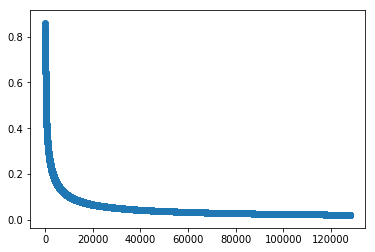

In [11]:
plt.scatter(iterations,loss)

In [12]:
print("theta0_final:{}\n\n\n theta_final:{}".format(theta0_final,theta_final))

theta0_final:[[  9.1482306    4.53326099 -11.76469829]]


 theta_final:[[-1.51539790e-02  5.56411075e+00 -5.32395478e+00]
 [ 1.24969443e+01 -2.69864619e-01 -1.27622089e+01]
 [-1.59848644e+01 -9.79293146e-01  1.58464948e+01]
 [-1.76976319e+01 -6.47839429e+00  2.25269506e+01]]


### performing testing for multiclass logistic regression

In [13]:
#p =Q0_new +np.dot(pure_testing_data,Q1_new)
p = theta0_final + np.dot(testing_data,theta_final)
p.shape

(38, 3)

In [14]:
power_test = np.exp(p)#this is the softmax function actually
pf_initial = np.sum(power_test,axis=1)
pf_initial = pf_initial.reshape(pf_initial.shape[0],1) #only for reshaping
softmax_testing = power_test/pf_initial
h= np.mean(softmax_testing,axis=1)
softmax_testing.shape

(38, 3)

In [15]:
greater=0
for i in range(softmax_testing.shape[0]):
  if ( np.argmax(softmax_testing[i]) == np.argmax(one_hot_ctest[i]) ):
    greater+=1       
greater

25

In [16]:
softmax_testing.shape[0]

38

In [17]:
accuracy = (greater/softmax_testing.shape[0])*100
accuracy

65.78947368421053